In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
from data_processing import extract_cloud_types, extract_5_by_5_neighborhood, preprocess, combine_training_files
training_data = "training_data/cloud_collocations.nc"
y = extract_cloud_types(training_data)
x = preprocess(extract_5_by_5_neighborhood(training_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(10820, 21, 22)


In [34]:
np.isnan(x).sum()

0

In [17]:
y.shape, x.shape

((10820, 9), (10820, 36, 5, 5))

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

In [35]:
from networks import SimpleClassifier, DeepClassifier

def build_simple(i):
    return lambda: SimpleClassifier(x[:, i, :, :], y, 32).model

def build_deep(i):
    return lambda: DeepClassifier(x[:, i, :, :], y, 32).model

results_deep = []
for i in range(0, 35):
    estimator = KerasClassifier(build_fn=build_deep(i), validation_split = 0.1, epochs = 50, batch_size = 32, verbose=1)
    kfold = KFold(n_splits=10, shuffle=True)
    results_deep += [cross_val_score(estimator, x[:, 0, :, :].reshape(-1, 25), y, cv=kfold)]
    
results_simple = []
for i in range(0, 35):
    estimator = KerasClassifier(build_fn=build_simple(i), validation_split = 0.1, epochs = 50, batch_size = 32, verbose=1)
    kfold = KFold(n_splits=10, shuffle=True)
    results_simple += [cross_val_score(estimator, x[:, 0, :, :].reshape(-1, 25), y, cv=kfold)]

Train on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9414 - acc: 0.3821 - val_loss: 1.7271 - val_acc: 0.4600
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7632 - acc: 0.4184 - val_loss: 1.6238 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7091 - acc: 0.4184 - val_loss: 1.5967 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6861 - acc: 0.4184 - val_loss: 1.5870 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6720 - acc: 0.4180 - val_loss: 1.5856 - val_acc: 0.4600
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6613 - acc: 0.4184 - val_loss: 1.5786 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6522 - acc: 0.4183 - val_loss: 1.5720 - val_acc: 0.4610
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6432 - ac

8764/8764 [==============================] - 0s - loss: 1.5896 - acc: 0.4124 - val_loss: 1.4997 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5867 - acc: 0.4123 - val_loss: 1.4950 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5838 - acc: 0.4120 - val_loss: 1.4881 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5813 - acc: 0.4133 - val_loss: 1.4876 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5795 - acc: 0.4134 - val_loss: 1.4879 - val_acc: 0.4610
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5774 - acc: 0.4120 - val_loss: 1.4840 - val_acc: 0.4610
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4134 - val_loss: 1.4815 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4121 - val_loss: 1.4887 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4166 - val_loss: 1.4791 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4173 - val_loss: 1.4746 - val_acc: 0.4692
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4170 - val_loss: 1.4730 - val_acc: 0.4682
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4175 - val_loss: 1.4751 - val_acc: 0.4671
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5545 - acc: 0.4176 - val_loss: 1.4735 - val_acc: 0.4671
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4181 - val_loss: 1.4711 - val_acc: 0.4682
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5516 - acc: 0.4190 - val_loss: 1.4703 - val_acc: 0.4671
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4190 - val_loss: 1.4688 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5271 - acc: 0.4255 - val_loss: 1.4712 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5259 - acc: 0.4259 - val_loss: 1.4725 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5252 - acc: 0.4262 - val_loss: 1.4765 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5239 - acc: 0.4259 - val_loss: 1.4762 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5231 - acc: 0.4269 - val_loss: 1.4680 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5226 - acc: 0.4263 - val_loss: 1.4672 - val_acc: 0.4579
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5216 - acc: 0.4256 - val_loss: 1.4704 - val_acc: 0.4610
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6454 - acc: 0.4159 - val_loss: 1.5678 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6338 - acc: 0.4161 - val_loss: 1.5609 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6244 - acc: 0.4159 - val_loss: 1.5582 - val_acc: 0.4620
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6162 - acc: 0.4160 - val_loss: 1.5509 - val_acc: 0.4620
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6088 - acc: 0.4162 - val_loss: 1.5463 - val_acc: 0.4610
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6018 - acc: 0.4162 - val_loss: 1.5390 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5959 - acc: 0.4162 - val_loss: 1.5358 - val_acc: 0.4610
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5908 - acc: 0.4165 - val_loss: 1.5262 - val_acc: 0.4610
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4165 - val_loss: 1.4941 - val_acc: 0.4682
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4165 - val_loss: 1.4894 - val_acc: 0.4682
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4170 - val_loss: 1.4876 - val_acc: 0.4671
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4175 - val_loss: 1.4878 - val_acc: 0.4671
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5597 - acc: 0.4177 - val_loss: 1.4828 - val_acc: 0.4671
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4183 - val_loss: 1.4859 - val_acc: 0.4671
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4182 - val_loss: 1.4809 - val_acc: 0.4671
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5540 - acc: 0.4184 - val_loss: 1.4851 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5557 - acc: 0.4208 - val_loss: 1.4783 - val_acc: 0.4569
Epoch 35/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5601 - acc: 0.415 - 0s - loss: 1.5545 - acc: 0.4207 - val_loss: 1.4806 - val_acc: 0.4559
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5532 - acc: 0.4202 - val_loss: 1.4773 - val_acc: 0.4559
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5522 - acc: 0.4217 - val_loss: 1.4814 - val_acc: 0.4559
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5519 - acc: 0.4231 - val_loss: 1.4807 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5502 - acc: 0.4217 - val_loss: 1.4754 - val_acc: 0.4569
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4229 - val_loss: 1.4771 - val_acc: 0.4569
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4224 - v

8764/8764 [==============================] - 0s - loss: 1.5300 - acc: 0.4221 - val_loss: 1.4647 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5291 - acc: 0.4210 - val_loss: 1.4697 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5281 - acc: 0.4225 - val_loss: 1.4626 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3653 - acc: 0.1271 - val_loss: 2.0138 - val_acc: 0.1448
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8781 - acc: 0.3465 - val_loss: 1.7223 - val_acc: 0.4097
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7256 - acc: 0.4103 - val_loss: 1.6162 - val_acc: 0.4528
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6825 - acc: 0.4180 - val_loss: 1.5890 - val_acc: 0.4528
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6276 - acc: 0.4153 - val_loss: 1.5395 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4149 - val_loss: 1.5274 - val_acc: 0.4620
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6129 - acc: 0.4151 - val_loss: 1.5247 - val_acc: 0.4620
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6079 - acc: 0.4150 - val_loss: 1.5198 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6032 - acc: 0.4152 - val_loss: 1.5134 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5987 - acc: 0.414 - 0s - loss: 1.5985 - acc: 0.4154 - val_loss: 1.5191 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5946 - acc: 0.4154 - val_loss: 1.5125 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5910 - acc: 0.4157 - v

8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4153 - val_loss: 1.5004 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5713 - acc: 0.4153 - val_loss: 1.4934 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4156 - val_loss: 1.4896 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5678 - acc: 0.4154 - val_loss: 1.4911 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4162 - val_loss: 1.4909 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4172 - val_loss: 1.4902 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5626 - acc: 0.4176 - val_loss: 1.4858 - val_acc: 0.4600
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5611 - acc: 0.4173 - val_loss: 1.4884 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5518 - acc: 0.4193 - val_loss: 1.4805 - val_acc: 0.4661
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5507 - acc: 0.4192 - val_loss: 1.4887 - val_acc: 0.4661
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5497 - acc: 0.4193 - val_loss: 1.4877 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4215 - val_loss: 1.4826 - val_acc: 0.4671
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5474 - acc: 0.4209 - val_loss: 1.4842 - val_acc: 0.4671
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5463 - acc: 0.4222 - val_loss: 1.4764 - val_acc: 0.4682
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5455 - acc: 0.4196 - val_loss: 1.4801 - val_acc: 0.4630
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5443 - acc: 0.4214 - val_loss: 1.4673 - val_acc: 0.4661
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9411 - acc: 0.3954 - val_loss: 1.7496 - val_acc: 0.4641
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7998 - acc: 0.4168 - val_loss: 1.6545 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7328 - acc: 0.4170 - val_loss: 1.6066 - val_acc: 0.4641
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6922 - acc: 0.4170 - val_loss: 1.5797 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6685 - acc: 0.4172 - val_loss: 1.5570 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6536 - acc: 0.4166 - val_loss: 1.5521 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6416 - acc: 0.4167 - val_loss: 1.5451 - val_acc: 0.4641
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5850 - acc: 0.4135 - val_loss: 1.5203 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5818 - acc: 0.4134 - val_loss: 1.5154 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5783 - acc: 0.4132 - val_loss: 1.5091 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4137 - val_loss: 1.5094 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4136 - val_loss: 1.5057 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5702 - acc: 0.4137 - val_loss: 1.4981 - val_acc: 0.4630
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5677 - acc: 0.4132 - val_loss: 1.4969 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4136 - val_loss: 1.4969 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4232 - val_loss: 1.4796 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5594 - acc: 0.4239 - val_loss: 1.4751 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5573 - acc: 0.4238 - val_loss: 1.4722 - val_acc: 0.4671
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4239 - val_loss: 1.4796 - val_acc: 0.4620
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5552 - acc: 0.4245 - val_loss: 1.4725 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4246 - val_loss: 1.4684 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5526 - acc: 0.4250 - val_loss: 1.4754 - val_acc: 0.4600
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5514 - acc: 0.4239 - val_loss: 1.4719 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5337 - acc: 0.4248 - val_loss: 1.4630 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5325 - acc: 0.4236 - val_loss: 1.4628 - val_acc: 0.4569
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5312 - acc: 0.4250 - val_loss: 1.4625 - val_acc: 0.4538
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5303 - acc: 0.4239 - val_loss: 1.4586 - val_acc: 0.4548
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5289 - acc: 0.4246 - val_loss: 1.4655 - val_acc: 0.4579
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5279 - acc: 0.4259 - val_loss: 1.4614 - val_acc: 0.4528
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5265 - acc: 0.4248 - val_loss: 1.4637 - val_acc: 0.4569
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5262 - acc: 0.4259 - val_loss: 1.4620 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.6830 - acc: 0.4168 - val_loss: 1.5985 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6725 - acc: 0.4168 - val_loss: 1.5885 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6645 - acc: 0.4174 - val_loss: 1.5820 - val_acc: 0.4610
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6568 - acc: 0.4170 - val_loss: 1.5762 - val_acc: 0.4610
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6495 - acc: 0.4175 - val_loss: 1.5717 - val_acc: 0.4589
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4178 - val_loss: 1.5664 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6365 - acc: 0.4177 - val_loss: 1.5633 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6306 - acc: 0.4181 - val_loss: 1.5526 - val_acc: 0.4579
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4160 - val_loss: 1.5018 - val_acc: 0.4641
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5692 - acc: 0.4159 - val_loss: 1.5067 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4165 - val_loss: 1.5013 - val_acc: 0.4651
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4167 - val_loss: 1.5002 - val_acc: 0.4671
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5634 - acc: 0.4172 - val_loss: 1.4948 - val_acc: 0.4671
Epoch 23/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5608 - acc: 0.418 - 0s - loss: 1.5614 - acc: 0.4174 - val_loss: 1.4973 - val_acc: 0.4671
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4184 - val_loss: 1.4940 - val_acc: 0.4671
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5584 - acc: 0.4184 - v

8764/8764 [==============================] - 0s - loss: 1.5495 - acc: 0.4134 - val_loss: 1.4697 - val_acc: 0.4692
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5484 - acc: 0.4131 - val_loss: 1.4711 - val_acc: 0.4692
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5465 - acc: 0.4143 - val_loss: 1.4717 - val_acc: 0.4702
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5452 - acc: 0.4149 - val_loss: 1.4653 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5437 - acc: 0.4158 - val_loss: 1.4671 - val_acc: 0.4702
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5427 - acc: 0.4153 - val_loss: 1.4626 - val_acc: 0.4723
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4159 - val_loss: 1.4657 - val_acc: 0.4713
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5401 - acc: 0.4161 - val_loss: 1.4626 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5272 - acc: 0.4220 - val_loss: 1.4493 - val_acc: 0.4702
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5262 - acc: 0.4229 - val_loss: 1.4489 - val_acc: 0.4733
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5259 - acc: 0.4215 - val_loss: 1.4519 - val_acc: 0.4723
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5250 - acc: 0.4217 - val_loss: 1.4523 - val_acc: 0.4713
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0021 - acc: 0.3131 - val_loss: 1.8240 - val_acc: 0.4579
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7915 - acc: 0.4169 - val_loss: 1.6769 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7195 - acc: 0.4178 - val_loss: 1.6345 - val_acc: 0.4600
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6379 - acc: 0.4141 - val_loss: 1.5634 - val_acc: 0.4610
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6307 - acc: 0.4142 - val_loss: 1.5565 - val_acc: 0.4600
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6230 - acc: 0.4142 - val_loss: 1.5545 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6165 - acc: 0.4142 - val_loss: 1.5463 - val_acc: 0.4589
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6095 - acc: 0.4142 - val_loss: 1.5443 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6040 - acc: 0.4142 - val_loss: 1.5357 - val_acc: 0.4589
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5983 - acc: 0.4141 - val_loss: 1.5348 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5934 - acc: 0.4142 - val_loss: 1.5251 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5684 - acc: 0.4184 - val_loss: 1.5074 - val_acc: 0.4559
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4185 - val_loss: 1.5075 - val_acc: 0.4559
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4185 - val_loss: 1.5060 - val_acc: 0.4559
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4189 - val_loss: 1.5050 - val_acc: 0.4559
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5630 - acc: 0.4191 - val_loss: 1.5038 - val_acc: 0.4559
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4184 - val_loss: 1.5011 - val_acc: 0.4559
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4197 - val_loss: 1.5046 - val_acc: 0.4569
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4194 - val_loss: 1.4999 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5445 - acc: 0.4193 - val_loss: 1.4741 - val_acc: 0.4559
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5432 - acc: 0.4182 - val_loss: 1.4758 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5423 - acc: 0.4189 - val_loss: 1.4718 - val_acc: 0.4579
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5414 - acc: 0.4194 - val_loss: 1.4712 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5405 - acc: 0.4204 - val_loss: 1.4685 - val_acc: 0.4569
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5396 - acc: 0.4209 - val_loss: 1.4691 - val_acc: 0.4569
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5384 - acc: 0.4202 - val_loss: 1.4719 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4210 - val_loss: 1.4710 - val_acc: 0.4589
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0672 - acc: 0.3461 - val_loss: 1.8400 - val_acc: 0.4641
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8316 - acc: 0.4134 - val_loss: 1.6963 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7388 - acc: 0.4134 - val_loss: 1.6286 - val_acc: 0.4651
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7018 - acc: 0.4136 - val_loss: 1.6063 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6820 - acc: 0.4137 - val_loss: 1.5842 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6668 - acc: 0.4139 - val_loss: 1.5745 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6540 - acc: 0.4141 - val_loss: 1.5604 - val_acc: 0.4641
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5932 - acc: 0.4166 - val_loss: 1.5195 - val_acc: 0.4579
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5880 - acc: 0.4166 - val_loss: 1.5115 - val_acc: 0.4579
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5837 - acc: 0.4166 - val_loss: 1.5109 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5804 - acc: 0.4167 - val_loss: 1.5047 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5777 - acc: 0.4166 - val_loss: 1.4961 - val_acc: 0.4579
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5753 - acc: 0.4167 - val_loss: 1.5033 - val_acc: 0.4579
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5738 - acc: 0.4167 - val_loss: 1.5023 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5718 - acc: 0.4170 - val_loss: 1.4944 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5682 - acc: 0.4170 - val_loss: 1.4877 - val_acc: 0.4671
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4160 - val_loss: 1.4834 - val_acc: 0.4661
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4137 - val_loss: 1.4832 - val_acc: 0.4661
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5627 - acc: 0.4169 - val_loss: 1.4798 - val_acc: 0.4661
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5614 - acc: 0.4181 - val_loss: 1.4817 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5597 - acc: 0.4176 - val_loss: 1.4799 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4156 - val_loss: 1.4832 - val_acc: 0.4671
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5570 - acc: 0.4161 - val_loss: 1.4815 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5405 - acc: 0.4202 - val_loss: 1.4856 - val_acc: 0.4538
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4218 - val_loss: 1.4825 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5388 - acc: 0.4202 - val_loss: 1.4901 - val_acc: 0.4517
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5377 - acc: 0.4225 - val_loss: 1.4857 - val_acc: 0.4507
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5366 - acc: 0.4230 - val_loss: 1.4861 - val_acc: 0.4507
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5359 - acc: 0.4238 - val_loss: 1.4821 - val_acc: 0.4517
Epoch 47/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5266 - acc: 0.427 - 0s - loss: 1.5353 - acc: 0.4229 - val_loss: 1.4825 - val_acc: 0.4507
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5340 - acc: 0.4242 - v

8764/8764 [==============================] - 0s - loss: 1.9867 - acc: 0.3375 - val_loss: 1.7904 - val_acc: 0.4569
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7742 - acc: 0.4174 - val_loss: 1.6365 - val_acc: 0.4589
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6990 - acc: 0.4194 - val_loss: 1.5951 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6731 - acc: 0.4201 - val_loss: 1.5754 - val_acc: 0.4579
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6575 - acc: 0.4201 - val_loss: 1.5618 - val_acc: 0.4589
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6448 - acc: 0.4198 - val_loss: 1.5555 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6340 - acc: 0.4194 - val_loss: 1.5514 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6242 - acc: 0.4193 - val_loss: 1.5467 - val_acc: 0.4589
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.5814 - acc: 0.4137 - val_loss: 1.5047 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5784 - acc: 0.4136 - val_loss: 1.5105 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4135 - val_loss: 1.4987 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4135 - val_loss: 1.4981 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5698 - acc: 0.4140 - val_loss: 1.4900 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4137 - val_loss: 1.4955 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5660 - acc: 0.4135 - val_loss: 1.4871 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4137 - val_loss: 1.4899 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5519 - acc: 0.4190 - val_loss: 1.5003 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5495 - acc: 0.4196 - val_loss: 1.4957 - val_acc: 0.4600
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4192 - val_loss: 1.4898 - val_acc: 0.4610
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5466 - acc: 0.4199 - val_loss: 1.4956 - val_acc: 0.4610
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5454 - acc: 0.4199 - val_loss: 1.4917 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4200 - val_loss: 1.4913 - val_acc: 0.4600
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5423 - acc: 0.4202 - val_loss: 1.4937 - val_acc: 0.4600
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5411 - acc: 0.4212 - val_loss: 1.4901 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5420 - acc: 0.4212 - val_loss: 1.4700 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5409 - acc: 0.4215 - val_loss: 1.4674 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5402 - acc: 0.4215 - val_loss: 1.4617 - val_acc: 0.4641
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5392 - acc: 0.4216 - val_loss: 1.4683 - val_acc: 0.4661
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4210 - val_loss: 1.4675 - val_acc: 0.4671
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5378 - acc: 0.4212 - val_loss: 1.4604 - val_acc: 0.4661
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5371 - acc: 0.4208 - val_loss: 1.4661 - val_acc: 0.4651
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6878 - acc: 0.4156 - val_loss: 1.5882 - val_acc: 0.4682
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6687 - acc: 0.4160 - val_loss: 1.5788 - val_acc: 0.4682
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6547 - acc: 0.4159 - val_loss: 1.5692 - val_acc: 0.4682
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6442 - acc: 0.4158 - val_loss: 1.5596 - val_acc: 0.4692
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6350 - acc: 0.4159 - val_loss: 1.5547 - val_acc: 0.4692
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6268 - acc: 0.4161 - val_loss: 1.5414 - val_acc: 0.4692
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6197 - acc: 0.4157 - val_loss: 1.5390 - val_acc: 0.4702
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6125 - acc: 0.4160 - val_loss: 1.5281 - val_acc: 0.4692
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.5717 - acc: 0.4169 - val_loss: 1.4968 - val_acc: 0.4579
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4170 - val_loss: 1.4996 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4170 - val_loss: 1.4970 - val_acc: 0.4579
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4172 - val_loss: 1.4962 - val_acc: 0.4579
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5632 - acc: 0.4174 - val_loss: 1.4927 - val_acc: 0.4579
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5613 - acc: 0.4174 - val_loss: 1.4917 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4180 - val_loss: 1.4902 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4177 - val_loss: 1.4898 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4248 - val_loss: 1.4716 - val_acc: 0.4671
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5408 - acc: 0.4243 - val_loss: 1.4705 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5391 - acc: 0.4246 - val_loss: 1.4705 - val_acc: 0.4651
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5380 - acc: 0.4255 - val_loss: 1.4710 - val_acc: 0.4661
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5367 - acc: 0.4248 - val_loss: 1.4708 - val_acc: 0.4661
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5356 - acc: 0.4249 - val_loss: 1.4637 - val_acc: 0.4651
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5341 - acc: 0.4245 - val_loss: 1.4641 - val_acc: 0.4661
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5329 - acc: 0.4258 - val_loss: 1.4630 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4241 - val_loss: 1.4839 - val_acc: 0.4507
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5468 - acc: 0.4243 - val_loss: 1.4845 - val_acc: 0.4517
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5461 - acc: 0.4239 - val_loss: 1.4859 - val_acc: 0.4497
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5452 - acc: 0.4238 - val_loss: 1.4915 - val_acc: 0.4487
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3254 - acc: 0.2273 - val_loss: 1.8998 - val_acc: 0.4774
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8631 - acc: 0.4160 - val_loss: 1.6919 - val_acc: 0.4733
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7476 - acc: 0.4164 - val_loss: 1.6206 - val_acc: 0.4692
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6260 - acc: 0.4186 - val_loss: 1.5459 - val_acc: 0.4671
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6197 - acc: 0.4181 - val_loss: 1.5441 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6137 - acc: 0.4182 - val_loss: 1.5362 - val_acc: 0.4671
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6086 - acc: 0.4183 - val_loss: 1.5334 - val_acc: 0.4661
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6038 - acc: 0.4185 - val_loss: 1.5278 - val_acc: 0.4671
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5989 - acc: 0.4177 - val_loss: 1.5176 - val_acc: 0.4661
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5945 - acc: 0.4178 - val_loss: 1.5228 - val_acc: 0.4671
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5902 - acc: 0.4175 - val_loss: 1.5188 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5622 - acc: 0.4180 - val_loss: 1.4967 - val_acc: 0.4559
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5600 - acc: 0.4178 - val_loss: 1.4928 - val_acc: 0.4569
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4167 - val_loss: 1.4903 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5549 - acc: 0.4192 - val_loss: 1.4865 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5532 - acc: 0.4201 - val_loss: 1.4879 - val_acc: 0.4600
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5514 - acc: 0.4201 - val_loss: 1.4848 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4213 - val_loss: 1.4830 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5477 - acc: 0.4215 - val_loss: 1.4799 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5497 - acc: 0.4158 - val_loss: 1.4841 - val_acc: 0.4548
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4169 - val_loss: 1.4780 - val_acc: 0.4600
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5475 - acc: 0.4175 - val_loss: 1.4794 - val_acc: 0.4548
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5464 - acc: 0.4178 - val_loss: 1.4794 - val_acc: 0.4559
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5459 - acc: 0.4178 - val_loss: 1.4735 - val_acc: 0.4569
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4185 - val_loss: 1.4711 - val_acc: 0.4579
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4194 - val_loss: 1.4749 - val_acc: 0.4569
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4191 - val_loss: 1.4749 - val_acc: 0.4579
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9973 - acc: 0.3416 - val_loss: 1.7697 - val_acc: 0.4600
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7986 - acc: 0.4157 - val_loss: 1.6338 - val_acc: 0.4610
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7264 - acc: 0.4158 - val_loss: 1.6028 - val_acc: 0.4620
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6969 - acc: 0.4156 - val_loss: 1.5917 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6787 - acc: 0.4156 - val_loss: 1.5790 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6644 - acc: 0.4157 - val_loss: 1.5654 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6519 - acc: 0.4156 - val_loss: 1.5583 - val_acc: 0.4630
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5943 - acc: 0.4166 - val_loss: 1.5011 - val_acc: 0.4620
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5887 - acc: 0.4166 - val_loss: 1.4932 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5840 - acc: 0.4164 - val_loss: 1.4917 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4167 - val_loss: 1.4908 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4166 - val_loss: 1.4879 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5725 - acc: 0.4164 - val_loss: 1.4815 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5691 - acc: 0.4168 - val_loss: 1.4789 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4166 - val_loss: 1.4738 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4145 - val_loss: 1.4948 - val_acc: 0.4620
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5654 - acc: 0.4147 - val_loss: 1.4878 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5638 - acc: 0.4145 - val_loss: 1.4892 - val_acc: 0.4620
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4153 - val_loss: 1.4901 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4154 - val_loss: 1.4904 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4159 - val_loss: 1.4903 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5582 - acc: 0.4137 - val_loss: 1.4824 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5570 - acc: 0.4165 - val_loss: 1.4830 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5520 - acc: 0.4174 - val_loss: 1.5004 - val_acc: 0.4466
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5509 - acc: 0.4177 - val_loss: 1.4924 - val_acc: 0.4466
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5499 - acc: 0.4165 - val_loss: 1.4930 - val_acc: 0.4435
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4191 - val_loss: 1.4930 - val_acc: 0.4446
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4184 - val_loss: 1.4898 - val_acc: 0.4466
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5460 - acc: 0.4176 - val_loss: 1.4911 - val_acc: 0.4466
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4182 - val_loss: 1.4903 - val_acc: 0.4466
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4194 - val_loss: 1.4913 - val_acc: 0.4456
Epoc

8764/8764 [==============================] - 0s - loss: 1.9599 - acc: 0.4112 - val_loss: 1.7574 - val_acc: 0.4661
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7993 - acc: 0.4142 - val_loss: 1.6339 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7272 - acc: 0.4145 - val_loss: 1.5928 - val_acc: 0.4651
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6942 - acc: 0.4152 - val_loss: 1.5779 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6725 - acc: 0.4154 - val_loss: 1.5699 - val_acc: 0.4661
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6585 - acc: 0.4156 - val_loss: 1.5567 - val_acc: 0.4661
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6478 - acc: 0.4158 - val_loss: 1.5507 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6363 - acc: 0.4157 - val_loss: 1.5353 - val_acc: 0.4651
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.5977 - acc: 0.4143 - val_loss: 1.5197 - val_acc: 0.4754
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5926 - acc: 0.4142 - val_loss: 1.5068 - val_acc: 0.4754
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5878 - acc: 0.4148 - val_loss: 1.5068 - val_acc: 0.4754
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5835 - acc: 0.4150 - val_loss: 1.5063 - val_acc: 0.4764
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5800 - acc: 0.4149 - val_loss: 1.4955 - val_acc: 0.4764
Epoch 20/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5733 - acc: 0.421 - 0s - loss: 1.5767 - acc: 0.4148 - val_loss: 1.4980 - val_acc: 0.4743
Epoch 21/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5737 - acc: 0.412 - 0s - loss: 1.5741 - acc: 0.4152 - val_loss: 1.4904 - val_acc: 0.4764
Epoch 22/50
8764/8764 [==============================]

8764/8764 [==============================] - 0s - loss: 1.5655 - acc: 0.4153 - val_loss: 1.4990 - val_acc: 0.4651
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4143 - val_loss: 1.5052 - val_acc: 0.4651
Epoch 27/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5761 - acc: 0.413 - 0s - loss: 1.5618 - acc: 0.4181 - val_loss: 1.4982 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5598 - acc: 0.4167 - val_loss: 1.4937 - val_acc: 0.4641
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5581 - acc: 0.4175 - val_loss: 1.4912 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4184 - val_loss: 1.4966 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5544 - acc: 0.4189 - val_loss: 1.4921 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4175 - v

8764/8764 [==============================] - 0s - loss: 1.5246 - acc: 0.4273 - val_loss: 1.4570 - val_acc: 0.4579
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5231 - acc: 0.4274 - val_loss: 1.4582 - val_acc: 0.4579
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5222 - acc: 0.4272 - val_loss: 1.4583 - val_acc: 0.4528
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5206 - acc: 0.4282 - val_loss: 1.4525 - val_acc: 0.4548
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5201 - acc: 0.4291 - val_loss: 1.4486 - val_acc: 0.4569
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5192 - acc: 0.4290 - val_loss: 1.4566 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5188 - acc: 0.4293 - val_loss: 1.4560 - val_acc: 0.4517
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5173 - acc: 0.4299 - val_loss: 1.4530 - val_acc: 0.4528
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9651 - acc: 0.3404 - val_loss: 1.7745 - val_acc: 0.4569
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7726 - acc: 0.4151 - val_loss: 1.6448 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7053 - acc: 0.4151 - val_loss: 1.5986 - val_acc: 0.4569
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6785 - acc: 0.4152 - val_loss: 1.5827 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6641 - acc: 0.4148 - val_loss: 1.5781 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6532 - acc: 0.4144 - val_loss: 1.5685 - val_acc: 0.4579
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6444 - acc: 0.4142 - val_loss: 1.5572 - val_acc: 0.4579
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6155 - acc: 0.4145 - val_loss: 1.5335 - val_acc: 0.4682
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4145 - val_loss: 1.5287 - val_acc: 0.4682
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6052 - acc: 0.4143 - val_loss: 1.5247 - val_acc: 0.4682
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4144 - val_loss: 1.5259 - val_acc: 0.4682
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5976 - acc: 0.4144 - val_loss: 1.5138 - val_acc: 0.4682
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4145 - val_loss: 1.5213 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5920 - acc: 0.4142 - val_loss: 1.5166 - val_acc: 0.4682
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5896 - acc: 0.4143 - val_loss: 1.5140 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4225 - val_loss: 1.4943 - val_acc: 0.4641
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4225 - val_loss: 1.5038 - val_acc: 0.4630
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5440 - acc: 0.4220 - val_loss: 1.4912 - val_acc: 0.4630
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5427 - acc: 0.4225 - val_loss: 1.4856 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4229 - val_loss: 1.4930 - val_acc: 0.4630
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5403 - acc: 0.4222 - val_loss: 1.4899 - val_acc: 0.4630
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4238 - val_loss: 1.4882 - val_acc: 0.4630
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5379 - acc: 0.4242 - val_loss: 1.4929 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5460 - acc: 0.4266 - val_loss: 1.4804 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5452 - acc: 0.4264 - val_loss: 1.4776 - val_acc: 0.4661
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5443 - acc: 0.4270 - val_loss: 1.4759 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5433 - acc: 0.4277 - val_loss: 1.4714 - val_acc: 0.4651
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5430 - acc: 0.4267 - val_loss: 1.4785 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5417 - acc: 0.4277 - val_loss: 1.4736 - val_acc: 0.4630
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4282 - val_loss: 1.4739 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5407 - acc: 0.4282 - val_loss: 1.4768 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.6845 - acc: 0.4167 - val_loss: 1.5863 - val_acc: 0.4682
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6670 - acc: 0.4167 - val_loss: 1.5732 - val_acc: 0.4682
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6528 - acc: 0.4167 - val_loss: 1.5630 - val_acc: 0.4671
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6418 - acc: 0.4166 - val_loss: 1.5546 - val_acc: 0.4682
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6313 - acc: 0.4165 - val_loss: 1.5506 - val_acc: 0.4682
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6227 - acc: 0.4164 - val_loss: 1.5371 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6139 - acc: 0.4165 - val_loss: 1.5356 - val_acc: 0.4682
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6070 - acc: 0.4165 - val_loss: 1.5252 - val_acc: 0.4682
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5907 - acc: 0.4144 - val_loss: 1.5189 - val_acc: 0.4569
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5870 - acc: 0.4118 - val_loss: 1.5148 - val_acc: 0.4569
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5847 - acc: 0.4137 - val_loss: 1.5131 - val_acc: 0.4569
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5825 - acc: 0.4144 - val_loss: 1.5072 - val_acc: 0.4589
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5798 - acc: 0.4144 - val_loss: 1.5044 - val_acc: 0.4579
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5777 - acc: 0.4144 - val_loss: 1.5113 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5828 - acc: 0.413 - 0s - loss: 1.5753 - acc: 0.4147 - val_loss: 1.4988 - val_acc: 0.4589
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4150 - v

8764/8764 [==============================] - 0s - loss: 1.5412 - acc: 0.4206 - val_loss: 1.4880 - val_acc: 0.4569
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4229 - val_loss: 1.4892 - val_acc: 0.4548
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5387 - acc: 0.4224 - val_loss: 1.4897 - val_acc: 0.4517
Epoch 35/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5431 - acc: 0.421 - 0s - loss: 1.5376 - acc: 0.4224 - val_loss: 1.4846 - val_acc: 0.4517
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5363 - acc: 0.4210 - val_loss: 1.4852 - val_acc: 0.4517
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5356 - acc: 0.4241 - val_loss: 1.4853 - val_acc: 0.4517
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5350 - acc: 0.4240 - val_loss: 1.4861 - val_acc: 0.4528
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5338 - acc: 0.4239 - v

8764/8764 [==============================] - 0s - loss: 1.5350 - acc: 0.4226 - val_loss: 1.4635 - val_acc: 0.4702
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5343 - acc: 0.4236 - val_loss: 1.4721 - val_acc: 0.4713
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5334 - acc: 0.4236 - val_loss: 1.4687 - val_acc: 0.4692
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5321 - acc: 0.4237 - val_loss: 1.4709 - val_acc: 0.4692
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1663 - acc: 0.2001 - val_loss: 1.8660 - val_acc: 0.4343
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8131 - acc: 0.4181 - val_loss: 1.6868 - val_acc: 0.4569
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7194 - acc: 0.4188 - val_loss: 1.6218 - val_acc: 0.4579
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6291 - acc: 0.4174 - val_loss: 1.5428 - val_acc: 0.4702
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6183 - acc: 0.4173 - val_loss: 1.5331 - val_acc: 0.4702
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6085 - acc: 0.4172 - val_loss: 1.5247 - val_acc: 0.4702
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6007 - acc: 0.4170 - val_loss: 1.5298 - val_acc: 0.4702
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5939 - acc: 0.4170 - val_loss: 1.5136 - val_acc: 0.4702
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5880 - acc: 0.4172 - val_loss: 1.5109 - val_acc: 0.4702
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5828 - acc: 0.4169 - val_loss: 1.5091 - val_acc: 0.4713
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5781 - acc: 0.4172 - val_loss: 1.5038 - val_acc: 0.4713
Epoch

8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4128 - val_loss: 1.4900 - val_acc: 0.4548
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5751 - acc: 0.4127 - val_loss: 1.4878 - val_acc: 0.4548
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4127 - val_loss: 1.4880 - val_acc: 0.4548
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4135 - val_loss: 1.4840 - val_acc: 0.4548
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5681 - acc: 0.4137 - val_loss: 1.4846 - val_acc: 0.4559
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5659 - acc: 0.4140 - val_loss: 1.4771 - val_acc: 0.4569
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4144 - val_loss: 1.4808 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4140 - val_loss: 1.4754 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5360 - acc: 0.4251 - val_loss: 1.4708 - val_acc: 0.4559
Epoch 37/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5316 - acc: 0.426 - 0s - loss: 1.5349 - acc: 0.4261 - val_loss: 1.4734 - val_acc: 0.4538
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5339 - acc: 0.4247 - val_loss: 1.4747 - val_acc: 0.4538
Epoch 39/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5305 - acc: 0.428 - 0s - loss: 1.5328 - acc: 0.4259 - val_loss: 1.4696 - val_acc: 0.4548
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5319 - acc: 0.4261 - val_loss: 1.4760 - val_acc: 0.4497
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5311 - acc: 0.4257 - val_loss: 1.4714 - val_acc: 0.4528
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5303 - acc: 0.4269 - val_loss: 1.4695 - val_acc: 0.4507
Epoch 43/50
8764/8764 [==============================]

8764/8764 [==============================] - 0s - loss: 1.5284 - acc: 0.4242 - val_loss: 1.4668 - val_acc: 0.4702
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0309 - acc: 0.3269 - val_loss: 1.7863 - val_acc: 0.4538
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7879 - acc: 0.4132 - val_loss: 1.6619 - val_acc: 0.4528
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7220 - acc: 0.4127 - val_loss: 1.6265 - val_acc: 0.4538
Epoch 4/50
8764/8764 [==============================] - ETA: 0s - loss: 1.7087 - acc: 0.403 - 0s - loss: 1.6905 - acc: 0.4131 - val_loss: 1.6054 - val_acc: 0.4528
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6722 - acc: 0.4127 - val_loss: 1.5954 - val_acc: 0.4548
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6593 - acc: 0.4128 - val_loss: 1.5873 - val

8764/8764 [==============================] - 0s - loss: 1.5998 - acc: 0.4142 - val_loss: 1.5064 - val_acc: 0.4692
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5945 - acc: 0.4142 - val_loss: 1.5015 - val_acc: 0.4702
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5904 - acc: 0.4142 - val_loss: 1.5007 - val_acc: 0.4682
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5866 - acc: 0.4141 - val_loss: 1.4907 - val_acc: 0.4692
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4145 - val_loss: 1.4958 - val_acc: 0.4702
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4147 - val_loss: 1.4929 - val_acc: 0.4713
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5785 - acc: 0.4151 - val_loss: 1.4934 - val_acc: 0.4713
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4150 - val_loss: 1.4857 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4185 - val_loss: 1.4845 - val_acc: 0.4723
Epoch 26/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5387 - acc: 0.421 - 0s - loss: 1.5573 - acc: 0.4188 - val_loss: 1.4857 - val_acc: 0.4733
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5556 - acc: 0.4190 - val_loss: 1.4787 - val_acc: 0.4733
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5540 - acc: 0.4198 - val_loss: 1.4814 - val_acc: 0.4723
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5527 - acc: 0.4198 - val_loss: 1.4814 - val_acc: 0.4723
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5514 - acc: 0.4204 - val_loss: 1.4778 - val_acc: 0.4723
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5504 - acc: 0.4206 - val_loss: 1.4845 - val_acc: 0.4733
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5494 - acc: 0.4204 - v

8764/8764 [==============================] - 0s - loss: 1.5389 - acc: 0.4176 - val_loss: 1.4771 - val_acc: 0.4579
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5375 - acc: 0.4165 - val_loss: 1.4702 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5369 - acc: 0.4175 - val_loss: 1.4742 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5357 - acc: 0.4180 - val_loss: 1.4721 - val_acc: 0.4610
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5349 - acc: 0.4161 - val_loss: 1.4715 - val_acc: 0.4600
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5339 - acc: 0.4180 - val_loss: 1.4712 - val_acc: 0.4589
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5327 - acc: 0.4193 - val_loss: 1.4756 - val_acc: 0.4569
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5315 - acc: 0.4202 - val_loss: 1.4701 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 2.2242 - acc: 0.1446 - val_loss: 1.9127 - val_acc: 0.3234
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8437 - acc: 0.4059 - val_loss: 1.6999 - val_acc: 0.4548
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7401 - acc: 0.4183 - val_loss: 1.6382 - val_acc: 0.4548
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7028 - acc: 0.4180 - val_loss: 1.6116 - val_acc: 0.4548
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6790 - acc: 0.4181 - val_loss: 1.5991 - val_acc: 0.4548
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6625 - acc: 0.4178 - val_loss: 1.5889 - val_acc: 0.4548
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6497 - acc: 0.4177 - val_loss: 1.5779 - val_acc: 0.4548
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6390 - acc: 0.4178 - val_loss: 1.5716 - val_acc: 0.4548
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.5974 - acc: 0.4161 - val_loss: 1.5077 - val_acc: 0.4630
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5926 - acc: 0.4160 - val_loss: 1.5039 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5879 - acc: 0.4158 - val_loss: 1.5035 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4160 - val_loss: 1.4943 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5800 - acc: 0.4156 - val_loss: 1.4936 - val_acc: 0.4630
Epoch 20/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5947 - acc: 0.408 - 0s - loss: 1.5770 - acc: 0.4154 - val_loss: 1.4886 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4154 - val_loss: 1.4837 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5714 - acc: 0.4157 - v

8764/8764 [==============================] - 0s - loss: 1.5557 - acc: 0.4188 - val_loss: 1.4848 - val_acc: 0.4620
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5534 - acc: 0.4189 - val_loss: 1.4806 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5518 - acc: 0.4193 - val_loss: 1.4802 - val_acc: 0.4641
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5498 - acc: 0.4189 - val_loss: 1.4813 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5483 - acc: 0.4204 - val_loss: 1.4759 - val_acc: 0.4641
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5464 - acc: 0.4204 - val_loss: 1.4724 - val_acc: 0.4641
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4210 - val_loss: 1.4744 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4222 - val_loss: 1.4706 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4214 - val_loss: 1.4826 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5428 - acc: 0.4233 - val_loss: 1.4765 - val_acc: 0.4528
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5422 - acc: 0.4232 - val_loss: 1.4792 - val_acc: 0.4559
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5417 - acc: 0.4222 - val_loss: 1.4796 - val_acc: 0.4569
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5404 - acc: 0.4234 - val_loss: 1.4754 - val_acc: 0.4559
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5403 - acc: 0.4237 - val_loss: 1.4767 - val_acc: 0.4569
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5393 - acc: 0.4246 - val_loss: 1.4779 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5386 - acc: 0.4236 - val_loss: 1.4748 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.6828 - acc: 0.4189 - val_loss: 1.5723 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6677 - acc: 0.4186 - val_loss: 1.5618 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6563 - acc: 0.4183 - val_loss: 1.5528 - val_acc: 0.4671
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6478 - acc: 0.4178 - val_loss: 1.5465 - val_acc: 0.4671
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6408 - acc: 0.4181 - val_loss: 1.5383 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6340 - acc: 0.4180 - val_loss: 1.5379 - val_acc: 0.4661
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6279 - acc: 0.4183 - val_loss: 1.5294 - val_acc: 0.4651
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6219 - acc: 0.4183 - val_loss: 1.5225 - val_acc: 0.4651
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5839 - acc: 0.4167 - val_loss: 1.5005 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4165 - val_loss: 1.4945 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4166 - val_loss: 1.4902 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5746 - acc: 0.4170 - val_loss: 1.4904 - val_acc: 0.4630
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5714 - acc: 0.4172 - val_loss: 1.4843 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4181 - val_loss: 1.4797 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4180 - val_loss: 1.4797 - val_acc: 0.4620
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4184 - val_loss: 1.4801 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4197 - val_loss: 1.4935 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5579 - acc: 0.4192 - val_loss: 1.4871 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5562 - acc: 0.4198 - val_loss: 1.4909 - val_acc: 0.4641
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4210 - val_loss: 1.4866 - val_acc: 0.4641
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5536 - acc: 0.4209 - val_loss: 1.4849 - val_acc: 0.4641
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5526 - acc: 0.4218 - val_loss: 1.4858 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5510 - acc: 0.4210 - val_loss: 1.4798 - val_acc: 0.4620
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5499 - acc: 0.4223 - val_loss: 1.4868 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4210 - val_loss: 1.4679 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5409 - acc: 0.4200 - val_loss: 1.4669 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5400 - acc: 0.4190 - val_loss: 1.4646 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9970 - acc: 0.3100 - val_loss: 1.8145 - val_acc: 0.4682
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8121 - acc: 0.4173 - val_loss: 1.6771 - val_acc: 0.4661
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7341 - acc: 0.4178 - val_loss: 1.6212 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6962 - acc: 0.4180 - val_loss: 1.5943 - val_acc: 0.4671
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6277 - acc: 0.4144 - val_loss: 1.5559 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6201 - acc: 0.4144 - val_loss: 1.5490 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6118 - acc: 0.418 - 0s - loss: 1.6127 - acc: 0.4148 - val_loss: 1.5463 - val_acc: 0.4589
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6060 - acc: 0.4145 - val_loss: 1.5393 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5993 - acc: 0.4147 - val_loss: 1.5267 - val_acc: 0.4589
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5939 - acc: 0.4147 - val_loss: 1.5270 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5885 - acc: 0.4145 - val_loss: 1.5315 - val_acc: 0.4589
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4142 - v

8764/8764 [==============================] - 0s - loss: 1.5614 - acc: 0.4173 - val_loss: 1.5004 - val_acc: 0.4559
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4183 - val_loss: 1.4951 - val_acc: 0.4559
Epoch 25/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5698 - acc: 0.409 - 0s - loss: 1.5571 - acc: 0.4178 - val_loss: 1.4943 - val_acc: 0.4559
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5551 - acc: 0.4186 - val_loss: 1.4930 - val_acc: 0.4559
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5534 - acc: 0.4177 - val_loss: 1.4878 - val_acc: 0.4569
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5516 - acc: 0.4193 - val_loss: 1.4877 - val_acc: 0.4569
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5498 - acc: 0.4188 - val_loss: 1.4923 - val_acc: 0.4559
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5483 - acc: 0.4199 - v

8764/8764 [==============================] - 0s - loss: 1.5489 - acc: 0.4204 - val_loss: 1.4929 - val_acc: 0.4620
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4183 - val_loss: 1.4926 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5465 - acc: 0.4213 - val_loss: 1.4911 - val_acc: 0.4610
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4231 - val_loss: 1.4923 - val_acc: 0.4600
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5432 - acc: 0.4208 - val_loss: 1.4871 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4230 - val_loss: 1.4905 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5410 - acc: 0.4224 - val_loss: 1.4948 - val_acc: 0.4456
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5401 - acc: 0.4230 - val_loss: 1.4865 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5298 - acc: 0.4256 - val_loss: 1.4777 - val_acc: 0.4641
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0355 - acc: 0.2774 - val_loss: 1.8023 - val_acc: 0.2690
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7781 - acc: 0.3872 - val_loss: 1.6549 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7158 - acc: 0.4159 - val_loss: 1.5938 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6900 - acc: 0.4159 - val_loss: 1.5744 - val_acc: 0.4671
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6732 - acc: 0.4158 - val_loss: 1.5592 - val_acc: 0.4671
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6596 - acc: 0.4157 - val_loss: 1.5516 - val_acc: 0.4671
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6115 - acc: 0.4159 - val_loss: 1.5270 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6042 - acc: 0.4157 - val_loss: 1.5181 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5970 - acc: 0.4156 - val_loss: 1.5134 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4157 - val_loss: 1.5050 - val_acc: 0.4600
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5845 - acc: 0.4159 - val_loss: 1.5000 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4162 - val_loss: 1.4962 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5763 - acc: 0.4162 - val_loss: 1.4962 - val_acc: 0.4589
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4166 - val_loss: 1.4942 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5566 - acc: 0.4220 - val_loss: 1.4798 - val_acc: 0.4743
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5546 - acc: 0.4229 - val_loss: 1.4768 - val_acc: 0.4733
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5521 - acc: 0.4230 - val_loss: 1.4745 - val_acc: 0.4723
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5500 - acc: 0.4239 - val_loss: 1.4821 - val_acc: 0.4702
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5488 - acc: 0.4241 - val_loss: 1.4748 - val_acc: 0.4723
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4241 - val_loss: 1.4749 - val_acc: 0.4733
Epoch 32/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5486 - acc: 0.417 - 0s - loss: 1.5452 - acc: 0.4248 - val_loss: 1.4693 - val_acc: 0.4743
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4245 - v

8764/8764 [==============================] - ETA: 0s - loss: 1.5345 - acc: 0.421 - 0s - loss: 1.5423 - acc: 0.4189 - val_loss: 1.4913 - val_acc: 0.4641
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5409 - acc: 0.4182 - val_loss: 1.4928 - val_acc: 0.4671
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5396 - acc: 0.4186 - val_loss: 1.4869 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5387 - acc: 0.4190 - val_loss: 1.4972 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5378 - acc: 0.4192 - val_loss: 1.4874 - val_acc: 0.4661
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5372 - acc: 0.4196 - val_loss: 1.4894 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5361 - acc: 0.4191 - val_loss: 1.4931 - val_acc: 0.4671
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5351 - acc: 0.4196 - v

8764/8764 [==============================] - 0s - loss: 1.8693 - acc: 0.4143 - val_loss: 1.7234 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7541 - acc: 0.4159 - val_loss: 1.6216 - val_acc: 0.4641
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7003 - acc: 0.4159 - val_loss: 1.5857 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6754 - acc: 0.4154 - val_loss: 1.5660 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6582 - acc: 0.4150 - val_loss: 1.5496 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6449 - acc: 0.4150 - val_loss: 1.5444 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6353 - acc: 0.4147 - val_loss: 1.5358 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6274 - acc: 0.4145 - val_loss: 1.5275 - val_acc: 0.4641
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5875 - acc: 0.4170 - val_loss: 1.5127 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5833 - acc: 0.4174 - val_loss: 1.5114 - val_acc: 0.4651
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5800 - acc: 0.4180 - val_loss: 1.5076 - val_acc: 0.4651
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4181 - val_loss: 1.5097 - val_acc: 0.4651
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4181 - val_loss: 1.5039 - val_acc: 0.4651
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4185 - val_loss: 1.4999 - val_acc: 0.4651
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4188 - val_loss: 1.4944 - val_acc: 0.4641
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4196 - val_loss: 1.4914 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5610 - acc: 0.4162 - val_loss: 1.4804 - val_acc: 0.4713
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4164 - val_loss: 1.4843 - val_acc: 0.4713
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4164 - val_loss: 1.4770 - val_acc: 0.4713
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4162 - val_loss: 1.4827 - val_acc: 0.4682
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5570 - acc: 0.4167 - val_loss: 1.4831 - val_acc: 0.4692
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4169 - val_loss: 1.4801 - val_acc: 0.4692
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5552 - acc: 0.4169 - val_loss: 1.4795 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4167 - val_loss: 1.4750 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5344 - acc: 0.4230 - val_loss: 1.4595 - val_acc: 0.4651
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5331 - acc: 0.4225 - val_loss: 1.4617 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5323 - acc: 0.4220 - val_loss: 1.4553 - val_acc: 0.4651
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5318 - acc: 0.4223 - val_loss: 1.4590 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5307 - acc: 0.4229 - val_loss: 1.4544 - val_acc: 0.4651
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5298 - acc: 0.4226 - val_loss: 1.4567 - val_acc: 0.4661
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5292 - acc: 0.4224 - val_loss: 1.4532 - val_acc: 0.4671
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6550 - acc: 0.4154 - val_loss: 1.5511 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6435 - acc: 0.4154 - val_loss: 1.5460 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6341 - acc: 0.4153 - val_loss: 1.5459 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6262 - acc: 0.4160 - val_loss: 1.5377 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6149 - acc: 0.413 - 0s - loss: 1.6189 - acc: 0.4157 - val_loss: 1.5306 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6120 - acc: 0.4161 - val_loss: 1.5296 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6060 - acc: 0.4161 - val_loss: 1.5209 - val_acc: 0.4641
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6000 - acc: 0.4167 - val_

8764/8764 [==============================] - ETA: 0s - loss: 1.5929 - acc: 0.415 - 0s - loss: 1.5954 - acc: 0.4145 - val_loss: 1.4929 - val_acc: 0.4723
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5914 - acc: 0.4145 - val_loss: 1.4929 - val_acc: 0.4723
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5875 - acc: 0.4147 - val_loss: 1.4876 - val_acc: 0.4723
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4148 - val_loss: 1.4877 - val_acc: 0.4723
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4147 - val_loss: 1.4810 - val_acc: 0.4723
Epoch 23/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5861 - acc: 0.414 - 0s - loss: 1.5789 - acc: 0.4148 - val_loss: 1.4819 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4151 - val_loss: 1.4789 - val_acc: 0.4713
Epoch 25/50
8764/8764 [==============================]

8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4222 - val_loss: 1.4643 - val_acc: 0.4702
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5544 - acc: 0.4217 - val_loss: 1.4647 - val_acc: 0.4702
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4222 - val_loss: 1.4674 - val_acc: 0.4692
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5519 - acc: 0.4214 - val_loss: 1.4632 - val_acc: 0.4692
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5502 - acc: 0.4220 - val_loss: 1.4617 - val_acc: 0.4702
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4230 - val_loss: 1.4599 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5628 - acc: 0.413 - 0s - loss: 1.5484 - acc: 0.4226 - val_loss: 1.4581 - val_acc: 0.4713
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5471 - acc: 0.4223 - v

8764/8764 [==============================] - 0s - loss: 1.5318 - acc: 0.4247 - val_loss: 1.4677 - val_acc: 0.4692
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5310 - acc: 0.4246 - val_loss: 1.4658 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5306 - acc: 0.4253 - val_loss: 1.4673 - val_acc: 0.4713
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5299 - acc: 0.4247 - val_loss: 1.4617 - val_acc: 0.4671
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5294 - acc: 0.4250 - val_loss: 1.4723 - val_acc: 0.4743
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5287 - acc: 0.4270 - val_loss: 1.4718 - val_acc: 0.4713
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5277 - acc: 0.4262 - val_loss: 1.4636 - val_acc: 0.4723
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6727 - acc: 0.4168 - val_loss: 1.5565 - val_acc: 0.4661
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6599 - acc: 0.4165 - val_loss: 1.5535 - val_acc: 0.4661
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6495 - acc: 0.4162 - val_loss: 1.5443 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6399 - acc: 0.4164 - val_loss: 1.5378 - val_acc: 0.4661
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6312 - acc: 0.4157 - val_loss: 1.5352 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4157 - val_loss: 1.5243 - val_acc: 0.4661
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6164 - acc: 0.4153 - val_loss: 1.5206 - val_acc: 0.4661
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6101 - acc: 0.4152 - val_loss: 1.5268 - val_acc: 0.4661
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5829 - acc: 0.4168 - val_loss: 1.5339 - val_acc: 0.4528
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4164 - val_loss: 1.5368 - val_acc: 0.4538
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5778 - acc: 0.4166 - val_loss: 1.5293 - val_acc: 0.4548
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4173 - val_loss: 1.5231 - val_acc: 0.4517
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4178 - val_loss: 1.5258 - val_acc: 0.4538
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4175 - val_loss: 1.5245 - val_acc: 0.4517
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4181 - val_loss: 1.5242 - val_acc: 0.4528
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4181 - val_loss: 1.5230 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.5419 - acc: 0.4225 - val_loss: 1.4788 - val_acc: 0.4641
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5409 - acc: 0.4221 - val_loss: 1.4787 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4217 - val_loss: 1.4798 - val_acc: 0.4630
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5395 - acc: 0.4213 - val_loss: 1.4780 - val_acc: 0.4641
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5380 - acc: 0.4216 - val_loss: 1.4761 - val_acc: 0.4661
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5373 - acc: 0.4212 - val_loss: 1.4784 - val_acc: 0.4630
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5366 - acc: 0.4216 - val_loss: 1.4718 - val_acc: 0.4641
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5353 - acc: 0.4228 - val_loss: 1.4705 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5328 - acc: 0.4256 - val_loss: 1.4933 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5312 - acc: 0.4248 - val_loss: 1.4977 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5305 - acc: 0.4246 - val_loss: 1.4944 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1221 - acc: 0.2628 - val_loss: 1.7400 - val_acc: 0.4641
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7657 - acc: 0.4147 - val_loss: 1.6157 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7112 - acc: 0.4148 - val_loss: 1.5931 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6878 - acc: 0.4149 - val_loss: 1.5767 - val_acc: 0.4630
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6312 - acc: 0.4152 - val_loss: 1.5374 - val_acc: 0.4610
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6233 - acc: 0.4154 - val_loss: 1.5331 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6165 - acc: 0.4158 - val_loss: 1.5282 - val_acc: 0.4610
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4156 - val_loss: 1.5243 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6043 - acc: 0.4157 - val_loss: 1.5128 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5995 - acc: 0.4160 - val_loss: 1.5109 - val_acc: 0.4630
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5945 - acc: 0.4158 - val_loss: 1.5097 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5907 - acc: 0.4160 - val_loss: 1.5040 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4172 - val_loss: 1.4874 - val_acc: 0.4713
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4172 - val_loss: 1.4779 - val_acc: 0.4713
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4174 - val_loss: 1.4730 - val_acc: 0.4702
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5572 - acc: 0.4175 - val_loss: 1.4743 - val_acc: 0.4702
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5555 - acc: 0.4185 - val_loss: 1.4691 - val_acc: 0.4692
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5537 - acc: 0.4183 - val_loss: 1.4690 - val_acc: 0.4692
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5523 - acc: 0.4186 - val_loss: 1.4621 - val_acc: 0.4692
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5509 - acc: 0.4196 - val_loss: 1.4680 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4197 - val_loss: 1.4774 - val_acc: 0.4692
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4205 - val_loss: 1.4793 - val_acc: 0.4692
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5363 - acc: 0.4206 - val_loss: 1.4737 - val_acc: 0.4682
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5349 - acc: 0.4209 - val_loss: 1.4732 - val_acc: 0.4682
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5340 - acc: 0.4217 - val_loss: 1.4733 - val_acc: 0.4702
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5331 - acc: 0.4209 - val_loss: 1.4711 - val_acc: 0.4671
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5326 - acc: 0.4212 - val_loss: 1.4732 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5312 - acc: 0.4218 - val_loss: 1.4740 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.9563 - acc: 0.3201 - val_loss: 1.7199 - val_acc: 0.4528
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7327 - acc: 0.4153 - val_loss: 1.6193 - val_acc: 0.4559
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6877 - acc: 0.4147 - val_loss: 1.5935 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6704 - acc: 0.4144 - val_loss: 1.5808 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6585 - acc: 0.4141 - val_loss: 1.5747 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6486 - acc: 0.4139 - val_loss: 1.5640 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6408 - acc: 0.4142 - val_loss: 1.5657 - val_acc: 0.4569
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6337 - acc: 0.4142 - val_loss: 1.5552 - val_acc: 0.4569
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.5885 - acc: 0.4157 - val_loss: 1.5213 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5842 - acc: 0.4156 - val_loss: 1.5129 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4159 - val_loss: 1.5051 - val_acc: 0.4579
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5768 - acc: 0.4161 - val_loss: 1.5061 - val_acc: 0.4579
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4162 - val_loss: 1.5068 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4162 - val_loss: 1.5084 - val_acc: 0.4589
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4161 - val_loss: 1.5011 - val_acc: 0.4589
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4160 - val_loss: 1.4980 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5487 - acc: 0.4196 - val_loss: 1.4787 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4199 - val_loss: 1.4715 - val_acc: 0.4661
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5463 - acc: 0.4208 - val_loss: 1.4788 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4217 - val_loss: 1.4771 - val_acc: 0.4641
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5430 - acc: 0.4212 - val_loss: 1.4731 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5411 - acc: 0.4208 - val_loss: 1.4806 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5404 - acc: 0.4222 - val_loss: 1.4678 - val_acc: 0.4651
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5393 - acc: 0.4218 - val_loss: 1.4740 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5454 - acc: 0.4190 - val_loss: 1.4717 - val_acc: 0.4589
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4188 - val_loss: 1.4698 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4194 - val_loss: 1.4717 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5422 - acc: 0.4198 - val_loss: 1.4734 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5413 - acc: 0.4191 - val_loss: 1.4732 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5401 - acc: 0.4204 - val_loss: 1.4656 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5391 - acc: 0.4209 - val_loss: 1.4677 - val_acc: 0.4610
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6621 - acc: 0.4151 - val_loss: 1.5670 - val_acc: 0.4713
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6477 - acc: 0.4153 - val_loss: 1.5629 - val_acc: 0.4713
Epoch 8/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6308 - acc: 0.419 - 0s - loss: 1.6362 - acc: 0.4152 - val_loss: 1.5549 - val_acc: 0.4713
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6263 - acc: 0.4152 - val_loss: 1.5546 - val_acc: 0.4713
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6170 - acc: 0.4152 - val_loss: 1.5374 - val_acc: 0.4713
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6089 - acc: 0.4153 - val_loss: 1.5278 - val_acc: 0.4723
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6012 - acc: 0.4152 - val_loss: 1.5206 - val_acc: 0.4723
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5943 - acc: 0.4153 - val_

8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4140 - val_loss: 1.4938 - val_acc: 0.4795
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4142 - val_loss: 1.4912 - val_acc: 0.4815
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4144 - val_loss: 1.4888 - val_acc: 0.4805
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4152 - val_loss: 1.4827 - val_acc: 0.4815
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4157 - val_loss: 1.4843 - val_acc: 0.4805
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4169 - val_loss: 1.4840 - val_acc: 0.4805
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4166 - val_loss: 1.4786 - val_acc: 0.4825
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5543 - acc: 0.4165 - val_loss: 1.4698 - val_acc: 0.4795
Epoc

8764/8764 [==============================] - 0s - loss: 1.5640 - acc: 0.4164 - val_loss: 1.4614 - val_acc: 0.4723
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5623 - acc: 0.4160 - val_loss: 1.4597 - val_acc: 0.4723
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4168 - val_loss: 1.4637 - val_acc: 0.4723
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4169 - val_loss: 1.4592 - val_acc: 0.4713
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5600 - acc: 0.4170 - val_loss: 1.4603 - val_acc: 0.4713
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4173 - val_loss: 1.4722 - val_acc: 0.4702
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5584 - acc: 0.4173 - val_loss: 1.4688 - val_acc: 0.4713
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4175 - val_loss: 1.4619 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5269 - acc: 0.4262 - val_loss: 1.4564 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5088 - acc: 0.432 - 0s - loss: 1.5262 - acc: 0.4266 - val_loss: 1.4582 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5250 - acc: 0.4278 - val_loss: 1.4540 - val_acc: 0.4610
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0688 - acc: 0.2851 - val_loss: 1.8117 - val_acc: 0.4548
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7799 - acc: 0.4159 - val_loss: 1.6438 - val_acc: 0.4548
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7013 - acc: 0.4161 - val_loss: 1.5951 - val_acc: 0.45480.413
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6763 - acc: 0.4160 - val_loss: 1.588

8764/8764 [==============================] - 0s - loss: 1.6238 - acc: 0.4169 - val_loss: 1.5562 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6170 - acc: 0.4169 - val_loss: 1.5528 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4167 - val_loss: 1.5490 - val_acc: 0.4589
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6042 - acc: 0.4170 - val_loss: 1.5377 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5985 - acc: 0.4169 - val_loss: 1.5426 - val_acc: 0.4589
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5933 - acc: 0.4170 - val_loss: 1.5350 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5882 - acc: 0.4170 - val_loss: 1.5345 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5836 - acc: 0.4173 - val_loss: 1.5269 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5565 - acc: 0.4193 - val_loss: 1.4879 - val_acc: 0.4528
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4193 - val_loss: 1.4829 - val_acc: 0.4528
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4197 - val_loss: 1.4831 - val_acc: 0.4517
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5513 - acc: 0.4206 - val_loss: 1.4793 - val_acc: 0.4517
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5500 - acc: 0.4196 - val_loss: 1.4825 - val_acc: 0.4507
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5483 - acc: 0.4202 - val_loss: 1.4785 - val_acc: 0.4507
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5468 - acc: 0.4201 - val_loss: 1.4797 - val_acc: 0.4507
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4210 - val_loss: 1.4787 - val_acc: 0.4476
Epoc

8764/8764 [==============================] - 0s - loss: 1.5414 - acc: 0.4216 - val_loss: 1.4719 - val_acc: 0.4630
Epoch 38/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5492 - acc: 0.418 - 0s - loss: 1.5397 - acc: 0.4215 - val_loss: 1.4685 - val_acc: 0.4630
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4224 - val_loss: 1.4707 - val_acc: 0.4620
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5379 - acc: 0.4216 - val_loss: 1.4691 - val_acc: 0.4651
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5364 - acc: 0.4226 - val_loss: 1.4676 - val_acc: 0.4630
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5357 - acc: 0.4228 - val_loss: 1.4640 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5342 - acc: 0.4232 - val_loss: 1.4650 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5329 - acc: 0.4238 - v

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0992 - acc: 0.1932 - val_loss: 1.8279 - val_acc: 0.4456
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7734 - acc: 0.4162 - val_loss: 1.6567 - val_acc: 0.4682
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7009 - acc: 0.4173 - val_loss: 1.6101 - val_acc: 0.4692
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6786 - acc: 0.4176 - val_loss: 1.5875 - val_acc: 0.4682
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6659 - acc: 0.4178 - val_loss: 1.5795 - val_acc: 0.4692
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6558 - acc: 0.4182 - val_loss: 1.5677 - val_acc: 0.4692
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6473 - acc: 0.4184 - val_loss: 1.5605 - val_acc: 0.4692
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4150 - val_loss: 1.5130 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5862 - acc: 0.4150 - val_loss: 1.5157 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4153 - val_loss: 1.5092 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5790 - acc: 0.4156 - val_loss: 1.5060 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5763 - acc: 0.4157 - val_loss: 1.5061 - val_acc: 0.4641
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5740 - acc: 0.4158 - val_loss: 1.5029 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4159 - val_loss: 1.4951 - val_acc: 0.4651
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4166 - val_loss: 1.4932 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4185 - val_loss: 1.4677 - val_acc: 0.4825
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5462 - acc: 0.4197 - val_loss: 1.4669 - val_acc: 0.4825
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4199 - val_loss: 1.4668 - val_acc: 0.4815
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5429 - acc: 0.4198 - val_loss: 1.4658 - val_acc: 0.4805
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5416 - acc: 0.4196 - val_loss: 1.4644 - val_acc: 0.4815
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5404 - acc: 0.4204 - val_loss: 1.4646 - val_acc: 0.4805
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5389 - acc: 0.4207 - val_loss: 1.4643 - val_acc: 0.4805
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5378 - acc: 0.4208 - val_loss: 1.4620 - val_acc: 0.4784
Epoc

8764/8764 [==============================] - 0s - loss: 1.5534 - acc: 0.4189 - val_loss: 1.4847 - val_acc: 0.4641
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5521 - acc: 0.4198 - val_loss: 1.4798 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5512 - acc: 0.4198 - val_loss: 1.4810 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5503 - acc: 0.4200 - val_loss: 1.4829 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4204 - val_loss: 1.4793 - val_acc: 0.4641
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4213 - val_loss: 1.4841 - val_acc: 0.4600
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5474 - acc: 0.4216 - val_loss: 1.4768 - val_acc: 0.4651
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5461 - acc: 0.4206 - val_loss: 1.4794 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.7101 - acc: 0.4178 - val_loss: 1.5966 - val_acc: 0.4528
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6768 - acc: 0.4183 - val_loss: 1.5829 - val_acc: 0.4538
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6594 - acc: 0.4182 - val_loss: 1.5733 - val_acc: 0.4538
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6468 - acc: 0.4182 - val_loss: 1.5728 - val_acc: 0.4538
Epoch 7/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6430 - acc: 0.420 - 0s - loss: 1.6367 - acc: 0.4181 - val_loss: 1.5631 - val_acc: 0.4538
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6271 - acc: 0.4182 - val_loss: 1.5557 - val_acc: 0.4548
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6185 - acc: 0.4176 - val_loss: 1.5494 - val_acc: 0.4548
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4184 - val_los

8764/8764 [==============================] - 0s - loss: 1.5879 - acc: 0.4188 - val_loss: 1.5167 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5830 - acc: 0.4184 - val_loss: 1.5131 - val_acc: 0.4610
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5790 - acc: 0.4183 - val_loss: 1.5046 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4182 - val_loss: 1.5079 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5721 - acc: 0.4183 - val_loss: 1.5035 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5691 - acc: 0.4182 - val_loss: 1.4971 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4182 - val_loss: 1.4974 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4174 - val_loss: 1.4988 - val_acc: 0.4476
Epoc

8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4202 - val_loss: 1.5046 - val_acc: 0.4559
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4204 - val_loss: 1.5052 - val_acc: 0.4569
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4205 - val_loss: 1.4984 - val_acc: 0.4569
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4207 - val_loss: 1.5030 - val_acc: 0.4528
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5564 - acc: 0.4216 - val_loss: 1.5032 - val_acc: 0.4538
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5552 - acc: 0.4201 - val_loss: 1.5017 - val_acc: 0.4517
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5544 - acc: 0.4204 - val_loss: 1.4997 - val_acc: 0.4517
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5529 - acc: 0.4204 - val_loss: 1.4974 - val_acc: 0.4538
Epoc

8764/8764 [==============================] - 0s - loss: 1.5329 - acc: 0.4236 - val_loss: 1.4717 - val_acc: 0.4559
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5319 - acc: 0.4210 - val_loss: 1.4707 - val_acc: 0.4538
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5306 - acc: 0.4245 - val_loss: 1.4687 - val_acc: 0.4559
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5299 - acc: 0.4233 - val_loss: 1.4698 - val_acc: 0.4476
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5290 - acc: 0.4220 - val_loss: 1.4703 - val_acc: 0.4497
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5279 - acc: 0.4231 - val_loss: 1.4703 - val_acc: 0.4517
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5272 - acc: 0.4253 - val_loss: 1.4673 - val_acc: 0.4528
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5264 - acc: 0.4242 - val_loss: 1.4685 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.6718 - acc: 0.4156 - val_loss: 1.5769 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6611 - acc: 0.4152 - val_loss: 1.5705 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6513 - acc: 0.4154 - val_loss: 1.5600 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6416 - acc: 0.4150 - val_loss: 1.5565 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6322 - acc: 0.4150 - val_loss: 1.5533 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6246 - acc: 0.4151 - val_loss: 1.5456 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6178 - acc: 0.4150 - val_loss: 1.5396 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6103 - acc: 0.4152 - val_loss: 1.5327 - val_acc: 0.4630
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4129 - val_loss: 1.5005 - val_acc: 0.4569
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5718 - acc: 0.4132 - val_loss: 1.5032 - val_acc: 0.4559
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4134 - val_loss: 1.5020 - val_acc: 0.4559
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4135 - val_loss: 1.5036 - val_acc: 0.4559
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5627 - acc: 0.4137 - val_loss: 1.4946 - val_acc: 0.4569
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5605 - acc: 0.4135 - val_loss: 1.4932 - val_acc: 0.4569
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4141 - val_loss: 1.4927 - val_acc: 0.4579
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4142 - val_loss: 1.4887 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5573 - acc: 0.4193 - val_loss: 1.4763 - val_acc: 0.4620
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4174 - val_loss: 1.4779 - val_acc: 0.4630
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5548 - acc: 0.4197 - val_loss: 1.4766 - val_acc: 0.4630
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5536 - acc: 0.4198 - val_loss: 1.4780 - val_acc: 0.4610
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5523 - acc: 0.4196 - val_loss: 1.4765 - val_acc: 0.4630
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4198 - val_loss: 1.4740 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5505 - acc: 0.4194 - val_loss: 1.4725 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5494 - acc: 0.4194 - val_loss: 1.4719 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5331 - acc: 0.4223 - val_loss: 1.4667 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5324 - acc: 0.4231 - val_loss: 1.4626 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5315 - acc: 0.4234 - val_loss: 1.4720 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5308 - acc: 0.4217 - val_loss: 1.4645 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5295 - acc: 0.4231 - val_loss: 1.4622 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0778 - acc: 0.2705 - val_loss: 1.8656 - val_acc: 0.4620
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8327 - acc: 0.4150 - val_loss: 1.6820 - val_acc: 0.4610
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6445 - acc: 0.4176 - val_loss: 1.5647 - val_acc: 0.4620
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6373 - acc: 0.4176 - val_loss: 1.5530 - val_acc: 0.4620
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6302 - acc: 0.4176 - val_loss: 1.5487 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6224 - acc: 0.4169 - val_loss: 1.5439 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6158 - acc: 0.4169 - val_loss: 1.5422 - val_acc: 0.4630
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6097 - acc: 0.4166 - val_loss: 1.5360 - val_acc: 0.4630
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6044 - acc: 0.4164 - val_loss: 1.5371 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5999 - acc: 0.4162 - val_loss: 1.5279 - val_acc: 0.4630
Epoch

8764/8764 [==============================] - 0s - loss: 1.5735 - acc: 0.4168 - val_loss: 1.5012 - val_acc: 0.4569
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4173 - val_loss: 1.5034 - val_acc: 0.4569
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4178 - val_loss: 1.4956 - val_acc: 0.4569
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4180 - val_loss: 1.4968 - val_acc: 0.4569
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4173 - val_loss: 1.4909 - val_acc: 0.4569
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4178 - val_loss: 1.4919 - val_acc: 0.4569
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4173 - val_loss: 1.4939 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5564 - acc: 0.4180 - val_loss: 1.4876 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4190 - val_loss: 1.4886 - val_acc: 0.4641
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5439 - acc: 0.4190 - val_loss: 1.4877 - val_acc: 0.4641
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5423 - acc: 0.4199 - val_loss: 1.4810 - val_acc: 0.4630
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5410 - acc: 0.4221 - val_loss: 1.4825 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5398 - acc: 0.4214 - val_loss: 1.4813 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5385 - acc: 0.4212 - val_loss: 1.4791 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5278 - acc: 0.426 - 0s - loss: 1.5373 - acc: 0.4228 - val_loss: 1.4837 - val_acc: 0.4630
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5364 - acc: 0.4229 - v

8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4204 - val_loss: 1.4969 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4220 - val_loss: 1.4993 - val_acc: 0.4579
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2725 - acc: 0.1806 - val_loss: 1.8723 - val_acc: 0.4589
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8264 - acc: 0.4143 - val_loss: 1.6620 - val_acc: 0.4630
Epoch 3/50
8764/8764 [==============================] - ETA: 0s - loss: 1.7473 - acc: 0.420 - 0s - loss: 1.7325 - acc: 0.4142 - val_loss: 1.6139 - val_acc: 0.4620
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6998 - acc: 0.4144 - val_loss: 1.5940 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6809 - acc: 0.4145 - val_loss: 1.5829 - va

8764/8764 [==============================] - 0s - loss: 1.6207 - acc: 0.4168 - val_loss: 1.5279 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6116 - acc: 0.4170 - val_loss: 1.5259 - val_acc: 0.4661
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6026 - acc: 0.4173 - val_loss: 1.5124 - val_acc: 0.4661
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4173 - val_loss: 1.5144 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5884 - acc: 0.4173 - val_loss: 1.5046 - val_acc: 0.4651
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5828 - acc: 0.4176 - val_loss: 1.4916 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5781 - acc: 0.4178 - val_loss: 1.4900 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4177 - val_loss: 1.4857 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4192 - val_loss: 1.4838 - val_acc: 0.4723
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4201 - val_loss: 1.4775 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5712 - acc: 0.4206 - val_loss: 1.4780 - val_acc: 0.4713
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4205 - val_loss: 1.4810 - val_acc: 0.4723
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4199 - val_loss: 1.4790 - val_acc: 0.4723
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5663 - acc: 0.4204 - val_loss: 1.4744 - val_acc: 0.4723
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4212 - val_loss: 1.4767 - val_acc: 0.4733
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4210 - val_loss: 1.4708 - val_acc: 0.4743
Epoc

8764/8764 [==============================] - ETA: 0s - loss: 1.5482 - acc: 0.419 - 0s - loss: 1.5551 - acc: 0.4176 - val_loss: 1.4813 - val_acc: 0.4671
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5537 - acc: 0.4182 - val_loss: 1.4769 - val_acc: 0.4671
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5525 - acc: 0.4182 - val_loss: 1.4767 - val_acc: 0.4692
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5513 - acc: 0.4196 - val_loss: 1.4790 - val_acc: 0.4682
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5498 - acc: 0.4188 - val_loss: 1.4757 - val_acc: 0.4682
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5485 - acc: 0.4201 - val_loss: 1.4742 - val_acc: 0.4682
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5470 - acc: 0.4210 - val_loss: 1.4739 - val_acc: 0.4682
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5457 - acc: 0.4209 - v

8764/8764 [==============================] - 0s - loss: 1.5540 - acc: 0.4185 - val_loss: 1.4934 - val_acc: 0.4630
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5529 - acc: 0.4175 - val_loss: 1.4908 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9518 - acc: 0.3587 - val_loss: 1.7809 - val_acc: 0.4610
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7665 - acc: 0.4161 - val_loss: 1.6510 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7068 - acc: 0.4165 - val_loss: 1.6104 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6825 - acc: 0.4162 - val_loss: 1.5952 - val_acc: 0.4579
Epoch 5/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6683 - acc: 0.425 - 0s - loss: 1.6663 - acc: 0.4164 - val_loss: 1.5842 - va

8764/8764 [==============================] - 0s - loss: 1.6289 - acc: 0.4162 - val_loss: 1.5659 - val_acc: 0.4528
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6214 - acc: 0.4161 - val_loss: 1.5615 - val_acc: 0.4528
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6151 - acc: 0.4161 - val_loss: 1.5555 - val_acc: 0.4528
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6090 - acc: 0.4161 - val_loss: 1.5506 - val_acc: 0.4528
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6033 - acc: 0.4165 - val_loss: 1.5420 - val_acc: 0.4528
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5981 - acc: 0.4164 - val_loss: 1.5374 - val_acc: 0.4528
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5932 - acc: 0.4166 - val_loss: 1.5336 - val_acc: 0.4528
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4164 - val_loss: 1.5339 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4175 - val_loss: 1.4675 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5610 - acc: 0.4173 - val_loss: 1.4685 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4173 - val_loss: 1.4718 - val_acc: 0.4641
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5581 - acc: 0.4173 - val_loss: 1.4720 - val_acc: 0.4651
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4170 - val_loss: 1.4720 - val_acc: 0.4641
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5557 - acc: 0.4175 - val_loss: 1.4739 - val_acc: 0.4641
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5541 - acc: 0.4177 - val_loss: 1.4657 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5534 - acc: 0.4174 - val_loss: 1.4653 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5565 - acc: 0.4223 - val_loss: 1.4802 - val_acc: 0.4507
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4226 - val_loss: 1.4782 - val_acc: 0.4507
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5546 - acc: 0.4223 - val_loss: 1.4851 - val_acc: 0.4446
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5540 - acc: 0.4234 - val_loss: 1.4745 - val_acc: 0.4466
Epoch 39/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5630 - acc: 0.419 - 0s - loss: 1.5531 - acc: 0.4233 - val_loss: 1.4758 - val_acc: 0.4497
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5522 - acc: 0.4236 - val_loss: 1.4776 - val_acc: 0.4456
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5512 - acc: 0.4237 - val_loss: 1.4759 - val_acc: 0.4476
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5504 - acc: 0.4236 - v

8764/8764 [==============================] - 0s - loss: 1.5296 - acc: 0.4239 - val_loss: 1.4564 - val_acc: 0.4548
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5283 - acc: 0.4247 - val_loss: 1.4533 - val_acc: 0.4548
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0688 - acc: 0.2355 - val_loss: 1.8584 - val_acc: 0.4692
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8230 - acc: 0.4137 - val_loss: 1.6991 - val_acc: 0.4692
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7383 - acc: 0.4141 - val_loss: 1.6294 - val_acc: 0.4713
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6976 - acc: 0.4136 - val_loss: 1.6050 - val_acc: 0.4713
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6769 - acc: 0.4132 - val_loss: 1.5886 - val_acc: 0.4713
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6038 - acc: 0.4121 - val_loss: 1.5206 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5979 - acc: 0.4120 - val_loss: 1.5129 - val_acc: 0.4610
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5929 - acc: 0.4112 - val_loss: 1.5045 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5892 - acc: 0.4121 - val_loss: 1.5062 - val_acc: 0.4610
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5853 - acc: 0.4111 - val_loss: 1.4970 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4095 - val_loss: 1.4978 - val_acc: 0.4610
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5795 - acc: 0.4101 - val_loss: 1.4998 - val_acc: 0.4281
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4056 - val_loss: 1.4919 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5555 - acc: 0.4202 - val_loss: 1.4928 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5541 - acc: 0.4204 - val_loss: 1.4899 - val_acc: 0.4661
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4206 - val_loss: 1.4876 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5521 - acc: 0.4215 - val_loss: 1.4888 - val_acc: 0.4641
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5509 - acc: 0.4222 - val_loss: 1.4858 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5505 - acc: 0.4214 - val_loss: 1.4914 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4226 - val_loss: 1.4818 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5484 - acc: 0.4221 - val_loss: 1.4807 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5511 - acc: 0.4183 - val_loss: 1.4676 - val_acc: 0.4713
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5501 - acc: 0.4200 - val_loss: 1.4663 - val_acc: 0.4692
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5491 - acc: 0.4194 - val_loss: 1.4711 - val_acc: 0.4733
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4214 - val_loss: 1.4615 - val_acc: 0.4723
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4202 - val_loss: 1.4654 - val_acc: 0.4702
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4207 - val_loss: 1.4672 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5458 - acc: 0.4212 - val_loss: 1.4650 - val_acc: 0.4702
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4218 - val_loss: 1.4637 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.7692 - acc: 0.4164 - val_loss: 1.6428 - val_acc: 0.4497
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7070 - acc: 0.4162 - val_loss: 1.6113 - val_acc: 0.4487
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6826 - acc: 0.4162 - val_loss: 1.5923 - val_acc: 0.4497
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6658 - acc: 0.4160 - val_loss: 1.5838 - val_acc: 0.4497
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6534 - acc: 0.4157 - val_loss: 1.5763 - val_acc: 0.4497
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6429 - acc: 0.4158 - val_loss: 1.5691 - val_acc: 0.4507
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6339 - acc: 0.4157 - val_loss: 1.5610 - val_acc: 0.4507
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6254 - acc: 0.4153 - val_loss: 1.5550 - val_acc: 0.4507
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4181 - val_loss: 1.5103 - val_acc: 0.4682
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5758 - acc: 0.4183 - val_loss: 1.5010 - val_acc: 0.4671
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5721 - acc: 0.4181 - val_loss: 1.5054 - val_acc: 0.4682
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4182 - val_loss: 1.5015 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4178 - val_loss: 1.5029 - val_acc: 0.4671
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4181 - val_loss: 1.4937 - val_acc: 0.4682
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4177 - val_loss: 1.4926 - val_acc: 0.4682
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4182 - val_loss: 1.4889 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5568 - acc: 0.4152 - val_loss: 1.4883 - val_acc: 0.4579
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5553 - acc: 0.4158 - val_loss: 1.4865 - val_acc: 0.4579
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5532 - acc: 0.4154 - val_loss: 1.4876 - val_acc: 0.4589
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5518 - acc: 0.4178 - val_loss: 1.4820 - val_acc: 0.4589
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5503 - acc: 0.4176 - val_loss: 1.4858 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5488 - acc: 0.4177 - val_loss: 1.4818 - val_acc: 0.4579
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5478 - acc: 0.4183 - val_loss: 1.4840 - val_acc: 0.4569
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5464 - acc: 0.4189 - val_loss: 1.4791 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5297 - acc: 0.4240 - val_loss: 1.4654 - val_acc: 0.4641
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5284 - acc: 0.4231 - val_loss: 1.4598 - val_acc: 0.4661
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5273 - acc: 0.4229 - val_loss: 1.4562 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5269 - acc: 0.4239 - val_loss: 1.4598 - val_acc: 0.4630
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5257 - acc: 0.4242 - val_loss: 1.4623 - val_acc: 0.4630
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5247 - acc: 0.4234 - val_loss: 1.4608 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0225 - acc: 0.3015 - val_loss: 1.8165 - val_acc: 0.4600
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6601 - acc: 0.4165 - val_loss: 1.5741 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6451 - acc: 0.4157 - val_loss: 1.5614 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6336 - acc: 0.4158 - val_loss: 1.5602 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6238 - acc: 0.4160 - val_loss: 1.5543 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6149 - acc: 0.4158 - val_loss: 1.5390 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6074 - acc: 0.4159 - val_loss: 1.5360 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6002 - acc: 0.4139 - val_loss: 1.5288 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5943 - acc: 0.4134 - val_loss: 1.5235 - val_acc: 0.4651
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4144 - val_loss: 1.4805 - val_acc: 0.4733
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4143 - val_loss: 1.4847 - val_acc: 0.4733
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4143 - val_loss: 1.4720 - val_acc: 0.4733
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5638 - acc: 0.4151 - val_loss: 1.4757 - val_acc: 0.4733
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5617 - acc: 0.4154 - val_loss: 1.4777 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5598 - acc: 0.4153 - val_loss: 1.4689 - val_acc: 0.4723
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4156 - val_loss: 1.4706 - val_acc: 0.4723
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4170 - val_loss: 1.4713 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5548 - acc: 0.4186 - val_loss: 1.4681 - val_acc: 0.4733
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5535 - acc: 0.4198 - val_loss: 1.4664 - val_acc: 0.4713
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5519 - acc: 0.4200 - val_loss: 1.4565 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5509 - acc: 0.4204 - val_loss: 1.4630 - val_acc: 0.4723
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5494 - acc: 0.4214 - val_loss: 1.4598 - val_acc: 0.4702
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4221 - val_loss: 1.4613 - val_acc: 0.4713
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5466 - acc: 0.4230 - val_loss: 1.4615 - val_acc: 0.4682
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5458 - acc: 0.4226 - val_loss: 1.4591 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5417 - acc: 0.4228 - val_loss: 1.4853 - val_acc: 0.4661
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4212 - val_loss: 1.4778 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5404 - acc: 0.4213 - val_loss: 1.4790 - val_acc: 0.4559
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0231 - acc: 0.3344 - val_loss: 1.8741 - val_acc: 0.4784
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8463 - acc: 0.4137 - val_loss: 1.7468 - val_acc: 0.4733
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7667 - acc: 0.4147 - val_loss: 1.6656 - val_acc: 0.4733
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7167 - acc: 0.4147 - val_loss: 1.6185 - val_acc: 0.4733
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6128 - acc: 0.4133 - val_loss: 1.5379 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6054 - acc: 0.4133 - val_loss: 1.5306 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5987 - acc: 0.4135 - val_loss: 1.5241 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5924 - acc: 0.4135 - val_loss: 1.5154 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5874 - acc: 0.4140 - val_loss: 1.5102 - val_acc: 0.4610
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5819 - acc: 0.4140 - val_loss: 1.5060 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4144 - val_loss: 1.5025 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4144 - val_loss: 1.5031 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5747 - acc: 0.4156 - val_loss: 1.4966 - val_acc: 0.4610
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5723 - acc: 0.4159 - val_loss: 1.4976 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4127 - val_loss: 1.4941 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4161 - val_loss: 1.4929 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4153 - val_loss: 1.4920 - val_acc: 0.4620
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4167 - val_loss: 1.4939 - val_acc: 0.4620
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4168 - val_loss: 1.4907 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4170 - val_loss: 1.4896 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4228 - val_loss: 1.4724 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5455 - acc: 0.4230 - val_loss: 1.4662 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5439 - acc: 0.4238 - val_loss: 1.4728 - val_acc: 0.4630
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4242 - val_loss: 1.4676 - val_acc: 0.4641
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5411 - acc: 0.4245 - val_loss: 1.4719 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5396 - acc: 0.4248 - val_loss: 1.4705 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5382 - acc: 0.4251 - val_loss: 1.4683 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5372 - acc: 0.4255 - val_loss: 1.4670 - val_acc: 0.4589
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9734 - acc: 0.3324 - val_loss: 1.7685 - val_acc: 0.4569
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7813 - acc: 0.4175 - val_loss: 1.6380 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7139 - acc: 0.4173 - val_loss: 1.6022 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6828 - acc: 0.4174 - val_loss: 1.5875 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6637 - acc: 0.4172 - val_loss: 1.5710 - val_acc: 0.4589
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6495 - acc: 0.4170 - val_loss: 1.5566 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6388 - acc: 0.4167 - val_loss: 1.5507 - val_acc: 0.4589
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6001 - acc: 0.4154 - val_loss: 1.5223 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5949 - acc: 0.4154 - val_loss: 1.5165 - val_acc: 0.4610
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5899 - acc: 0.4152 - val_loss: 1.5116 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4152 - val_loss: 1.5080 - val_acc: 0.4610
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5808 - acc: 0.4153 - val_loss: 1.5056 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4152 - val_loss: 1.5047 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4154 - val_loss: 1.4966 - val_acc: 0.4600
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4153 - val_loss: 1.4974 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5422 - acc: 0.4190 - val_loss: 1.4683 - val_acc: 0.4682
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5408 - acc: 0.4182 - val_loss: 1.4658 - val_acc: 0.4682
Epoch 29/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5515 - acc: 0.418 - 0s - loss: 1.5391 - acc: 0.4183 - val_loss: 1.4640 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4181 - val_loss: 1.4677 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5360 - acc: 0.4200 - val_loss: 1.4632 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5348 - acc: 0.4193 - val_loss: 1.4630 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5333 - acc: 0.4206 - val_loss: 1.4647 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5321 - acc: 0.4220 - v

8764/8764 [==============================] - 0s - loss: 1.5416 - acc: 0.4241 - val_loss: 1.4712 - val_acc: 0.4600
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5406 - acc: 0.4234 - val_loss: 1.4712 - val_acc: 0.4600
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5394 - acc: 0.4246 - val_loss: 1.4726 - val_acc: 0.4579
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5384 - acc: 0.4248 - val_loss: 1.4679 - val_acc: 0.4435
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4257 - val_loss: 1.4698 - val_acc: 0.4569
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5368 - acc: 0.4255 - val_loss: 1.4731 - val_acc: 0.4456
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5356 - acc: 0.4257 - val_loss: 1.4711 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5345 - acc: 0.4266 - val_loss: 1.4701 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.6982 - acc: 0.4133 - val_loss: 1.6063 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6805 - acc: 0.4132 - val_loss: 1.5986 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6664 - acc: 0.4134 - val_loss: 1.5854 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6546 - acc: 0.4135 - val_loss: 1.5704 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6448 - acc: 0.4133 - val_loss: 1.5659 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6355 - acc: 0.4135 - val_loss: 1.5543 - val_acc: 0.4651
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6274 - acc: 0.4135 - val_loss: 1.5506 - val_acc: 0.4651
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6193 - acc: 0.4134 - val_loss: 1.5452 - val_acc: 0.4651
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4144 - val_loss: 1.5007 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4145 - val_loss: 1.4980 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4149 - val_loss: 1.4948 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4154 - val_loss: 1.4886 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5665 - acc: 0.4150 - val_loss: 1.4901 - val_acc: 0.4630
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5653 - acc: 0.4151 - val_loss: 1.4916 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5636 - acc: 0.4159 - val_loss: 1.4886 - val_acc: 0.4620
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4168 - val_loss: 1.4845 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4216 - val_loss: 1.4796 - val_acc: 0.4754
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4210 - val_loss: 1.4710 - val_acc: 0.4743
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4218 - val_loss: 1.4750 - val_acc: 0.4754
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4218 - val_loss: 1.4724 - val_acc: 0.4754
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4223 - val_loss: 1.4719 - val_acc: 0.4733
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5411 - acc: 0.4226 - val_loss: 1.4682 - val_acc: 0.4713
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5398 - acc: 0.4220 - val_loss: 1.4653 - val_acc: 0.4723
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5395 - acc: 0.4220 - val_loss: 1.4735 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5394 - acc: 0.4190 - val_loss: 1.4682 - val_acc: 0.4548
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5385 - acc: 0.4184 - val_loss: 1.4673 - val_acc: 0.4548
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5378 - acc: 0.4197 - val_loss: 1.4660 - val_acc: 0.4569
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4204 - val_loss: 1.4644 - val_acc: 0.4559
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0249 - acc: 0.3578 - val_loss: 1.8205 - val_acc: 0.4620
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7838 - acc: 0.4164 - val_loss: 1.6359 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7032 - acc: 0.4172 - val_loss: 1.5862 - val_acc: 0.4641
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - ETA: 0s - loss: 1.6409 - acc: 0.411 - 0s - loss: 1.6390 - acc: 0.4161 - val_loss: 1.5458 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6307 - acc: 0.4164 - val_loss: 1.5393 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6230 - acc: 0.4159 - val_loss: 1.5349 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6161 - acc: 0.4157 - val_loss: 1.5295 - val_acc: 0.4641
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6094 - acc: 0.4159 - val_loss: 1.5276 - val_acc: 0.4641
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6036 - acc: 0.4157 - val_loss: 1.5194 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5980 - acc: 0.4160 - val_loss: 1.5130 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5931 - acc: 0.4161 - v

8764/8764 [==============================] - 0s - loss: 1.5535 - acc: 0.4230 - val_loss: 1.4676 - val_acc: 0.4682
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4230 - val_loss: 1.4647 - val_acc: 0.4702
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5496 - acc: 0.4242 - val_loss: 1.4651 - val_acc: 0.4702
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4242 - val_loss: 1.4646 - val_acc: 0.4702
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5462 - acc: 0.4226 - val_loss: 1.4618 - val_acc: 0.4692
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4251 - val_loss: 1.4606 - val_acc: 0.4692
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5432 - acc: 0.4254 - val_loss: 1.4610 - val_acc: 0.4692
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5420 - acc: 0.4263 - val_loss: 1.4594 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4247 - val_loss: 1.4869 - val_acc: 0.4507
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5411 - acc: 0.4247 - val_loss: 1.4885 - val_acc: 0.4507
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5402 - acc: 0.4258 - val_loss: 1.4836 - val_acc: 0.4528
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5386 - acc: 0.4245 - val_loss: 1.4844 - val_acc: 0.4517
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5374 - acc: 0.4240 - val_loss: 1.4850 - val_acc: 0.4548
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5363 - acc: 0.4272 - val_loss: 1.4801 - val_acc: 0.4517
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5355 - acc: 0.4258 - val_loss: 1.4823 - val_acc: 0.4517
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5349 - acc: 0.4263 - val_loss: 1.4824 - val_acc: 0.4517
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9218 - acc: 0.3882 - val_loss: 1.7064 - val_acc: 0.4671
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7492 - acc: 0.4161 - val_loss: 1.6132 - val_acc: 0.4671
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6925 - acc: 0.4162 - val_loss: 1.5819 - val_acc: 0.4682
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6695 - acc: 0.4159 - val_loss: 1.5690 - val_acc: 0.4692
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6566 - acc: 0.4158 - val_loss: 1.5622 - val_acc: 0.4692
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6461 - acc: 0.4159 - val_loss: 1.5536 - val_acc: 0.4692
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6369 - acc: 0.4156 - val_loss: 1.5465 - val_acc: 0.4692
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4159 - val_loss: 1.4931 - val_acc: 0.4713
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4164 - val_loss: 1.4897 - val_acc: 0.4713
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4162 - val_loss: 1.4838 - val_acc: 0.4702
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5655 - acc: 0.4127 - val_loss: 1.4761 - val_acc: 0.4702
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5632 - acc: 0.4158 - val_loss: 1.4835 - val_acc: 0.4692
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4167 - val_loss: 1.4773 - val_acc: 0.4702
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5589 - acc: 0.4172 - val_loss: 1.4776 - val_acc: 0.4702
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4173 - val_loss: 1.4706 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5589 - acc: 0.4167 - val_loss: 1.4895 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4169 - val_loss: 1.4884 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4168 - val_loss: 1.4925 - val_acc: 0.4600
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5546 - acc: 0.4178 - val_loss: 1.4856 - val_acc: 0.4589
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5529 - acc: 0.4177 - val_loss: 1.4837 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4185 - val_loss: 1.4861 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5504 - acc: 0.4177 - val_loss: 1.4882 - val_acc: 0.4600
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5491 - acc: 0.4181 - val_loss: 1.4869 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5465 - acc: 0.4193 - val_loss: 1.4942 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4198 - val_loss: 1.5011 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4208 - val_loss: 1.4952 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5427 - acc: 0.4205 - val_loss: 1.4946 - val_acc: 0.4600
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4216 - val_loss: 1.4924 - val_acc: 0.4600
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5409 - acc: 0.4210 - val_loss: 1.4895 - val_acc: 0.4600
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5397 - acc: 0.4221 - val_loss: 1.4903 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5387 - acc: 0.4217 - val_loss: 1.4889 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.7318 - acc: 0.4167 - val_loss: 1.6083 - val_acc: 0.4641
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6959 - acc: 0.4167 - val_loss: 1.5875 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6738 - acc: 0.4175 - val_loss: 1.5778 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6576 - acc: 0.4173 - val_loss: 1.5660 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6442 - acc: 0.4170 - val_loss: 1.5595 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6338 - acc: 0.4170 - val_loss: 1.5557 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6242 - acc: 0.4168 - val_loss: 1.5450 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6160 - acc: 0.4166 - val_loss: 1.5423 - val_acc: 0.4641
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.5860 - acc: 0.4137 - val_loss: 1.4849 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4136 - val_loss: 1.4872 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5799 - acc: 0.4139 - val_loss: 1.4876 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4141 - val_loss: 1.4831 - val_acc: 0.4641
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5746 - acc: 0.4139 - val_loss: 1.4815 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4134 - val_loss: 1.4804 - val_acc: 0.4641
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4144 - val_loss: 1.4755 - val_acc: 0.4641
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5682 - acc: 0.4143 - val_loss: 1.4747 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4201 - val_loss: 1.4800 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5561 - acc: 0.4201 - val_loss: 1.4807 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5545 - acc: 0.4202 - val_loss: 1.4809 - val_acc: 0.4671
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5529 - acc: 0.4205 - val_loss: 1.4768 - val_acc: 0.4671
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5517 - acc: 0.4210 - val_loss: 1.4754 - val_acc: 0.4671
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5504 - acc: 0.4206 - val_loss: 1.4758 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5488 - acc: 0.4213 - val_loss: 1.4816 - val_acc: 0.4661
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4202 - val_loss: 1.4747 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5496 - acc: 0.4221 - val_loss: 1.4613 - val_acc: 0.4702
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5483 - acc: 0.4209 - val_loss: 1.4706 - val_acc: 0.4692
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4223 - val_loss: 1.4670 - val_acc: 0.4713
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5459 - acc: 0.4225 - val_loss: 1.4646 - val_acc: 0.4713
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4234 - val_loss: 1.4624 - val_acc: 0.4713
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9841 - acc: 0.3922 - val_loss: 1.8093 - val_acc: 0.4600
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8109 - acc: 0.4166 - val_loss: 1.6722 - val_acc: 0.4600
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6614 - acc: 0.4143 - val_loss: 1.5623 - val_acc: 0.4713
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6518 - acc: 0.4144 - val_loss: 1.5473 - val_acc: 0.4723
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6403 - acc: 0.4141 - val_loss: 1.5469 - val_acc: 0.4702
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6311 - acc: 0.4143 - val_loss: 1.5390 - val_acc: 0.4713
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6231 - acc: 0.4142 - val_loss: 1.5340 - val_acc: 0.4713
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6155 - acc: 0.4137 - val_loss: 1.5263 - val_acc: 0.4702
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6091 - acc: 0.4140 - val_loss: 1.5192 - val_acc: 0.4692
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6033 - acc: 0.4139 - val_loss: 1.5185 - val_acc: 0.4692
Epoch

8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4182 - val_loss: 1.5012 - val_acc: 0.4641
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5681 - acc: 0.4185 - val_loss: 1.4974 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4193 - val_loss: 1.4968 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4205 - val_loss: 1.4972 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4191 - val_loss: 1.4938 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4202 - val_loss: 1.4936 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5607 - acc: 0.4209 - val_loss: 1.4934 - val_acc: 0.4589
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5596 - acc: 0.4208 - val_loss: 1.4955 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5479 - acc: 0.4192 - val_loss: 1.5028 - val_acc: 0.4569
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5470 - acc: 0.4190 - val_loss: 1.5009 - val_acc: 0.4569
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5458 - acc: 0.4194 - val_loss: 1.5010 - val_acc: 0.4569
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5447 - acc: 0.4201 - val_loss: 1.5021 - val_acc: 0.4569
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4212 - val_loss: 1.4955 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5429 - acc: 0.4214 - val_loss: 1.5030 - val_acc: 0.4579
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5419 - acc: 0.4206 - val_loss: 1.4929 - val_acc: 0.4569
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5413 - acc: 0.4205 - val_loss: 1.4956 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5306 - acc: 0.4256 - val_loss: 1.4544 - val_acc: 0.4661
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5301 - acc: 0.4259 - val_loss: 1.4507 - val_acc: 0.4671
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0779 - acc: 0.2696 - val_loss: 1.7442 - val_acc: 0.4682
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7727 - acc: 0.4148 - val_loss: 1.6156 - val_acc: 0.4713
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6992 - acc: 0.4147 - val_loss: 1.5827 - val_acc: 0.4702
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6756 - acc: 0.4149 - val_loss: 1.5648 - val_acc: 0.4702
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6639 - acc: 0.4150 - val_loss: 1.5554 - val_acc: 0.4702
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6123 - acc: 0.4160 - val_loss: 1.5247 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6054 - acc: 0.4160 - val_loss: 1.5186 - val_acc: 0.4610
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5995 - acc: 0.4162 - val_loss: 1.5198 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5946 - acc: 0.4162 - val_loss: 1.5086 - val_acc: 0.4610
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4162 - val_loss: 1.5071 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5861 - acc: 0.4162 - val_loss: 1.5020 - val_acc: 0.4610
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5829 - acc: 0.4165 - val_loss: 1.5002 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4166 - val_loss: 1.5001 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4161 - val_loss: 1.4989 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5621 - acc: 0.4166 - val_loss: 1.5000 - val_acc: 0.4620
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4167 - val_loss: 1.4987 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5581 - acc: 0.4172 - val_loss: 1.4960 - val_acc: 0.4620
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5568 - acc: 0.4175 - val_loss: 1.4984 - val_acc: 0.4620
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5550 - acc: 0.4177 - val_loss: 1.4982 - val_acc: 0.4610
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5535 - acc: 0.4185 - val_loss: 1.4948 - val_acc: 0.4600
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5516 - acc: 0.4180 - val_loss: 1.4896 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5443 - acc: 0.4207 - val_loss: 1.4717 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5433 - acc: 0.4215 - val_loss: 1.4701 - val_acc: 0.4620
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4215 - val_loss: 1.4704 - val_acc: 0.4641
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5413 - acc: 0.4212 - val_loss: 1.4775 - val_acc: 0.4641
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5407 - acc: 0.4215 - val_loss: 1.4730 - val_acc: 0.4630
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5393 - acc: 0.4206 - val_loss: 1.4799 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5386 - acc: 0.4224 - val_loss: 1.4683 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5379 - acc: 0.4223 - val_loss: 1.4705 - val_acc: 0.4620
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0437 - acc: 0.2995 - val_loss: 1.8486 - val_acc: 0.3860
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8443 - acc: 0.3973 - val_loss: 1.7015 - val_acc: 0.4538
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7666 - acc: 0.4168 - val_loss: 1.6398 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7280 - acc: 0.4164 - val_loss: 1.6118 - val_acc: 0.4559
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7029 - acc: 0.4165 - val_loss: 1.5897 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6838 - acc: 0.4161 - val_loss: 1.5724 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6682 - acc: 0.4162 - val_loss: 1.5620 - val_acc: 0.4589
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6019 - acc: 0.4134 - val_loss: 1.5235 - val_acc: 0.4671
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5956 - acc: 0.4134 - val_loss: 1.5151 - val_acc: 0.4661
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5908 - acc: 0.4137 - val_loss: 1.5123 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5873 - acc: 0.4137 - val_loss: 1.5095 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5833 - acc: 0.4134 - val_loss: 1.5020 - val_acc: 0.4661
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5804 - acc: 0.4141 - val_loss: 1.4992 - val_acc: 0.4661
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4142 - val_loss: 1.5053 - val_acc: 0.4661
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4142 - val_loss: 1.4933 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4188 - val_loss: 1.5024 - val_acc: 0.4579
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4189 - val_loss: 1.5001 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5632 - acc: 0.4193 - val_loss: 1.4953 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4191 - val_loss: 1.5044 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4194 - val_loss: 1.4942 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5586 - acc: 0.4200 - val_loss: 1.4953 - val_acc: 0.4620
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5570 - acc: 0.4202 - val_loss: 1.4849 - val_acc: 0.4620
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5559 - acc: 0.4198 - val_loss: 1.4919 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5490 - acc: 0.4175 - val_loss: 1.4686 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4186 - val_loss: 1.4653 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4178 - val_loss: 1.4631 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5466 - acc: 0.4192 - val_loss: 1.4650 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5460 - acc: 0.4200 - val_loss: 1.4650 - val_acc: 0.4600
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4184 - val_loss: 1.4641 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5442 - acc: 0.4184 - val_loss: 1.4629 - val_acc: 0.4589
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4197 - val_loss: 1.4584 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.7780 - acc: 0.4136 - val_loss: 1.6207 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6964 - acc: 0.4141 - val_loss: 1.5766 - val_acc: 0.4651
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6735 - acc: 0.4137 - val_loss: 1.5646 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6619 - acc: 0.4135 - val_loss: 1.5573 - val_acc: 0.4661
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6522 - acc: 0.4132 - val_loss: 1.5511 - val_acc: 0.4671
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4134 - val_loss: 1.5429 - val_acc: 0.4671
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6340 - acc: 0.4139 - val_loss: 1.5405 - val_acc: 0.4671
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6253 - acc: 0.4141 - val_loss: 1.5248 - val_acc: 0.4671
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4158 - val_loss: 1.5224 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5769 - acc: 0.4160 - val_loss: 1.5159 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4161 - val_loss: 1.5183 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4157 - val_loss: 1.5125 - val_acc: 0.4610
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4160 - val_loss: 1.5081 - val_acc: 0.4600
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5659 - acc: 0.4166 - val_loss: 1.5114 - val_acc: 0.4610
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5639 - acc: 0.4165 - val_loss: 1.5049 - val_acc: 0.4600
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4174 - val_loss: 1.5037 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5500 - acc: 0.4182 - val_loss: 1.4592 - val_acc: 0.4723
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5490 - acc: 0.4188 - val_loss: 1.4536 - val_acc: 0.4702
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4184 - val_loss: 1.4522 - val_acc: 0.4702
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5459 - acc: 0.4193 - val_loss: 1.4532 - val_acc: 0.4692
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4190 - val_loss: 1.4555 - val_acc: 0.4692
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5433 - acc: 0.4192 - val_loss: 1.4503 - val_acc: 0.4702
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5421 - acc: 0.4202 - val_loss: 1.4510 - val_acc: 0.4682
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5408 - acc: 0.4207 - val_loss: 1.4550 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4233 - val_loss: 1.4776 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5395 - acc: 0.4236 - val_loss: 1.4768 - val_acc: 0.4589
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5384 - acc: 0.4229 - val_loss: 1.4753 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5372 - acc: 0.4230 - val_loss: 1.4804 - val_acc: 0.4600
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5365 - acc: 0.4232 - val_loss: 1.4774 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5358 - acc: 0.4229 - val_loss: 1.4802 - val_acc: 0.4610
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1870 - acc: 0.0822 - val_loss: 1.9448 - val_acc: 0.1940
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6499 - acc: 0.4168 - val_loss: 1.5771 - val_acc: 0.4610
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6388 - acc: 0.4169 - val_loss: 1.5713 - val_acc: 0.4610
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6290 - acc: 0.4166 - val_loss: 1.5628 - val_acc: 0.4620
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6196 - acc: 0.4164 - val_loss: 1.5524 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6110 - acc: 0.4165 - val_loss: 1.5417 - val_acc: 0.4620
Epoch 12/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6065 - acc: 0.410 - 0s - loss: 1.6030 - acc: 0.4167 - val_loss: 1.5358 - val_acc: 0.4620
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4169 - val_loss: 1.5300 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5883 - acc: 0.4169 - val

8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4183 - val_loss: 1.4760 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4184 - val_loss: 1.4732 - val_acc: 0.4661
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4185 - val_loss: 1.4680 - val_acc: 0.4661
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5641 - acc: 0.4186 - val_loss: 1.4675 - val_acc: 0.4661
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4185 - val_loss: 1.4679 - val_acc: 0.4661
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5598 - acc: 0.4191 - val_loss: 1.4631 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5582 - acc: 0.4186 - val_loss: 1.4652 - val_acc: 0.4671
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5564 - acc: 0.4194 - val_loss: 1.4629 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5503 - acc: 0.4212 - val_loss: 1.4498 - val_acc: 0.4825
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4212 - val_loss: 1.4598 - val_acc: 0.4784
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5478 - acc: 0.4222 - val_loss: 1.4491 - val_acc: 0.4825
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5470 - acc: 0.4221 - val_loss: 1.4530 - val_acc: 0.4825
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5458 - acc: 0.4229 - val_loss: 1.4477 - val_acc: 0.4836
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5446 - acc: 0.4249 - val_loss: 1.4562 - val_acc: 0.4836
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5439 - acc: 0.4237 - val_loss: 1.4492 - val_acc: 0.4836
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5429 - acc: 0.4253 - val_loss: 1.4505 - val_acc: 0.4836
Epoc

8764/8764 [==============================] - 0s - loss: 1.5485 - acc: 0.4208 - val_loss: 1.4782 - val_acc: 0.4692
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5476 - acc: 0.4206 - val_loss: 1.4853 - val_acc: 0.4754
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4184 - val_loss: 1.4884 - val_acc: 0.4692
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0003 - acc: 0.3432 - val_loss: 1.8042 - val_acc: 0.4517
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7843 - acc: 0.4160 - val_loss: 1.6709 - val_acc: 0.4517
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7125 - acc: 0.4161 - val_loss: 1.6299 - val_acc: 0.4517
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6871 - acc: 0.4159 - val_loss: 1.6136 - val_acc: 0.4517
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6288 - acc: 0.4137 - val_loss: 1.5504 - val_acc: 0.4589
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6218 - acc: 0.4135 - val_loss: 1.5396 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6159 - acc: 0.4135 - val_loss: 1.5430 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6101 - acc: 0.4136 - val_loss: 1.5380 - val_acc: 0.4589
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6043 - acc: 0.4139 - val_loss: 1.5314 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5945 - acc: 0.417 - 0s - loss: 1.5992 - acc: 0.4139 - val_loss: 1.5306 - val_acc: 0.4589
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4141 - val_loss: 1.5255 - val_acc: 0.4517
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5917 - acc: 0.4133 - v

8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4157 - val_loss: 1.5043 - val_acc: 0.4600
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4157 - val_loss: 1.5022 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5663 - acc: 0.4161 - val_loss: 1.5026 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5640 - acc: 0.4162 - val_loss: 1.5025 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4159 - val_loss: 1.5028 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5613 - acc: 0.4154 - val_loss: 1.4945 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5597 - acc: 0.4158 - val_loss: 1.4983 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4165 - val_loss: 1.5034 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5362 - acc: 0.4229 - val_loss: 1.4840 - val_acc: 0.4661
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5342 - acc: 0.4236 - val_loss: 1.4847 - val_acc: 0.4682
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5333 - acc: 0.4237 - val_loss: 1.4772 - val_acc: 0.4671
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5322 - acc: 0.4237 - val_loss: 1.4768 - val_acc: 0.4671
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5310 - acc: 0.4236 - val_loss: 1.4789 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5295 - acc: 0.4246 - val_loss: 1.4778 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5287 - acc: 0.4246 - val_loss: 1.4804 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5268 - acc: 0.4246 - val_loss: 1.4734 - val_acc: 0.4651
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9678 - acc: 0.3667 - val_loss: 1.7338 - val_acc: 0.4641
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7586 - acc: 0.4154 - val_loss: 1.6279 - val_acc: 0.4630
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7098 - acc: 0.4157 - val_loss: 1.5894 - val_acc: 0.4620
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6887 - acc: 0.4150 - val_loss: 1.5770 - val_acc: 0.4620
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6756 - acc: 0.4150 - val_loss: 1.5670 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6643 - acc: 0.4148 - val_loss: 1.5656 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6537 - acc: 0.4147 - val_loss: 1.5558 - val_acc: 0.4630
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6033 - acc: 0.4152 - val_loss: 1.5257 - val_acc: 0.4538
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5983 - acc: 0.4152 - val_loss: 1.5201 - val_acc: 0.4538
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5939 - acc: 0.4148 - val_loss: 1.5217 - val_acc: 0.4548
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4150 - val_loss: 1.5177 - val_acc: 0.4548
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5878 - acc: 0.4148 - val_loss: 1.5132 - val_acc: 0.4548
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5846 - acc: 0.4151 - val_loss: 1.5105 - val_acc: 0.4548
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4148 - val_loss: 1.5062 - val_acc: 0.4548
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4148 - val_loss: 1.5044 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5665 - acc: 0.4137 - val_loss: 1.4913 - val_acc: 0.4620
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4148 - val_loss: 1.4839 - val_acc: 0.4620
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4151 - val_loss: 1.4803 - val_acc: 0.4630
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4157 - val_loss: 1.4811 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5587 - acc: 0.4160 - val_loss: 1.4793 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4164 - val_loss: 1.4818 - val_acc: 0.4610
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4170 - val_loss: 1.4782 - val_acc: 0.4610
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5544 - acc: 0.4173 - val_loss: 1.4744 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4217 - val_loss: 1.4947 - val_acc: 0.4507
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5429 - acc: 0.4216 - val_loss: 1.4913 - val_acc: 0.4528
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5418 - acc: 0.4215 - val_loss: 1.4895 - val_acc: 0.4548
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5407 - acc: 0.4217 - val_loss: 1.4915 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5398 - acc: 0.4207 - val_loss: 1.4883 - val_acc: 0.4559
Epoch 44/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5365 - acc: 0.424 - 0s - loss: 1.5391 - acc: 0.4225 - val_loss: 1.4867 - val_acc: 0.4528
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5381 - acc: 0.4238 - val_loss: 1.4875 - val_acc: 0.4528
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5370 - acc: 0.4223 - v

8764/8764 [==============================] - 0s - loss: 1.7921 - acc: 0.4142 - val_loss: 1.6443 - val_acc: 0.4589
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7044 - acc: 0.4143 - val_loss: 1.6084 - val_acc: 0.4589
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6776 - acc: 0.4142 - val_loss: 1.5903 - val_acc: 0.4610
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6628 - acc: 0.4145 - val_loss: 1.5751 - val_acc: 0.4600
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6525 - acc: 0.4139 - val_loss: 1.5679 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6438 - acc: 0.4143 - val_loss: 1.5628 - val_acc: 0.4589
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6363 - acc: 0.4148 - val_loss: 1.5594 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6288 - acc: 0.4143 - val_loss: 1.5593 - val_acc: 0.4600
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5941 - acc: 0.4144 - val_loss: 1.5175 - val_acc: 0.4517
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4143 - val_loss: 1.5101 - val_acc: 0.4517
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5865 - acc: 0.4144 - val_loss: 1.5077 - val_acc: 0.4528
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4143 - val_loss: 1.5083 - val_acc: 0.4528
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4145 - val_loss: 1.5056 - val_acc: 0.4528
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5780 - acc: 0.4142 - val_loss: 1.5040 - val_acc: 0.4528
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5745 - acc: 0.4144 - val_loss: 1.4994 - val_acc: 0.4528
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4143 - val_loss: 1.4965 - val_acc: 0.4538
Epoc

8764/8764 [==============================] - 0s - loss: 1.5469 - acc: 0.4170 - val_loss: 1.4769 - val_acc: 0.4661
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5453 - acc: 0.4175 - val_loss: 1.4771 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4178 - val_loss: 1.4710 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5419 - acc: 0.4189 - val_loss: 1.4726 - val_acc: 0.4702
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5402 - acc: 0.4194 - val_loss: 1.4692 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4192 - val_loss: 1.4699 - val_acc: 0.4682
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5375 - acc: 0.4206 - val_loss: 1.4738 - val_acc: 0.4692
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5368 - acc: 0.4202 - val_loss: 1.4678 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5475 - acc: 0.4188 - val_loss: 1.4656 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5463 - acc: 0.4220 - val_loss: 1.4688 - val_acc: 0.4692
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5450 - acc: 0.4198 - val_loss: 1.4603 - val_acc: 0.4671
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5434 - acc: 0.4216 - val_loss: 1.4617 - val_acc: 0.4671
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4236 - val_loss: 1.4623 - val_acc: 0.4692
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5418 - acc: 0.4204 - val_loss: 1.4610 - val_acc: 0.4456
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0793 - acc: 0.3112 - val_loss: 1.8568 - val_acc: 0.4538
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6619 - acc: 0.4174 - val_loss: 1.5732 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6523 - acc: 0.4172 - val_loss: 1.5657 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6439 - acc: 0.4173 - val_loss: 1.5602 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6367 - acc: 0.4170 - val_loss: 1.5517 - val_acc: 0.4600
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6301 - acc: 0.4170 - val_loss: 1.5469 - val_acc: 0.4600
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4170 - val_loss: 1.5409 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6174 - acc: 0.4170 - val_loss: 1.5466 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6126 - acc: 0.4170 - val_loss: 1.5328 - val_acc: 0.4600
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4173 - val_loss: 1.4861 - val_acc: 0.4692
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4172 - val_loss: 1.4822 - val_acc: 0.4692
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5618 - acc: 0.4169 - val_loss: 1.4852 - val_acc: 0.4702
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5598 - acc: 0.4172 - val_loss: 1.4788 - val_acc: 0.4702
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4169 - val_loss: 1.4796 - val_acc: 0.4713
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5568 - acc: 0.4173 - val_loss: 1.4752 - val_acc: 0.4723
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5544 - acc: 0.4173 - val_loss: 1.4749 - val_acc: 0.4723
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4176 - val_loss: 1.4713 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4190 - val_loss: 1.4597 - val_acc: 0.4723
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5573 - acc: 0.4189 - val_loss: 1.4646 - val_acc: 0.4733
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5564 - acc: 0.4191 - val_loss: 1.4600 - val_acc: 0.4723
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5556 - acc: 0.4185 - val_loss: 1.4638 - val_acc: 0.4713
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4193 - val_loss: 1.4572 - val_acc: 0.4692
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4194 - val_loss: 1.4603 - val_acc: 0.4733
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5533 - acc: 0.4191 - val_loss: 1.4591 - val_acc: 0.4692
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5522 - acc: 0.4198 - val_loss: 1.4572 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5298 - acc: 0.4253 - val_loss: 1.4605 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5289 - acc: 0.4258 - val_loss: 1.4624 - val_acc: 0.4569
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5280 - acc: 0.4264 - val_loss: 1.4620 - val_acc: 0.4569
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0938 - acc: 0.2875 - val_loss: 1.8307 - val_acc: 0.4528
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8310 - acc: 0.4167 - val_loss: 1.6636 - val_acc: 0.4517
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7351 - acc: 0.4180 - val_loss: 1.6093 - val_acc: 0.4517
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6969 - acc: 0.4183 - val_loss: 1.5858 - val_acc: 0.4517
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4166 - val_loss: 1.5453 - val_acc: 0.4651
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6166 - acc: 0.4162 - val_loss: 1.5405 - val_acc: 0.4651
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6099 - acc: 0.4156 - val_loss: 1.5324 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6029 - acc: 0.4162 - val_loss: 1.5238 - val_acc: 0.4651
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5967 - acc: 0.4160 - val_loss: 1.5200 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5919 - acc: 0.4159 - val_loss: 1.5127 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5877 - acc: 0.4159 - val_loss: 1.5121 - val_acc: 0.4651
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5837 - acc: 0.4159 - val_loss: 1.5080 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5528 - acc: 0.4188 - val_loss: 1.4998 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5514 - acc: 0.4188 - val_loss: 1.4966 - val_acc: 0.4589
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5490 - acc: 0.4199 - val_loss: 1.4949 - val_acc: 0.4600
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5474 - acc: 0.4205 - val_loss: 1.4929 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4214 - val_loss: 1.4867 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4205 - val_loss: 1.4829 - val_acc: 0.4579
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4216 - val_loss: 1.4842 - val_acc: 0.4579
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5412 - acc: 0.4218 - val_loss: 1.4850 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5468 - acc: 0.4176 - val_loss: 1.4695 - val_acc: 0.4559
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5453 - acc: 0.4182 - val_loss: 1.4712 - val_acc: 0.4559
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4189 - val_loss: 1.4720 - val_acc: 0.4569
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5422 - acc: 0.4202 - val_loss: 1.4686 - val_acc: 0.4559
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5407 - acc: 0.4193 - val_loss: 1.4686 - val_acc: 0.4548
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5397 - acc: 0.4197 - val_loss: 1.4689 - val_acc: 0.4548
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5383 - acc: 0.4200 - val_loss: 1.4724 - val_acc: 0.4538
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5370 - acc: 0.4206 - val_loss: 1.4663 - val_acc: 0.4548
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9286 - acc: 0.3555 - val_loss: 1.7156 - val_acc: 0.4600
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7554 - acc: 0.4134 - val_loss: 1.6164 - val_acc: 0.4630
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7033 - acc: 0.4134 - val_loss: 1.5804 - val_acc: 0.4641
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6769 - acc: 0.4135 - val_loss: 1.5667 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6610 - acc: 0.4139 - val_loss: 1.5592 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6485 - acc: 0.4136 - val_loss: 1.5466 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6364 - acc: 0.4136 - val_loss: 1.5337 - val_acc: 0.4641
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6000 - acc: 0.4182 - val_loss: 1.5321 - val_acc: 0.4641
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5947 - acc: 0.4181 - val_loss: 1.5330 - val_acc: 0.4641
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5894 - acc: 0.4178 - val_loss: 1.5258 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5848 - acc: 0.4178 - val_loss: 1.5195 - val_acc: 0.4641
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4174 - val_loss: 1.5165 - val_acc: 0.4641
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5772 - acc: 0.4177 - val_loss: 1.5156 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5743 - acc: 0.4180 - val_loss: 1.5118 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5713 - acc: 0.4177 - val_loss: 1.5106 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5561 - acc: 0.4186 - val_loss: 1.4968 - val_acc: 0.4702
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5539 - acc: 0.4189 - val_loss: 1.5020 - val_acc: 0.4682
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5526 - acc: 0.4193 - val_loss: 1.4964 - val_acc: 0.4713
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5503 - acc: 0.4197 - val_loss: 1.4965 - val_acc: 0.4682
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5489 - acc: 0.4197 - val_loss: 1.4979 - val_acc: 0.4682
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5479 - acc: 0.4192 - val_loss: 1.4934 - val_acc: 0.4671
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5459 - acc: 0.4210 - val_loss: 1.4929 - val_acc: 0.46710.419
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5445 - acc: 0.4210 - val_loss: 1.4895 - val_acc: 0.4661

8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4192 - val_loss: 1.4634 - val_acc: 0.4651
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5501 - acc: 0.4208 - val_loss: 1.4631 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5491 - acc: 0.4208 - val_loss: 1.4634 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4202 - val_loss: 1.4561 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4207 - val_loss: 1.4548 - val_acc: 0.4641
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5463 - acc: 0.4220 - val_loss: 1.4574 - val_acc: 0.4630
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4222 - val_loss: 1.4585 - val_acc: 0.4661
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4218 - val_loss: 1.4609 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.6908 - acc: 0.4156 - val_loss: 1.6205 - val_acc: 0.4517
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6735 - acc: 0.4154 - val_loss: 1.6037 - val_acc: 0.4517
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6602 - acc: 0.4153 - val_loss: 1.5896 - val_acc: 0.4517
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6477 - acc: 0.4154 - val_loss: 1.5756 - val_acc: 0.4517
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6369 - acc: 0.4153 - val_loss: 1.5662 - val_acc: 0.4517
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6284 - acc: 0.4153 - val_loss: 1.5582 - val_acc: 0.4517
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6208 - acc: 0.4141 - val_loss: 1.5533 - val_acc: 0.4517
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6141 - acc: 0.4154 - val_loss: 1.5460 - val_acc: 0.4517
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4197 - val_loss: 1.5073 - val_acc: 0.4651
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5719 - acc: 0.4204 - val_loss: 1.5031 - val_acc: 0.4661
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4204 - val_loss: 1.5052 - val_acc: 0.4651
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5648 - acc: 0.4204 - val_loss: 1.4934 - val_acc: 0.4641
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4212 - val_loss: 1.4945 - val_acc: 0.4651
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4212 - val_loss: 1.4922 - val_acc: 0.4641
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4222 - val_loss: 1.4888 - val_acc: 0.4651
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4228 - val_loss: 1.4820 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - ETA: 0s - loss: 1.5425 - acc: 0.429 - 0s - loss: 1.5543 - acc: 0.4214 - val_loss: 1.4752 - val_acc: 0.4671
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4209 - val_loss: 1.4739 - val_acc: 0.4671
Epoch 32/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5772 - acc: 0.412 - 0s - loss: 1.5519 - acc: 0.4205 - val_loss: 1.4677 - val_acc: 0.4671
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5506 - acc: 0.4223 - val_loss: 1.4648 - val_acc: 0.4671
Epoch 34/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5536 - acc: 0.410 - 0s - loss: 1.5496 - acc: 0.4199 - val_loss: 1.4712 - val_acc: 0.4671
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4230 - val_loss: 1.4726 - val_acc: 0.4682
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4234 - val_loss: 1.4702 - val_acc: 0.4671
Epoch 37/50
8764

8764/8764 [==============================] - 0s - loss: 1.5525 - acc: 0.4194 - val_loss: 1.4830 - val_acc: 0.4538
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4200 - val_loss: 1.4809 - val_acc: 0.4538
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5510 - acc: 0.4196 - val_loss: 1.4790 - val_acc: 0.4548
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5501 - acc: 0.4190 - val_loss: 1.4794 - val_acc: 0.4559
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5494 - acc: 0.4197 - val_loss: 1.4800 - val_acc: 0.4528
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4215 - val_loss: 1.4792 - val_acc: 0.4538
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5479 - acc: 0.4206 - val_loss: 1.4796 - val_acc: 0.4528
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4205 - val_loss: 1.4822 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.6744 - acc: 0.4154 - val_loss: 1.5844 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6615 - acc: 0.4158 - val_loss: 1.5771 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6496 - acc: 0.4157 - val_loss: 1.5644 - val_acc: 0.4569
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6394 - acc: 0.4156 - val_loss: 1.5573 - val_acc: 0.4569
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6298 - acc: 0.4153 - val_loss: 1.5501 - val_acc: 0.4569
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6206 - acc: 0.4152 - val_loss: 1.5456 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6131 - acc: 0.4153 - val_loss: 1.5451 - val_acc: 0.4569
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6065 - acc: 0.4152 - val_loss: 1.5349 - val_acc: 0.4569
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4145 - val_loss: 1.5215 - val_acc: 0.4538
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4145 - val_loss: 1.5229 - val_acc: 0.4569
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4153 - val_loss: 1.5199 - val_acc: 0.4559
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4154 - val_loss: 1.5095 - val_acc: 0.4569
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5640 - acc: 0.4157 - val_loss: 1.5103 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5617 - acc: 0.4157 - val_loss: 1.5083 - val_acc: 0.4569
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5594 - acc: 0.4160 - val_loss: 1.5057 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5571 - acc: 0.4164 - val_loss: 1.5012 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5517 - acc: 0.4183 - val_loss: 1.4918 - val_acc: 0.4579
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5502 - acc: 0.4183 - val_loss: 1.4952 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5489 - acc: 0.4184 - val_loss: 1.4942 - val_acc: 0.4569
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5474 - acc: 0.4189 - val_loss: 1.4914 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5460 - acc: 0.4192 - val_loss: 1.4874 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4185 - val_loss: 1.4868 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4196 - val_loss: 1.4873 - val_acc: 0.4528
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5428 - acc: 0.4192 - val_loss: 1.4861 - val_acc: 0.4538
Epoc

8764/8764 [==============================] - 0s - loss: 1.5200 - acc: 0.4255 - val_loss: 1.4763 - val_acc: 0.4641
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5195 - acc: 0.4266 - val_loss: 1.4816 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5191 - acc: 0.4245 - val_loss: 1.4768 - val_acc: 0.4651
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5179 - acc: 0.4254 - val_loss: 1.4791 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9108 - acc: 0.3721 - val_loss: 1.7236 - val_acc: 0.4569
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7521 - acc: 0.4185 - val_loss: 1.6284 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7036 - acc: 0.4185 - val_loss: 1.5925 - val_acc: 0.4579
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6369 - acc: 0.4166 - val_loss: 1.5411 - val_acc: 0.4702
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6285 - acc: 0.4165 - val_loss: 1.5469 - val_acc: 0.4702
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6220 - acc: 0.4164 - val_loss: 1.5304 - val_acc: 0.4702
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6151 - acc: 0.4164 - val_loss: 1.5232 - val_acc: 0.4692
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6097 - acc: 0.4164 - val_loss: 1.5172 - val_acc: 0.4692
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6048 - acc: 0.4164 - val_loss: 1.5171 - val_acc: 0.4692
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5999 - acc: 0.4165 - val_loss: 1.5120 - val_acc: 0.4702
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5954 - acc: 0.4166 - val_loss: 1.5106 - val_acc: 0.4702
Epoch

8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4164 - val_loss: 1.5097 - val_acc: 0.4641
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4164 - val_loss: 1.4971 - val_acc: 0.4641
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5678 - acc: 0.4165 - val_loss: 1.5003 - val_acc: 0.4651
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5665 - acc: 0.4168 - val_loss: 1.4994 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4174 - val_loss: 1.4977 - val_acc: 0.4661
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4176 - val_loss: 1.4949 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5617 - acc: 0.4172 - val_loss: 1.4929 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4180 - val_loss: 1.4956 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5495 - acc: 0.4183 - val_loss: 1.5021 - val_acc: 0.4528
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5482 - acc: 0.4194 - val_loss: 1.5003 - val_acc: 0.4559
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5466 - acc: 0.4200 - val_loss: 1.4954 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4206 - val_loss: 1.4967 - val_acc: 0.4548
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4204 - val_loss: 1.4972 - val_acc: 0.4538
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5434 - acc: 0.4196 - val_loss: 1.5020 - val_acc: 0.4548
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5425 - acc: 0.4205 - val_loss: 1.4953 - val_acc: 0.4517
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5416 - acc: 0.4216 - val_loss: 1.4935 - val_acc: 0.4517
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1487 - acc: 0.2797 - val_loss: 1.8269 - val_acc: 0.4538
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8178 - acc: 0.4173 - val_loss: 1.6680 - val_acc: 0.4538
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7194 - acc: 0.4173 - val_loss: 1.6190 - val_acc: 0.4538
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6843 - acc: 0.4175 - val_loss: 1.6031 - val_acc: 0.4538
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6669 - acc: 0.4175 - val_loss: 1.5912 - val_acc: 0.4538
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6556 - acc: 0.4174 - val_loss: 1.5832 - val_acc: 0.4538
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6457 - acc: 0.4175 - val_loss: 1.5717 - val_acc: 0.4538
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6035 - acc: 0.4166 - val_loss: 1.5247 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5989 - acc: 0.4166 - val_loss: 1.5219 - val_acc: 0.4589
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4167 - val_loss: 1.5194 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5910 - acc: 0.4167 - val_loss: 1.5182 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4172 - val_loss: 1.5122 - val_acc: 0.4589
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5851 - acc: 0.4169 - val_loss: 1.5081 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4176 - val_loss: 1.5073 - val_acc: 0.4589
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5792 - acc: 0.4175 - val_loss: 1.4996 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4167 - val_loss: 1.4830 - val_acc: 0.4682
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4169 - val_loss: 1.4780 - val_acc: 0.4671
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5665 - acc: 0.4172 - val_loss: 1.4889 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4174 - val_loss: 1.4779 - val_acc: 0.4682
Epoch 31/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5571 - acc: 0.423 - 0s - loss: 1.5629 - acc: 0.4178 - val_loss: 1.4786 - val_acc: 0.4671
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5611 - acc: 0.4180 - val_loss: 1.4830 - val_acc: 0.4671
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4186 - val_loss: 1.4745 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4193 - v

8764/8764 [==============================] - 0s - loss: 1.5352 - acc: 0.4239 - val_loss: 1.4798 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5342 - acc: 0.4237 - val_loss: 1.4755 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5230 - acc: 0.426 - 0s - loss: 1.5339 - acc: 0.4237 - val_loss: 1.4794 - val_acc: 0.4651
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5326 - acc: 0.4234 - val_loss: 1.4806 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6178 - acc: 0.437 - ETA: 0s - loss: 1.5376 - acc: 0.421 - 0s - loss: 1.5320 - acc: 0.4245 - val_loss: 1.4761 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5310 - acc: 0.4249 - val_loss: 1.4781 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5305 - acc: 0.4254 - val_loss: 1.4801 - val_acc: 0.4630
Epoch 48/50
8764

8764/8764 [==============================] - 0s - loss: 1.7428 - acc: 0.4154 - val_loss: 1.6376 - val_acc: 0.4692
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6945 - acc: 0.4154 - val_loss: 1.5935 - val_acc: 0.4682
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6698 - acc: 0.4149 - val_loss: 1.5784 - val_acc: 0.4692
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6534 - acc: 0.4152 - val_loss: 1.5659 - val_acc: 0.4692
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6415 - acc: 0.4152 - val_loss: 1.5611 - val_acc: 0.4682
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6315 - acc: 0.4154 - val_loss: 1.5561 - val_acc: 0.4682
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6223 - acc: 0.4159 - val_loss: 1.5458 - val_acc: 0.4682
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6133 - acc: 0.4158 - val_loss: 1.5363 - val_acc: 0.4682
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.5828 - acc: 0.4164 - val_loss: 1.5086 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5792 - acc: 0.4159 - val_loss: 1.5033 - val_acc: 0.4589
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4166 - val_loss: 1.5038 - val_acc: 0.4589
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4167 - val_loss: 1.5012 - val_acc: 0.4600
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4168 - val_loss: 1.4941 - val_acc: 0.4600
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5669 - acc: 0.4169 - val_loss: 1.4909 - val_acc: 0.4610
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5648 - acc: 0.4170 - val_loss: 1.4939 - val_acc: 0.4610
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4183 - val_loss: 1.4863 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4172 - val_loss: 1.4853 - val_acc: 0.4754
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5535 - acc: 0.4176 - val_loss: 1.4849 - val_acc: 0.4754
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5520 - acc: 0.4175 - val_loss: 1.4816 - val_acc: 0.4754
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5508 - acc: 0.4176 - val_loss: 1.4820 - val_acc: 0.4754
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4177 - val_loss: 1.4808 - val_acc: 0.4754
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4183 - val_loss: 1.4794 - val_acc: 0.4764
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5470 - acc: 0.4180 - val_loss: 1.4791 - val_acc: 0.4764
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5455 - acc: 0.4182 - val_loss: 1.4773 - val_acc: 0.4764
Epoc

8764/8764 [==============================] - 0s - loss: 1.5389 - acc: 0.4241 - val_loss: 1.4832 - val_acc: 0.4538
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5383 - acc: 0.4239 - val_loss: 1.4850 - val_acc: 0.4528
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5374 - acc: 0.4248 - val_loss: 1.4818 - val_acc: 0.4548
Epoch 46/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5314 - acc: 0.429 - 0s - loss: 1.5367 - acc: 0.4247 - val_loss: 1.4824 - val_acc: 0.4528
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5359 - acc: 0.4250 - val_loss: 1.4826 - val_acc: 0.4528
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5351 - acc: 0.4253 - val_loss: 1.4776 - val_acc: 0.4538
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5345 - acc: 0.4248 - val_loss: 1.4823 - val_acc: 0.4528
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, valid

8764/8764 [==============================] - 0s - loss: 1.6622 - acc: 0.4156 - val_loss: 1.5806 - val_acc: 0.4559
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6520 - acc: 0.4156 - val_loss: 1.5684 - val_acc: 0.4559
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6429 - acc: 0.4153 - val_loss: 1.5660 - val_acc: 0.4548
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6353 - acc: 0.4150 - val_loss: 1.5507 - val_acc: 0.4548
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6275 - acc: 0.4148 - val_loss: 1.5511 - val_acc: 0.4548
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6209 - acc: 0.4147 - val_loss: 1.5384 - val_acc: 0.4548
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6153 - acc: 0.4148 - val_loss: 1.5381 - val_acc: 0.4548
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6095 - acc: 0.4148 - val_loss: 1.5346 - val_acc: 0.4548
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4120 - val_loss: 1.4833 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5721 - acc: 0.4120 - val_loss: 1.4849 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4116 - val_loss: 1.4794 - val_acc: 0.4497
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4089 - val_loss: 1.4776 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4126 - val_loss: 1.4763 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4123 - val_loss: 1.4780 - val_acc: 0.4641
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4127 - val_loss: 1.4688 - val_acc: 0.4641
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4113 - val_loss: 1.4694 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5419 - acc: 0.4224 - val_loss: 1.4668 - val_acc: 0.4630
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5406 - acc: 0.4226 - val_loss: 1.4662 - val_acc: 0.4610
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5397 - acc: 0.4230 - val_loss: 1.4665 - val_acc: 0.4620
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5380 - acc: 0.4241 - val_loss: 1.4623 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5373 - acc: 0.4239 - val_loss: 1.4625 - val_acc: 0.4600
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5366 - acc: 0.4239 - val_loss: 1.4637 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5357 - acc: 0.4237 - val_loss: 1.4605 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5348 - acc: 0.4238 - val_loss: 1.4620 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5355 - acc: 0.4225 - val_loss: 1.4606 - val_acc: 0.4559
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5344 - acc: 0.4226 - val_loss: 1.4627 - val_acc: 0.4548
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.8450 - acc: 0.3722 - val_loss: 1.6647 - val_acc: 0.4589
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7136 - acc: 0.4133 - val_loss: 1.6013 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6853 - acc: 0.4129 - val_loss: 1.5903 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6707 - acc: 0.4125 - val_loss: 1.5765 - val_acc: 0.4579
Epoch 5/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6745 - acc: 0.404 - 0s - loss: 1.6589 - acc: 0.4127 - val_loss: 1.5699 - va

8764/8764 [==============================] - 0s - loss: 1.6079 - acc: 0.4165 - val_loss: 1.5131 - val_acc: 0.4702
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6001 - acc: 0.4166 - val_loss: 1.5034 - val_acc: 0.4702
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5926 - acc: 0.4164 - val_loss: 1.5117 - val_acc: 0.4682
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5868 - acc: 0.4166 - val_loss: 1.5000 - val_acc: 0.4713
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5814 - acc: 0.4159 - val_loss: 1.4953 - val_acc: 0.4713
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5769 - acc: 0.4142 - val_loss: 1.4908 - val_acc: 0.4702
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4172 - val_loss: 1.4857 - val_acc: 0.4702
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4177 - val_loss: 1.4885 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4164 - val_loss: 1.4830 - val_acc: 0.4795
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4177 - val_loss: 1.4857 - val_acc: 0.4774
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4182 - val_loss: 1.4766 - val_acc: 0.4784
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5557 - acc: 0.4182 - val_loss: 1.4847 - val_acc: 0.4764
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5540 - acc: 0.4196 - val_loss: 1.4754 - val_acc: 0.4774
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5525 - acc: 0.4193 - val_loss: 1.4804 - val_acc: 0.4754
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5508 - acc: 0.4196 - val_loss: 1.4695 - val_acc: 0.4754
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4198 - val_loss: 1.4688 - val_acc: 0.4774
Epoc

8764/8764 [==============================] - 0s - loss: 1.5469 - acc: 0.4205 - val_loss: 1.4762 - val_acc: 0.4723
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4207 - val_loss: 1.4775 - val_acc: 0.4733
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5448 - acc: 0.4210 - val_loss: 1.4745 - val_acc: 0.4713
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4208 - val_loss: 1.4677 - val_acc: 0.4713
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4218 - val_loss: 1.4724 - val_acc: 0.4702
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5414 - acc: 0.4218 - val_loss: 1.4709 - val_acc: 0.4713
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5406 - acc: 0.4224 - val_loss: 1.4698 - val_acc: 0.4702
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5397 - acc: 0.4225 - val_loss: 1.4685 - val_acc: 0.4692
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9113 - acc: 0.3614 - val_loss: 1.6792 - val_acc: 0.4579
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7360 - acc: 0.4173 - val_loss: 1.6078 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6883 - acc: 0.4175 - val_loss: 1.5860 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6673 - acc: 0.4176 - val_loss: 1.5784 - val_acc: 0.4579
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6538 - acc: 0.4176 - val_loss: 1.5668 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6417 - acc: 0.4173 - val_loss: 1.5608 - val_acc: 0.4579
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6294 - acc: 0.4175 - val_loss: 1.5488 - val_acc: 0.4579
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5979 - acc: 0.4141 - val_loss: 1.5336 - val_acc: 0.4569
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5932 - acc: 0.4140 - val_loss: 1.5255 - val_acc: 0.4569
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5882 - acc: 0.4141 - val_loss: 1.5274 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4142 - val_loss: 1.5228 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4143 - val_loss: 1.5095 - val_acc: 0.4579
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4147 - val_loss: 1.5166 - val_acc: 0.4579
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4153 - val_loss: 1.5107 - val_acc: 0.45690.414
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4158 - val_loss: 1.5078 - val_acc: 0.4569

8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4156 - val_loss: 1.4898 - val_acc: 0.4559
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4160 - val_loss: 1.4854 - val_acc: 0.4559
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4162 - val_loss: 1.4880 - val_acc: 0.4538
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4164 - val_loss: 1.4797 - val_acc: 0.4548
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4167 - val_loss: 1.4829 - val_acc: 0.4559
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5582 - acc: 0.4168 - val_loss: 1.4817 - val_acc: 0.4559
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5568 - acc: 0.4169 - val_loss: 1.4819 - val_acc: 0.4559
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4174 - val_loss: 1.4816 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5377 - acc: 0.4225 - val_loss: 1.4616 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5367 - acc: 0.4233 - val_loss: 1.4600 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5360 - acc: 0.4228 - val_loss: 1.4627 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5350 - acc: 0.4240 - val_loss: 1.4580 - val_acc: 0.4682
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5335 - acc: 0.4247 - val_loss: 1.4526 - val_acc: 0.4682
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5326 - acc: 0.4253 - val_loss: 1.4511 - val_acc: 0.4682
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5316 - acc: 0.4242 - val_loss: 1.4668 - val_acc: 0.4713
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5311 - acc: 0.4272 - val_loss: 1.4569 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.7827 - acc: 0.4170 - val_loss: 1.6570 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7288 - acc: 0.4172 - val_loss: 1.6120 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6922 - acc: 0.4170 - val_loss: 1.5913 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6672 - acc: 0.4169 - val_loss: 1.5728 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6511 - acc: 0.4168 - val_loss: 1.5626 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6387 - acc: 0.4167 - val_loss: 1.5569 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6282 - acc: 0.4167 - val_loss: 1.5443 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6198 - acc: 0.4167 - val_loss: 1.5498 - val_acc: 0.4630
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4182 - val_loss: 1.5011 - val_acc: 0.4692
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5778 - acc: 0.4186 - val_loss: 1.5058 - val_acc: 0.4692
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4190 - val_loss: 1.5018 - val_acc: 0.4692
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4192 - val_loss: 1.4980 - val_acc: 0.4692
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5677 - acc: 0.4192 - val_loss: 1.4960 - val_acc: 0.4692
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4199 - val_loss: 1.4930 - val_acc: 0.4692
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4200 - val_loss: 1.4944 - val_acc: 0.4692
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4199 - val_loss: 1.4916 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5487 - acc: 0.4193 - val_loss: 1.4640 - val_acc: 0.4733
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4198 - val_loss: 1.4593 - val_acc: 0.4743
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5460 - acc: 0.4205 - val_loss: 1.4598 - val_acc: 0.4743
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5450 - acc: 0.4196 - val_loss: 1.4581 - val_acc: 0.4743
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5438 - acc: 0.4196 - val_loss: 1.4612 - val_acc: 0.4743
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4202 - val_loss: 1.4618 - val_acc: 0.4733
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5417 - acc: 0.4202 - val_loss: 1.4595 - val_acc: 0.4723
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5406 - acc: 0.4206 - val_loss: 1.4577 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - ETA: 0s - loss: 1.5580 - acc: 0.417 - 0s - loss: 1.5488 - acc: 0.4169 - val_loss: 1.4753 - val_acc: 0.4641
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5486 - acc: 0.4166 - val_loss: 1.4770 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5473 - acc: 0.4161 - val_loss: 1.4801 - val_acc: 0.4661
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5462 - acc: 0.4182 - val_loss: 1.4901 - val_acc: 0.4487
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5453 - acc: 0.4165 - val_loss: 1.4726 - val_acc: 0.4682
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5445 - acc: 0.4188 - val_loss: 1.4750 - val_acc: 0.4661
Epoch 47/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5426 - acc: 0.419 - 0s - loss: 1.5430 - acc: 0.4189 - val_loss: 1.4739 - val_acc: 0.4692
Epoch 48/50
8764/8764 [==============================]

8764/8764 [==============================] - 0s - loss: 1.7035 - acc: 0.4180 - val_loss: 1.5958 - val_acc: 0.45890.418
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6796 - acc: 0.4180 - val_loss: 1.5767 - val_acc: 0.4589
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6609 - acc: 0.4178 - val_loss: 1.5703 - val_acc: 0.4589
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6466 - acc: 0.4176 - val_loss: 1.5559 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6343 - acc: 0.4176 - val_loss: 1.5509 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6242 - acc: 0.4178 - val_loss: 1.5360 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6161 - acc: 0.4177 - val_loss: 1.5333 - val_acc: 0.4600
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6081 - acc: 0.4177 - val_loss: 1.5251 - val_acc: 0.4600
Epoch

8764/8764 [==============================] - 0s - loss: 1.5861 - acc: 0.4164 - val_loss: 1.5147 - val_acc: 0.4548
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4165 - val_loss: 1.5130 - val_acc: 0.4559
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5789 - acc: 0.4166 - val_loss: 1.5156 - val_acc: 0.4548
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5761 - acc: 0.4166 - val_loss: 1.5093 - val_acc: 0.4548
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5734 - acc: 0.4165 - val_loss: 1.5043 - val_acc: 0.4548
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4170 - val_loss: 1.4986 - val_acc: 0.4559
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4172 - val_loss: 1.5050 - val_acc: 0.4579
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4182 - val_loss: 1.4997 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5527 - acc: 0.4170 - val_loss: 1.4940 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5510 - acc: 0.4177 - val_loss: 1.4912 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5496 - acc: 0.4178 - val_loss: 1.4915 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5482 - acc: 0.4180 - val_loss: 1.4914 - val_acc: 0.4610
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5468 - acc: 0.4183 - val_loss: 1.4904 - val_acc: 0.4610
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5454 - acc: 0.4188 - val_loss: 1.4831 - val_acc: 0.4651
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4185 - val_loss: 1.4890 - val_acc: 0.4630
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5428 - acc: 0.4196 - val_loss: 1.4847 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4221 - val_loss: 1.4695 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5476 - acc: 0.4214 - val_loss: 1.4681 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5467 - acc: 0.4209 - val_loss: 1.4686 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5455 - acc: 0.4210 - val_loss: 1.4692 - val_acc: 0.4641
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5451 - acc: 0.4225 - val_loss: 1.4702 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4213 - val_loss: 1.4671 - val_acc: 0.4641
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1841 - acc: 0.1839 - val_loss: 1.8269 - val_acc: 0.4528
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6556 - acc: 0.4160 - val_loss: 1.5522 - val_acc: 0.4671
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6457 - acc: 0.4161 - val_loss: 1.5473 - val_acc: 0.4671
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6370 - acc: 0.4159 - val_loss: 1.5428 - val_acc: 0.4671
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6291 - acc: 0.4161 - val_loss: 1.5368 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6222 - acc: 0.4158 - val_loss: 1.5363 - val_acc: 0.4671
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6158 - acc: 0.4157 - val_loss: 1.5217 - val_acc: 0.4671
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6095 - acc: 0.4157 - val_loss: 1.5203 - val_acc: 0.4671
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6032 - acc: 0.4161 - val_loss: 1.5178 - val_acc: 0.4671
Epoch 

8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4159 - val_loss: 1.5297 - val_acc: 0.4600
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4161 - val_loss: 1.5289 - val_acc: 0.4589
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4161 - val_loss: 1.5242 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4162 - val_loss: 1.5213 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5758 - acc: 0.4166 - val_loss: 1.5287 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4166 - val_loss: 1.5185 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4165 - val_loss: 1.5150 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4164 - val_loss: 1.5179 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4250 - val_loss: 1.4800 - val_acc: 0.4600
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5421 - acc: 0.4257 - val_loss: 1.4851 - val_acc: 0.4630
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5406 - acc: 0.4258 - val_loss: 1.4716 - val_acc: 0.4600
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4262 - val_loss: 1.4814 - val_acc: 0.4589
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5386 - acc: 0.4256 - val_loss: 1.4786 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4264 - val_loss: 1.4788 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5365 - acc: 0.4275 - val_loss: 1.4755 - val_acc: 0.4600
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5357 - acc: 0.4272 - val_loss: 1.4769 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5319 - acc: 0.4229 - val_loss: 1.4648 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5311 - acc: 0.4239 - val_loss: 1.4684 - val_acc: 0.4651
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5302 - acc: 0.4239 - val_loss: 1.4612 - val_acc: 0.4641
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5296 - acc: 0.4248 - val_loss: 1.4617 - val_acc: 0.4651
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.8561 - acc: 0.3802 - val_loss: 1.6791 - val_acc: 0.4589
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7208 - acc: 0.4170 - val_loss: 1.6258 - val_acc: 0.4589
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.6878 - acc: 0.4172 - val_loss: 1.6095 - val_acc: 0.4600
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6429 - acc: 0.4201 - val_loss: 1.5550 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6357 - acc: 0.4193 - val_loss: 1.5565 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6291 - acc: 0.4196 - val_loss: 1.5492 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6208 - acc: 0.4194 - val_loss: 1.5420 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6128 - acc: 0.4196 - val_loss: 1.5351 - val_acc: 0.4630
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6073 - acc: 0.4190 - val_loss: 1.5315 - val_acc: 0.4630
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6017 - acc: 0.4197 - val_loss: 1.5224 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5961 - acc: 0.4190 - val_loss: 1.5194 - val_acc: 0.4641
Epoch

8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4157 - val_loss: 1.4930 - val_acc: 0.4589
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4160 - val_loss: 1.4829 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4169 - val_loss: 1.4781 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5605 - acc: 0.4167 - val_loss: 1.4780 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4156 - val_loss: 1.4767 - val_acc: 0.4600
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5579 - acc: 0.4172 - val_loss: 1.4761 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4183 - val_loss: 1.4697 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4178 - val_loss: 1.4700 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5482 - acc: 0.4224 - val_loss: 1.4923 - val_acc: 0.4528
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5469 - acc: 0.4229 - val_loss: 1.4897 - val_acc: 0.4528
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5459 - acc: 0.4232 - val_loss: 1.4864 - val_acc: 0.4507
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5443 - acc: 0.4229 - val_loss: 1.4894 - val_acc: 0.4517
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5435 - acc: 0.4240 - val_loss: 1.4927 - val_acc: 0.4538
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5428 - acc: 0.4246 - val_loss: 1.4872 - val_acc: 0.4497
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5417 - acc: 0.4241 - val_loss: 1.4871 - val_acc: 0.4507
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5407 - acc: 0.4247 - val_loss: 1.4871 - val_acc: 0.4507
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9898 - acc: 0.3204 - val_loss: 1.8186 - val_acc: 0.4620
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7986 - acc: 0.4162 - val_loss: 1.6601 - val_acc: 0.4620
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7228 - acc: 0.4189 - val_loss: 1.6003 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6855 - acc: 0.4184 - val_loss: 1.5756 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6656 - acc: 0.4180 - val_loss: 1.5603 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6517 - acc: 0.4174 - val_loss: 1.5505 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6409 - acc: 0.4164 - val_loss: 1.5391 - val_acc: 0.4651
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4168 - val_loss: 1.5194 - val_acc: 0.4682
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4170 - val_loss: 1.5124 - val_acc: 0.4671
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4176 - val_loss: 1.5069 - val_acc: 0.4671
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4177 - val_loss: 1.5029 - val_acc: 0.4671
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5681 - acc: 0.4178 - val_loss: 1.5043 - val_acc: 0.4671
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4185 - val_loss: 1.5022 - val_acc: 0.4661
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4183 - val_loss: 1.5014 - val_acc: 0.4671
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4180 - val_loss: 1.4999 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5399 - acc: 0.4200 - val_loss: 1.4895 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5381 - acc: 0.4205 - val_loss: 1.4834 - val_acc: 0.4620
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5364 - acc: 0.4207 - val_loss: 1.4869 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5347 - acc: 0.4217 - val_loss: 1.4836 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5331 - acc: 0.4220 - val_loss: 1.4846 - val_acc: 0.4579
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5319 - acc: 0.4222 - val_loss: 1.4850 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5309 - acc: 0.4226 - val_loss: 1.4790 - val_acc: 0.4589
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5296 - acc: 0.4234 - val_loss: 1.4813 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5337 - acc: 0.4267 - val_loss: 1.4697 - val_acc: 0.4600
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5323 - acc: 0.4274 - val_loss: 1.4720 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5318 - acc: 0.4277 - val_loss: 1.4693 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5302 - acc: 0.4282 - val_loss: 1.4654 - val_acc: 0.4579
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5299 - acc: 0.4281 - val_loss: 1.4729 - val_acc: 0.4579
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5288 - acc: 0.4285 - val_loss: 1.4735 - val_acc: 0.4579
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5281 - acc: 0.4285 - val_loss: 1.4671 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5272 - acc: 0.4290 - val_loss: 1.4687 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.8278 - acc: 0.4210 - val_loss: 1.6854 - val_acc: 0.4630
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7502 - acc: 0.4206 - val_loss: 1.6190 - val_acc: 0.4641
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7092 - acc: 0.4206 - val_loss: 1.5879 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6869 - acc: 0.4212 - val_loss: 1.5765 - val_acc: 0.4651
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6713 - acc: 0.4202 - val_loss: 1.5581 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6548 - acc: 0.4202 - val_loss: 1.5541 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6427 - acc: 0.4201 - val_loss: 1.5455 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6318 - acc: 0.4200 - val_loss: 1.5369 - val_acc: 0.4641
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5963 - acc: 0.4156 - val_loss: 1.5127 - val_acc: 0.4589
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5925 - acc: 0.4158 - val_loss: 1.5087 - val_acc: 0.4589
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5889 - acc: 0.4158 - val_loss: 1.5071 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5857 - acc: 0.4161 - val_loss: 1.5068 - val_acc: 0.4589
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4162 - val_loss: 1.5032 - val_acc: 0.4589
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4162 - val_loss: 1.4953 - val_acc: 0.4600
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4165 - val_loss: 1.4958 - val_acc: 0.4600
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4170 - val_loss: 1.4882 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5605 - acc: 0.4170 - val_loss: 1.4810 - val_acc: 0.4630
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4173 - val_loss: 1.4826 - val_acc: 0.4630
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5581 - acc: 0.4170 - val_loss: 1.4775 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4177 - val_loss: 1.4727 - val_acc: 0.4641
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5548 - acc: 0.4178 - val_loss: 1.4744 - val_acc: 0.4641
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5531 - acc: 0.4183 - val_loss: 1.4731 - val_acc: 0.4620
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5515 - acc: 0.4201 - val_loss: 1.4733 - val_acc: 0.4630
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5500 - acc: 0.4200 - val_loss: 1.4724 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4177 - val_loss: 1.4882 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4186 - val_loss: 1.4890 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5598 - acc: 0.412 - 0s - loss: 1.5585 - acc: 0.4198 - val_loss: 1.4919 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4192 - val_loss: 1.4913 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5721 - acc: 0.412 - 0s - loss: 1.5573 - acc: 0.4191 - val_loss: 1.4868 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4185 - val_loss: 1.4862 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4199 - val_loss: 1.4862 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................]

8764/8764 [==============================] - 0s - loss: 1.6685 - acc: 0.4145 - val_loss: 1.5685 - val_acc: 0.45890.412
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6540 - acc: 0.4144 - val_loss: 1.5581 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6411 - acc: 0.4147 - val_loss: 1.5484 - val_acc: 0.4589
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6295 - acc: 0.4142 - val_loss: 1.5401 - val_acc: 0.4589
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6198 - acc: 0.4143 - val_loss: 1.5320 - val_acc: 0.4589
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6111 - acc: 0.4142 - val_loss: 1.5273 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6026 - acc: 0.4142 - val_loss: 1.5275 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5960 - acc: 0.4142 - val_loss: 1.5162 - val_acc: 0.4589
Epo

8764/8764 [==============================] - 0s - loss: 1.5847 - acc: 0.4159 - val_loss: 1.5296 - val_acc: 0.4528
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5809 - acc: 0.4160 - val_loss: 1.5277 - val_acc: 0.4528
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4159 - val_loss: 1.5236 - val_acc: 0.4528
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5743 - acc: 0.4160 - val_loss: 1.5208 - val_acc: 0.4528
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5713 - acc: 0.4160 - val_loss: 1.5214 - val_acc: 0.4528
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5684 - acc: 0.4161 - val_loss: 1.5141 - val_acc: 0.4528
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5656 - acc: 0.4166 - val_loss: 1.5110 - val_acc: 0.4538
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4170 - val_loss: 1.5094 - val_acc: 0.4538
Epoc

8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4199 - val_loss: 1.4808 - val_acc: 0.4569
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5427 - acc: 0.4198 - val_loss: 1.4790 - val_acc: 0.4548
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5416 - acc: 0.4196 - val_loss: 1.4815 - val_acc: 0.4559
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5404 - acc: 0.4212 - val_loss: 1.4754 - val_acc: 0.4559
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5390 - acc: 0.4208 - val_loss: 1.4749 - val_acc: 0.4548
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5377 - acc: 0.4212 - val_loss: 1.4724 - val_acc: 0.4569
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5367 - acc: 0.4222 - val_loss: 1.4738 - val_acc: 0.4559
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5355 - acc: 0.4214 - val_loss: 1.4780 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5386 - acc: 0.4221 - val_loss: 1.4787 - val_acc: 0.4538
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5376 - acc: 0.4210 - val_loss: 1.4848 - val_acc: 0.4528
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5365 - acc: 0.4204 - val_loss: 1.4814 - val_acc: 0.4538
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5357 - acc: 0.4207 - val_loss: 1.4820 - val_acc: 0.4538
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0642 - acc: 0.2772 - val_loss: 1.8082 - val_acc: 0.4713
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8275 - acc: 0.4115 - val_loss: 1.6545 - val_acc: 0.4702
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7476 - acc: 0.4113 - val_loss: 1.5995 - val_acc: 0.4682
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6259 - acc: 0.4157 - val_loss: 1.5212 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6165 - acc: 0.4157 - val_loss: 1.5178 - val_acc: 0.4651
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6079 - acc: 0.4157 - val_loss: 1.5098 - val_acc: 0.4651
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6010 - acc: 0.4156 - val_loss: 1.5042 - val_acc: 0.4651
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5945 - acc: 0.4156 - val_loss: 1.5041 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5889 - acc: 0.4154 - val_loss: 1.5005 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4154 - val_loss: 1.4932 - val_acc: 0.4641
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5813 - acc: 0.4153 - val_loss: 1.4912 - val_acc: 0.4630
Epoch

8764/8764 [==============================] - 0s - loss: 1.5589 - acc: 0.4224 - val_loss: 1.5062 - val_acc: 0.4620
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5572 - acc: 0.4215 - val_loss: 1.5047 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5551 - acc: 0.4218 - val_loss: 1.4976 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5537 - acc: 0.4222 - val_loss: 1.5017 - val_acc: 0.4579
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5522 - acc: 0.4222 - val_loss: 1.5012 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5509 - acc: 0.4230 - val_loss: 1.5000 - val_acc: 0.4579
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5493 - acc: 0.4241 - val_loss: 1.4953 - val_acc: 0.4589
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5480 - acc: 0.4233 - val_loss: 1.4993 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5505 - acc: 0.4218 - val_loss: 1.4701 - val_acc: 0.4671
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4209 - val_loss: 1.4733 - val_acc: 0.4610
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5478 - acc: 0.4214 - val_loss: 1.4723 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5466 - acc: 0.4230 - val_loss: 1.4670 - val_acc: 0.4651
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5456 - acc: 0.4222 - val_loss: 1.4707 - val_acc: 0.4651
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5444 - acc: 0.4230 - val_loss: 1.4711 - val_acc: 0.4497
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5440 - acc: 0.4207 - val_loss: 1.4656 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5433 - acc: 0.4223 - val_loss: 1.4662 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5188 - acc: 0.4277 - val_loss: 1.4725 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1329 - acc: 0.2121 - val_loss: 1.9308 - val_acc: 0.4302
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8933 - acc: 0.4151 - val_loss: 1.7292 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7725 - acc: 0.4149 - val_loss: 1.6301 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7059 - acc: 0.4154 - val_loss: 1.5816 - val_acc: 0.4671
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6742 - acc: 0.4151 - val_loss: 1.5635 - val_acc: 0.4671
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6575 - acc: 0.4151 - val_loss: 1.5525 - val_acc: 0.4682
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6059 - acc: 0.4142 - val_loss: 1.5378 - val_acc: 0.4579
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5987 - acc: 0.4141 - val_loss: 1.5308 - val_acc: 0.4569
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5919 - acc: 0.4151 - val_loss: 1.5173 - val_acc: 0.4579
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4152 - val_loss: 1.5271 - val_acc: 0.4569
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5817 - acc: 0.4157 - val_loss: 1.5200 - val_acc: 0.4569
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5777 - acc: 0.4154 - val_loss: 1.5168 - val_acc: 0.4569
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5740 - acc: 0.4158 - val_loss: 1.5120 - val_acc: 0.4569
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4162 - val_loss: 1.5132 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5753 - acc: 0.4147 - val_loss: 1.4964 - val_acc: 0.4682
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4153 - val_loss: 1.5040 - val_acc: 0.4682
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4134 - val_loss: 1.4978 - val_acc: 0.4682
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4150 - val_loss: 1.4935 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5698 - acc: 0.4151 - val_loss: 1.4923 - val_acc: 0.4692
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4148 - val_loss: 1.4909 - val_acc: 0.4702
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5673 - acc: 0.4150 - val_loss: 1.4932 - val_acc: 0.4713
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4144 - val_loss: 1.4900 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5352 - acc: 0.4246 - val_loss: 1.4578 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5341 - acc: 0.4240 - val_loss: 1.4551 - val_acc: 0.4610
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5330 - acc: 0.4253 - val_loss: 1.4579 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5324 - acc: 0.4238 - val_loss: 1.4530 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5314 - acc: 0.4225 - val_loss: 1.4540 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5303 - acc: 0.4251 - val_loss: 1.4565 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5294 - acc: 0.4237 - val_loss: 1.4507 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5292 - acc: 0.4245 - val_loss: 1.4543 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.8319 - acc: 0.4135 - val_loss: 1.6828 - val_acc: 0.4610
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7329 - acc: 0.4159 - val_loss: 1.6167 - val_acc: 0.4610
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6973 - acc: 0.4158 - val_loss: 1.5941 - val_acc: 0.4610
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6792 - acc: 0.4161 - val_loss: 1.5808 - val_acc: 0.4610
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6682 - acc: 0.4168 - val_loss: 1.5729 - val_acc: 0.4610
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6585 - acc: 0.4167 - val_loss: 1.5694 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6498 - acc: 0.4166 - val_loss: 1.5659 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6417 - acc: 0.4162 - val_loss: 1.5581 - val_acc: 0.4630
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.5795 - acc: 0.4161 - val_loss: 1.5075 - val_acc: 0.4671
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5765 - acc: 0.4160 - val_loss: 1.5078 - val_acc: 0.4682
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5734 - acc: 0.4166 - val_loss: 1.5025 - val_acc: 0.4671
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4168 - val_loss: 1.4997 - val_acc: 0.4671
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5677 - acc: 0.4165 - val_loss: 1.4960 - val_acc: 0.4682
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4176 - val_loss: 1.4948 - val_acc: 0.4671
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5634 - acc: 0.4183 - val_loss: 1.4953 - val_acc: 0.4682
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5612 - acc: 0.4186 - val_loss: 1.4921 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5566 - acc: 0.4178 - val_loss: 1.4901 - val_acc: 0.4589
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5551 - acc: 0.4177 - val_loss: 1.4928 - val_acc: 0.4589
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5536 - acc: 0.4181 - val_loss: 1.4913 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5517 - acc: 0.4190 - val_loss: 1.4889 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5505 - acc: 0.4176 - val_loss: 1.4848 - val_acc: 0.4589
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5494 - acc: 0.4181 - val_loss: 1.4875 - val_acc: 0.4600
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5479 - acc: 0.4183 - val_loss: 1.4878 - val_acc: 0.4600
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5465 - acc: 0.4191 - val_loss: 1.4879 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5199 - acc: 0.4255 - val_loss: 1.4611 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5187 - acc: 0.4257 - val_loss: 1.4690 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5180 - acc: 0.4257 - val_loss: 1.4593 - val_acc: 0.4641
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5166 - acc: 0.4269 - val_loss: 1.4591 - val_acc: 0.4641
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5154 - acc: 0.4270 - val_loss: 1.4573 - val_acc: 0.4661
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5138 - acc: 0.4281 - val_loss: 1.4621 - val_acc: 0.4600
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5130 - acc: 0.4279 - val_loss: 1.4536 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5120 - acc: 0.4286 - val_loss: 1.4575 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.6730 - acc: 0.4164 - val_loss: 1.5846 - val_acc: 0.4507
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6604 - acc: 0.4166 - val_loss: 1.5801 - val_acc: 0.4507
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6498 - acc: 0.4167 - val_loss: 1.5751 - val_acc: 0.4517
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6405 - acc: 0.4170 - val_loss: 1.5602 - val_acc: 0.4507
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6327 - acc: 0.4164 - val_loss: 1.5614 - val_acc: 0.4507
Epoch 10/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6248 - acc: 0.419 - 0s - loss: 1.6259 - acc: 0.4154 - val_loss: 1.5519 - val_acc: 0.4507
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6188 - acc: 0.4147 - val_loss: 1.5521 - val_acc: 0.4507
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6127 - acc: 0.4156 - val_l

8764/8764 [==============================] - 0s - loss: 1.5762 - acc: 0.4176 - val_loss: 1.5153 - val_acc: 0.4528
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5731 - acc: 0.4175 - val_loss: 1.5072 - val_acc: 0.4528
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5700 - acc: 0.4177 - val_loss: 1.5078 - val_acc: 0.4528
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4177 - val_loss: 1.5042 - val_acc: 0.4538
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4184 - val_loss: 1.5039 - val_acc: 0.4538
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5623 - acc: 0.4188 - val_loss: 1.4999 - val_acc: 0.4538
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4190 - val_loss: 1.4980 - val_acc: 0.4548
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4193 - val_loss: 1.4961 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5504 - acc: 0.4183 - val_loss: 1.4698 - val_acc: 0.4600
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5490 - acc: 0.4189 - val_loss: 1.4745 - val_acc: 0.4569
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5477 - acc: 0.4184 - val_loss: 1.4705 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5462 - acc: 0.4200 - val_loss: 1.4665 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5449 - acc: 0.4194 - val_loss: 1.4678 - val_acc: 0.4559
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5437 - acc: 0.4198 - val_loss: 1.4671 - val_acc: 0.4548
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4210 - val_loss: 1.4678 - val_acc: 0.4548
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5415 - acc: 0.4208 - val_loss: 1.4635 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5423 - acc: 0.4232 - val_loss: 1.4782 - val_acc: 0.4559
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5420 - acc: 0.4234 - val_loss: 1.4709 - val_acc: 0.4548
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5410 - acc: 0.4236 - val_loss: 1.4695 - val_acc: 0.4548
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5403 - acc: 0.4243 - val_loss: 1.4699 - val_acc: 0.4528
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5396 - acc: 0.4246 - val_loss: 1.4730 - val_acc: 0.4517
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5388 - acc: 0.4236 - val_loss: 1.4723 - val_acc: 0.4507
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1530 - acc: 0.2392 - val_loss: 1.9481 - val_acc: 0.3634
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6371 - acc: 0.4153 - val_loss: 1.5365 - val_acc: 0.4743
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6269 - acc: 0.4156 - val_loss: 1.5244 - val_acc: 0.4743
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6172 - acc: 0.4152 - val_loss: 1.5193 - val_acc: 0.4754
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6093 - acc: 0.4153 - val_loss: 1.5123 - val_acc: 0.4743
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6025 - acc: 0.4156 - val_loss: 1.5053 - val_acc: 0.4743
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.5957 - acc: 0.4156 - val_loss: 1.4974 - val_acc: 0.4743
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.5900 - acc: 0.4157 - val_loss: 1.4966 - val_acc: 0.4743
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5851 - acc: 0.4157 - val_loss: 1.4906 - val_acc: 0.4743
Epoch 

8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4193 - val_loss: 1.5014 - val_acc: 0.4610
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4192 - val_loss: 1.5001 - val_acc: 0.4610
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4192 - val_loss: 1.4930 - val_acc: 0.4600
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4197 - val_loss: 1.4940 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5620 - acc: 0.4192 - val_loss: 1.4961 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4200 - val_loss: 1.4910 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5585 - acc: 0.4206 - val_loss: 1.4869 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4210 - val_loss: 1.4931 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5505 - acc: 0.4215 - val_loss: 1.4686 - val_acc: 0.4651
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5492 - acc: 0.4228 - val_loss: 1.4682 - val_acc: 0.4641
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5481 - acc: 0.4230 - val_loss: 1.4719 - val_acc: 0.4630
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5472 - acc: 0.4234 - val_loss: 1.4688 - val_acc: 0.4630
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5463 - acc: 0.4232 - val_loss: 1.4683 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5448 - acc: 0.4233 - val_loss: 1.4689 - val_acc: 0.4630
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5441 - acc: 0.4233 - val_loss: 1.4651 - val_acc: 0.4620
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5426 - acc: 0.4243 - val_loss: 1.4618 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5292 - acc: 0.4253 - val_loss: 1.4631 - val_acc: 0.4559
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5288 - acc: 0.4256 - val_loss: 1.4627 - val_acc: 0.4548
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5277 - acc: 0.4243 - val_loss: 1.4720 - val_acc: 0.4507
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0241 - acc: 0.3555 - val_loss: 1.8052 - val_acc: 0.4507
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7924 - acc: 0.4183 - val_loss: 1.6651 - val_acc: 0.4517
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7178 - acc: 0.4181 - val_loss: 1.6196 - val_acc: 0.4528
Epoch 4/50
8764/8764 [==============================] - ETA: 0s - loss: 1.6840 - acc: 0.423 - 0s - loss: 1.6858 - acc: 0.4183 - val_loss: 1.6040 - v

8764/8764 [==============================] - 0s - loss: 1.6259 - acc: 0.4128 - val_loss: 1.5621 - val_acc: 0.4610
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4126 - val_loss: 1.5578 - val_acc: 0.4610
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6139 - acc: 0.4126 - val_loss: 1.5526 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6086 - acc: 0.4127 - val_loss: 1.5482 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5981 - acc: 0.415 - 0s - loss: 1.6034 - acc: 0.4127 - val_loss: 1.5432 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.5988 - acc: 0.4127 - val_loss: 1.5383 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.5947 - acc: 0.4127 - val_loss: 1.5346 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.5902 - acc: 0.4127 - v

8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4144 - val_loss: 1.4977 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4144 - val_loss: 1.4962 - val_acc: 0.4733
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4151 - val_loss: 1.4934 - val_acc: 0.4733
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4152 - val_loss: 1.4959 - val_acc: 0.4713
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4165 - val_loss: 1.4956 - val_acc: 0.4723
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4162 - val_loss: 1.4907 - val_acc: 0.4733
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5630 - acc: 0.4168 - val_loss: 1.4893 - val_acc: 0.4743
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5614 - acc: 0.4173 - val_loss: 1.4958 - val_acc: 0.4733
Epoc

8764/8764 [==============================] - 0s - loss: 1.5720 - acc: 0.4167 - val_loss: 1.4998 - val_acc: 0.4702
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4168 - val_loss: 1.4978 - val_acc: 0.4702
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4168 - val_loss: 1.4951 - val_acc: 0.4702
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4166 - val_loss: 1.4919 - val_acc: 0.4702
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4162 - val_loss: 1.4903 - val_acc: 0.4702
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4165 - val_loss: 1.4881 - val_acc: 0.4702
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5654 - acc: 0.4165 - val_loss: 1.4913 - val_acc: 0.4702
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4167 - val_loss: 1.4879 - val_acc: 0.4702
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.4587 - acc: 0.0751 - val_loss: 2.0852 - val_acc: 0.2813
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.9703 - acc: 0.3460 - val_loss: 1.7941 - val_acc: 0.4559
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.8114 - acc: 0.4165 - val_loss: 1.6895 - val_acc: 0.4569
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7506 - acc: 0.4176 - val_loss: 1.6416 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7217 - acc: 0.4183 - val_loss: 1.6172 - val_acc: 0.4589
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.7041 - acc: 0.4182 - val_loss: 1.6048 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6917 - acc: 0.4175 - val_loss: 1.5984 - val_acc: 0.4600
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6325 - acc: 0.4137 - val_loss: 1.5525 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6281 - acc: 0.4139 - val_loss: 1.5487 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6234 - acc: 0.4139 - val_loss: 1.5435 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6191 - acc: 0.4136 - val_loss: 1.5401 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6147 - acc: 0.4135 - val_loss: 1.5388 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6110 - acc: 0.4135 - val_loss: 1.5342 - val_acc: 0.4610
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6071 - acc: 0.4135 - val_loss: 1.5314 - val_acc: 0.4610
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6039 - acc: 0.4136 - val_loss: 1.5277 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5912 - acc: 0.4159 - val_loss: 1.5230 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5892 - acc: 0.4159 - val_loss: 1.5217 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5873 - acc: 0.4161 - val_loss: 1.5207 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5854 - acc: 0.4160 - val_loss: 1.5210 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5840 - acc: 0.4161 - val_loss: 1.5162 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4162 - val_loss: 1.5174 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5809 - acc: 0.4161 - val_loss: 1.5152 - val_acc: 0.4651
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5796 - acc: 0.4161 - val_loss: 1.5131 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4172 - val_loss: 1.4795 - val_acc: 0.4630
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4174 - val_loss: 1.4758 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4174 - val_loss: 1.4729 - val_acc: 0.4641
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5587 - acc: 0.4173 - val_loss: 1.4739 - val_acc: 0.4630
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4172 - val_loss: 1.4729 - val_acc: 0.4641
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5564 - acc: 0.4175 - val_loss: 1.4716 - val_acc: 0.4651
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5552 - acc: 0.4173 - val_loss: 1.4727 - val_acc: 0.4661
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5541 - acc: 0.4180 - val_loss: 1.4673 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.6992 - acc: 0.4166 - val_loss: 1.5922 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6849 - acc: 0.4169 - val_loss: 1.5829 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6743 - acc: 0.4175 - val_loss: 1.5750 - val_acc: 0.4569
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6653 - acc: 0.4172 - val_loss: 1.5654 - val_acc: 0.4569
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6581 - acc: 0.4165 - val_loss: 1.5640 - val_acc: 0.4569
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6516 - acc: 0.4172 - val_loss: 1.5593 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6460 - acc: 0.4167 - val_loss: 1.5541 - val_acc: 0.4569
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6405 - acc: 0.4172 - val_loss: 1.5483 - val_acc: 0.4600
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6101 - acc: 0.4166 - val_loss: 1.5257 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6065 - acc: 0.4167 - val_loss: 1.5221 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6037 - acc: 0.4166 - val_loss: 1.5185 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6003 - acc: 0.4165 - val_loss: 1.5190 - val_acc: 0.4620
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5976 - acc: 0.4165 - val_loss: 1.5165 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5950 - acc: 0.4165 - val_loss: 1.5122 - val_acc: 0.4620
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5923 - acc: 0.4166 - val_loss: 1.5098 - val_acc: 0.4620
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4164 - val_loss: 1.5077 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4154 - val_loss: 1.5085 - val_acc: 0.4702
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4151 - val_loss: 1.5097 - val_acc: 0.4702
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5743 - acc: 0.4157 - val_loss: 1.5070 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4156 - val_loss: 1.5013 - val_acc: 0.4713
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4158 - val_loss: 1.5025 - val_acc: 0.4723
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4154 - val_loss: 1.5019 - val_acc: 0.4723
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4161 - val_loss: 1.5019 - val_acc: 0.4723
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4160 - val_loss: 1.5031 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5598 - acc: 0.4172 - val_loss: 1.4700 - val_acc: 0.4723
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5588 - acc: 0.4175 - val_loss: 1.4659 - val_acc: 0.4723
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4175 - val_loss: 1.4627 - val_acc: 0.4713
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2149 - acc: 0.1656 - val_loss: 1.9763 - val_acc: 0.2793
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8650 - acc: 0.3834 - val_loss: 1.7591 - val_acc: 0.4538
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7671 - acc: 0.4156 - val_loss: 1.6785 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7290 - acc: 0.4164 - val_loss: 1.6416 - val_acc: 0.4559
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6541 - acc: 0.4181 - val_loss: 1.5774 - val_acc: 0.4559
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6481 - acc: 0.4177 - val_loss: 1.5718 - val_acc: 0.4569
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4174 - val_loss: 1.5698 - val_acc: 0.4569
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6373 - acc: 0.4170 - val_loss: 1.5667 - val_acc: 0.4569
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6324 - acc: 0.4177 - val_loss: 1.5606 - val_acc: 0.4559
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6275 - acc: 0.4174 - val_loss: 1.5580 - val_acc: 0.4559
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6225 - acc: 0.4172 - val_loss: 1.5544 - val_acc: 0.4569
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6178 - acc: 0.4172 - val_loss: 1.5531 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.6056 - acc: 0.4145 - val_loss: 1.5412 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.6032 - acc: 0.4144 - val_loss: 1.5401 - val_acc: 0.4589
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.6007 - acc: 0.4144 - val_loss: 1.5363 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5988 - acc: 0.4147 - val_loss: 1.5327 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5967 - acc: 0.4145 - val_loss: 1.5297 - val_acc: 0.4589
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5947 - acc: 0.4139 - val_loss: 1.5304 - val_acc: 0.4579
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5930 - acc: 0.4141 - val_loss: 1.5300 - val_acc: 0.4589
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5912 - acc: 0.4135 - val_loss: 1.5279 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5785 - acc: 0.4151 - val_loss: 1.4927 - val_acc: 0.4743
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4174 - val_loss: 1.5022 - val_acc: 0.4743
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4178 - val_loss: 1.4980 - val_acc: 0.4743
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5747 - acc: 0.4180 - val_loss: 1.5040 - val_acc: 0.4743
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4175 - val_loss: 1.4942 - val_acc: 0.4743
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4178 - val_loss: 1.4918 - val_acc: 0.4743
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5718 - acc: 0.4181 - val_loss: 1.4953 - val_acc: 0.4743
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5707 - acc: 0.4180 - val_loss: 1.4956 - val_acc: 0.4743
Epoc

8764/8764 [==============================] - 0s - loss: 2.2952 - acc: 0.1764 - val_loss: 1.8998 - val_acc: 0.2731
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8757 - acc: 0.3260 - val_loss: 1.7216 - val_acc: 0.3809
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7776 - acc: 0.3656 - val_loss: 1.6438 - val_acc: 0.4189
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7299 - acc: 0.4112 - val_loss: 1.6092 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7048 - acc: 0.4159 - val_loss: 1.5888 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6903 - acc: 0.4158 - val_loss: 1.5770 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6804 - acc: 0.4160 - val_loss: 1.5716 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6722 - acc: 0.4154 - val_loss: 1.5627 - val_acc: 0.4630
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6303 - acc: 0.4183 - val_loss: 1.5546 - val_acc: 0.4630
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6267 - acc: 0.4182 - val_loss: 1.5551 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6232 - acc: 0.4178 - val_loss: 1.5483 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6197 - acc: 0.4181 - val_loss: 1.5468 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6161 - acc: 0.4178 - val_loss: 1.5408 - val_acc: 0.4630
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6136 - acc: 0.4181 - val_loss: 1.5384 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6105 - acc: 0.4182 - val_loss: 1.5414 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6078 - acc: 0.4182 - val_loss: 1.5372 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4141 - val_loss: 1.5099 - val_acc: 0.4538
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5740 - acc: 0.4145 - val_loss: 1.5130 - val_acc: 0.4538
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4142 - val_loss: 1.5066 - val_acc: 0.4538
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4142 - val_loss: 1.5068 - val_acc: 0.4538
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4141 - val_loss: 1.5091 - val_acc: 0.4548
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5692 - acc: 0.4145 - val_loss: 1.5045 - val_acc: 0.4548
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5682 - acc: 0.4144 - val_loss: 1.5075 - val_acc: 0.4548
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4145 - val_loss: 1.5017 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4165 - val_loss: 1.4792 - val_acc: 0.4754
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4164 - val_loss: 1.4801 - val_acc: 0.4754
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5594 - acc: 0.4166 - val_loss: 1.4763 - val_acc: 0.4754
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5587 - acc: 0.4161 - val_loss: 1.4741 - val_acc: 0.4754
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5579 - acc: 0.4169 - val_loss: 1.4760 - val_acc: 0.4764
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4173 - val_loss: 1.4757 - val_acc: 0.4764
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4180 - val_loss: 1.4734 - val_acc: 0.4774
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6829 - acc: 0.4173 - val_loss: 1.5819 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6735 - acc: 0.4174 - val_loss: 1.5754 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6661 - acc: 0.4176 - val_loss: 1.5709 - val_acc: 0.4661
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6597 - acc: 0.4176 - val_loss: 1.5660 - val_acc: 0.4671
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6540 - acc: 0.4174 - val_loss: 1.5633 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6486 - acc: 0.4175 - val_loss: 1.5547 - val_acc: 0.4671
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6436 - acc: 0.4173 - val_loss: 1.5511 - val_acc: 0.4671
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6389 - acc: 0.4170 - val_loss: 1.5492 - val_acc: 0.4682
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6120 - acc: 0.4166 - val_loss: 1.5367 - val_acc: 0.4651
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6085 - acc: 0.4165 - val_loss: 1.5321 - val_acc: 0.4651
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6048 - acc: 0.4165 - val_loss: 1.5282 - val_acc: 0.4651
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6014 - acc: 0.4166 - val_loss: 1.5242 - val_acc: 0.4651
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5979 - acc: 0.4167 - val_loss: 1.5225 - val_acc: 0.4651
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5944 - acc: 0.4168 - val_loss: 1.5209 - val_acc: 0.4651
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5913 - acc: 0.4165 - val_loss: 1.5163 - val_acc: 0.4651
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5885 - acc: 0.4168 - val_loss: 1.5118 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4134 - val_loss: 1.5075 - val_acc: 0.4569
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4135 - val_loss: 1.5070 - val_acc: 0.4569
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5719 - acc: 0.4133 - val_loss: 1.5007 - val_acc: 0.4569
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5707 - acc: 0.4136 - val_loss: 1.5076 - val_acc: 0.4569
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4133 - val_loss: 1.5017 - val_acc: 0.4569
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4134 - val_loss: 1.5031 - val_acc: 0.4569
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4139 - val_loss: 1.5010 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4141 - val_loss: 1.5032 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4140 - val_loss: 1.5051 - val_acc: 0.4538
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4140 - val_loss: 1.5057 - val_acc: 0.4538
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.8892 - acc: 0.3850 - val_loss: 1.7088 - val_acc: 0.4682
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7614 - acc: 0.4148 - val_loss: 1.6387 - val_acc: 0.4682
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7130 - acc: 0.4145 - val_loss: 1.6085 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6914 - acc: 0.4148 - val_loss: 1.5959 - val_acc: 0.4671
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6792 - acc: 0.4149 - val_loss: 1.5861 - val_acc: 0.4692
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6359 - acc: 0.4153 - val_loss: 1.5442 - val_acc: 0.4651
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6298 - acc: 0.4153 - val_loss: 1.5399 - val_acc: 0.4641
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6236 - acc: 0.4154 - val_loss: 1.5368 - val_acc: 0.4630
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6174 - acc: 0.4150 - val_loss: 1.5274 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6125 - acc: 0.4156 - val_loss: 1.5276 - val_acc: 0.4630
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6080 - acc: 0.4151 - val_loss: 1.5238 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6039 - acc: 0.4153 - val_loss: 1.5183 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6002 - acc: 0.4152 - val_loss: 1.5138 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5891 - acc: 0.4154 - val_loss: 1.5127 - val_acc: 0.4579
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5865 - acc: 0.4154 - val_loss: 1.5108 - val_acc: 0.4579
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4153 - val_loss: 1.5084 - val_acc: 0.4579
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5830 - acc: 0.4154 - val_loss: 1.5073 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4157 - val_loss: 1.5064 - val_acc: 0.4579
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4156 - val_loss: 1.5047 - val_acc: 0.4579
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5788 - acc: 0.4156 - val_loss: 1.5046 - val_acc: 0.4579
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4157 - val_loss: 1.5015 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5612 - acc: 0.4186 - val_loss: 1.5018 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4188 - val_loss: 1.4996 - val_acc: 0.4589
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4186 - val_loss: 1.4996 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4189 - val_loss: 1.4996 - val_acc: 0.4579
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4188 - val_loss: 1.4970 - val_acc: 0.4579
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4189 - val_loss: 1.4955 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5561 - acc: 0.4190 - val_loss: 1.4946 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5551 - acc: 0.4186 - val_loss: 1.4970 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.8087 - acc: 0.4170 - val_loss: 1.6716 - val_acc: 0.4569
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7390 - acc: 0.4184 - val_loss: 1.6258 - val_acc: 0.4548
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7055 - acc: 0.4186 - val_loss: 1.6102 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6879 - acc: 0.4182 - val_loss: 1.5997 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6767 - acc: 0.4178 - val_loss: 1.5917 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6682 - acc: 0.4181 - val_loss: 1.5873 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6611 - acc: 0.4178 - val_loss: 1.5787 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6548 - acc: 0.4183 - val_loss: 1.5776 - val_acc: 0.4600
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.6241 - acc: 0.4190 - val_loss: 1.5361 - val_acc: 0.4682
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6200 - acc: 0.4188 - val_loss: 1.5346 - val_acc: 0.4682
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6164 - acc: 0.4186 - val_loss: 1.5265 - val_acc: 0.4671
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6125 - acc: 0.4183 - val_loss: 1.5297 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6094 - acc: 0.4182 - val_loss: 1.5293 - val_acc: 0.4692
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6063 - acc: 0.4181 - val_loss: 1.5196 - val_acc: 0.4682
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6037 - acc: 0.4182 - val_loss: 1.5162 - val_acc: 0.4682
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4182 - val_loss: 1.5155 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4150 - val_loss: 1.5054 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5887 - acc: 0.4149 - val_loss: 1.5082 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4151 - val_loss: 1.5028 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5858 - acc: 0.4149 - val_loss: 1.4990 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5843 - acc: 0.4147 - val_loss: 1.4990 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5829 - acc: 0.4147 - val_loss: 1.5015 - val_acc: 0.4641
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5815 - acc: 0.4148 - val_loss: 1.4933 - val_acc: 0.4641
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5805 - acc: 0.4150 - val_loss: 1.4986 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4166 - val_loss: 1.5161 - val_acc: 0.4538
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4157 - val_loss: 1.5161 - val_acc: 0.4538
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5655 - acc: 0.4156 - val_loss: 1.5081 - val_acc: 0.4538
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4164 - val_loss: 1.5142 - val_acc: 0.4538
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5641 - acc: 0.4162 - val_loss: 1.5133 - val_acc: 0.4538
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5630 - acc: 0.4164 - val_loss: 1.5101 - val_acc: 0.4538
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1689 - acc: 0.1295 - val_loss: 1.9244 - val_acc: 0.2372
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6751 - acc: 0.4147 - val_loss: 1.5925 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6670 - acc: 0.4144 - val_loss: 1.5832 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6604 - acc: 0.4145 - val_loss: 1.5764 - val_acc: 0.4600
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6541 - acc: 0.4144 - val_loss: 1.5722 - val_acc: 0.4600
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6483 - acc: 0.4143 - val_loss: 1.5652 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4143 - val_loss: 1.5609 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6373 - acc: 0.4142 - val_loss: 1.5559 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6320 - acc: 0.4140 - val_loss: 1.5491 - val_acc: 0.4600
Epoch 

8764/8764 [==============================] - 0s - loss: 1.5868 - acc: 0.4176 - val_loss: 1.5194 - val_acc: 0.4538
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4173 - val_loss: 1.5160 - val_acc: 0.4538
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5807 - acc: 0.4174 - val_loss: 1.5160 - val_acc: 0.4548
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5783 - acc: 0.4174 - val_loss: 1.5125 - val_acc: 0.4548
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5763 - acc: 0.4174 - val_loss: 1.5093 - val_acc: 0.4548
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4174 - val_loss: 1.5072 - val_acc: 0.4548
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4173 - val_loss: 1.5052 - val_acc: 0.4548
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5706 - acc: 0.4173 - val_loss: 1.5025 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5758 - acc: 0.4133 - val_loss: 1.5046 - val_acc: 0.4579
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4134 - val_loss: 1.5081 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4140 - val_loss: 1.5079 - val_acc: 0.4610
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4135 - val_loss: 1.5038 - val_acc: 0.4610
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5719 - acc: 0.4135 - val_loss: 1.5069 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4140 - val_loss: 1.5070 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4137 - val_loss: 1.5042 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4135 - val_loss: 1.5031 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4158 - val_loss: 1.4913 - val_acc: 0.4661
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3339 - acc: 0.1710 - val_loss: 1.9854 - val_acc: 0.2844
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8901 - acc: 0.3421 - val_loss: 1.7333 - val_acc: 0.4630
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7615 - acc: 0.4156 - val_loss: 1.6557 - val_acc: 0.4661
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7180 - acc: 0.4173 - val_loss: 1.6168 - val_acc: 0.4661
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6966 - acc: 0.4185 - val_loss: 1.5969 - val_acc: 0.4661
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6843 - acc: 0.4173 - val_loss: 1.5857 - val_acc: 0.4651
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6379 - acc: 0.4172 - val_loss: 1.5649 - val_acc: 0.4610
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6329 - acc: 0.4172 - val_loss: 1.5577 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6283 - acc: 0.4167 - val_loss: 1.5602 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6241 - acc: 0.4167 - val_loss: 1.5554 - val_acc: 0.4600
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6201 - acc: 0.4167 - val_loss: 1.5530 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6161 - acc: 0.4168 - val_loss: 1.5453 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6125 - acc: 0.4169 - val_loss: 1.5438 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6087 - acc: 0.4168 - val_loss: 1.5361 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4167 - val_loss: 1.4922 - val_acc: 0.4682
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5821 - acc: 0.4168 - val_loss: 1.4957 - val_acc: 0.4671
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5798 - acc: 0.4162 - val_loss: 1.4888 - val_acc: 0.4682
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5780 - acc: 0.4164 - val_loss: 1.4855 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5767 - acc: 0.4170 - val_loss: 1.4845 - val_acc: 0.4682
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5747 - acc: 0.4168 - val_loss: 1.4877 - val_acc: 0.4682
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5731 - acc: 0.4168 - val_loss: 1.4850 - val_acc: 0.4682
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5712 - acc: 0.4172 - val_loss: 1.4826 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5725 - acc: 0.4153 - val_loss: 1.5053 - val_acc: 0.4517
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4159 - val_loss: 1.5043 - val_acc: 0.4517
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4159 - val_loss: 1.5052 - val_acc: 0.4517
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4162 - val_loss: 1.5054 - val_acc: 0.4528
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4165 - val_loss: 1.5060 - val_acc: 0.4528
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4164 - val_loss: 1.5030 - val_acc: 0.4528
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5681 - acc: 0.4165 - val_loss: 1.5065 - val_acc: 0.4528
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4172 - val_loss: 1.5026 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.7493 - acc: 0.4128 - val_loss: 1.6417 - val_acc: 0.4517
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7173 - acc: 0.4158 - val_loss: 1.6190 - val_acc: 0.4528
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7012 - acc: 0.4157 - val_loss: 1.6029 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6909 - acc: 0.4151 - val_loss: 1.5962 - val_acc: 0.4559
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6826 - acc: 0.4147 - val_loss: 1.5881 - val_acc: 0.4569
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6757 - acc: 0.4144 - val_loss: 1.5830 - val_acc: 0.4579
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6697 - acc: 0.4144 - val_loss: 1.5797 - val_acc: 0.4579
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6640 - acc: 0.4144 - val_loss: 1.5723 - val_acc: 0.4579
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.6200 - acc: 0.4167 - val_loss: 1.5497 - val_acc: 0.4528
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6158 - acc: 0.4178 - val_loss: 1.5429 - val_acc: 0.4548
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6125 - acc: 0.4176 - val_loss: 1.5425 - val_acc: 0.4559
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6084 - acc: 0.4181 - val_loss: 1.5374 - val_acc: 0.4559
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6050 - acc: 0.4180 - val_loss: 1.5340 - val_acc: 0.4559
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6018 - acc: 0.4176 - val_loss: 1.5348 - val_acc: 0.4559
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5993 - acc: 0.4174 - val_loss: 1.5320 - val_acc: 0.4559
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5966 - acc: 0.4172 - val_loss: 1.5288 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4167 - val_loss: 1.5160 - val_acc: 0.4641
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5815 - acc: 0.4172 - val_loss: 1.5151 - val_acc: 0.4641
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4173 - val_loss: 1.5148 - val_acc: 0.4641
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5782 - acc: 0.4168 - val_loss: 1.5111 - val_acc: 0.4641
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5765 - acc: 0.4174 - val_loss: 1.5131 - val_acc: 0.4651
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4175 - val_loss: 1.5101 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4177 - val_loss: 1.5088 - val_acc: 0.4651
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4181 - val_loss: 1.5076 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4156 - val_loss: 1.5033 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4153 - val_loss: 1.4995 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4157 - val_loss: 1.5017 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4159 - val_loss: 1.5018 - val_acc: 0.4579
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5635 - acc: 0.4154 - val_loss: 1.4997 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9809 - acc: 0.3212 - val_loss: 1.7657 - val_acc: 0.4702
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7891 - acc: 0.4165 - val_loss: 1.6503 - val_acc: 0.4713
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6772 - acc: 0.4147 - val_loss: 1.5634 - val_acc: 0.4784
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6700 - acc: 0.4143 - val_loss: 1.5610 - val_acc: 0.4784
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6634 - acc: 0.4145 - val_loss: 1.5548 - val_acc: 0.4784
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6571 - acc: 0.4143 - val_loss: 1.5519 - val_acc: 0.4784
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6515 - acc: 0.4139 - val_loss: 1.5457 - val_acc: 0.4784
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6464 - acc: 0.4139 - val_loss: 1.5392 - val_acc: 0.4784
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6412 - acc: 0.4139 - val_loss: 1.5347 - val_acc: 0.4784
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6366 - acc: 0.4137 - val_loss: 1.5322 - val_acc: 0.4784
Epoch

8764/8764 [==============================] - 0s - loss: 1.5980 - acc: 0.4169 - val_loss: 1.5269 - val_acc: 0.4620
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4165 - val_loss: 1.5280 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5912 - acc: 0.4164 - val_loss: 1.5238 - val_acc: 0.4620
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5882 - acc: 0.4165 - val_loss: 1.5194 - val_acc: 0.4620
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5858 - acc: 0.4165 - val_loss: 1.5183 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5833 - acc: 0.4161 - val_loss: 1.5166 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5810 - acc: 0.4166 - val_loss: 1.5135 - val_acc: 0.4620
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5793 - acc: 0.4161 - val_loss: 1.5127 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5717 - acc: 0.4162 - val_loss: 1.5043 - val_acc: 0.4538
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4164 - val_loss: 1.5011 - val_acc: 0.4548
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5688 - acc: 0.4167 - val_loss: 1.5010 - val_acc: 0.4548
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4165 - val_loss: 1.5004 - val_acc: 0.4548
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5663 - acc: 0.4162 - val_loss: 1.4978 - val_acc: 0.4548
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4165 - val_loss: 1.4971 - val_acc: 0.4548
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5632 - acc: 0.4173 - val_loss: 1.4946 - val_acc: 0.4548
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4172 - val_loss: 1.4924 - val_acc: 0.4559
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9212 - acc: 0.4101 - val_loss: 1.7701 - val_acc: 0.4600
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7837 - acc: 0.4139 - val_loss: 1.6816 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7336 - acc: 0.4143 - val_loss: 1.6403 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7073 - acc: 0.4150 - val_loss: 1.6155 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6906 - acc: 0.4151 - val_loss: 1.6040 - val_acc: 0.4600
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6791 - acc: 0.4148 - val_loss: 1.5945 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6697 - acc: 0.4148 - val_loss: 1.5884 - val_acc: 0.4600
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6380 - acc: 0.4167 - val_loss: 1.5509 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6333 - acc: 0.4167 - val_loss: 1.5449 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6288 - acc: 0.4167 - val_loss: 1.5417 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6245 - acc: 0.4160 - val_loss: 1.5383 - val_acc: 0.4589
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6205 - acc: 0.4160 - val_loss: 1.5369 - val_acc: 0.4589
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6165 - acc: 0.4160 - val_loss: 1.5344 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6126 - acc: 0.4160 - val_loss: 1.5299 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6084 - acc: 0.4162 - val_loss: 1.5281 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4166 - val_loss: 1.5304 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4167 - val_loss: 1.5256 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5861 - acc: 0.4164 - val_loss: 1.5231 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4164 - val_loss: 1.5222 - val_acc: 0.4610
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5821 - acc: 0.4166 - val_loss: 1.5194 - val_acc: 0.4600
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5805 - acc: 0.4166 - val_loss: 1.5178 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5786 - acc: 0.4166 - val_loss: 1.5179 - val_acc: 0.4600
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5768 - acc: 0.4165 - val_loss: 1.5141 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5618 - acc: 0.4161 - val_loss: 1.4683 - val_acc: 0.4713
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4161 - val_loss: 1.4666 - val_acc: 0.4713
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4166 - val_loss: 1.4709 - val_acc: 0.4713
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4168 - val_loss: 1.4652 - val_acc: 0.4713
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4162 - val_loss: 1.4673 - val_acc: 0.4713
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4168 - val_loss: 1.4677 - val_acc: 0.4723
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5567 - acc: 0.4166 - val_loss: 1.4660 - val_acc: 0.4723
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4170 - val_loss: 1.4650 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.7182 - acc: 0.4170 - val_loss: 1.6228 - val_acc: 0.4559
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6985 - acc: 0.4169 - val_loss: 1.6096 - val_acc: 0.4559
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6858 - acc: 0.4167 - val_loss: 1.6013 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6764 - acc: 0.4167 - val_loss: 1.5957 - val_acc: 0.4579
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6688 - acc: 0.4166 - val_loss: 1.5888 - val_acc: 0.4589
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6622 - acc: 0.4172 - val_loss: 1.5862 - val_acc: 0.4589
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6560 - acc: 0.4168 - val_loss: 1.5796 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6507 - acc: 0.4165 - val_loss: 1.5782 - val_acc: 0.4579
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.6200 - acc: 0.4150 - val_loss: 1.5572 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6163 - acc: 0.4151 - val_loss: 1.5489 - val_acc: 0.4589
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6126 - acc: 0.4150 - val_loss: 1.5467 - val_acc: 0.4589
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6088 - acc: 0.4148 - val_loss: 1.5448 - val_acc: 0.4589
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6049 - acc: 0.4148 - val_loss: 1.5394 - val_acc: 0.4589
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6021 - acc: 0.4148 - val_loss: 1.5407 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5994 - acc: 0.4144 - val_loss: 1.5357 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5968 - acc: 0.4143 - val_loss: 1.5364 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5839 - acc: 0.4152 - val_loss: 1.4963 - val_acc: 0.4723
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5825 - acc: 0.4154 - val_loss: 1.5032 - val_acc: 0.4723
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4151 - val_loss: 1.4987 - val_acc: 0.4723
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5795 - acc: 0.4151 - val_loss: 1.4966 - val_acc: 0.4723
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5781 - acc: 0.4158 - val_loss: 1.4938 - val_acc: 0.4723
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4157 - val_loss: 1.4961 - val_acc: 0.4723
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5759 - acc: 0.4158 - val_loss: 1.4927 - val_acc: 0.4733
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4158 - val_loss: 1.4945 - val_acc: 0.4733
Epoc

8764/8764 [==============================] - 0s - loss: 1.5571 - acc: 0.4181 - val_loss: 1.5121 - val_acc: 0.4487
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5566 - acc: 0.4181 - val_loss: 1.5121 - val_acc: 0.4487
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4191 - val_loss: 1.5127 - val_acc: 0.4507
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5550 - acc: 0.4191 - val_loss: 1.5118 - val_acc: 0.4507
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.8982 - acc: 0.3497 - val_loss: 1.7285 - val_acc: 0.4610
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7574 - acc: 0.4160 - val_loss: 1.6480 - val_acc: 0.4641
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7166 - acc: 0.4165 - val_loss: 1.6204 - val_acc: 0.4641
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6555 - acc: 0.4161 - val_loss: 1.5870 - val_acc: 0.4497
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6480 - acc: 0.4164 - val_loss: 1.5818 - val_acc: 0.4507
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6408 - acc: 0.4156 - val_loss: 1.5744 - val_acc: 0.4507
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6347 - acc: 0.4159 - val_loss: 1.5703 - val_acc: 0.4507
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6295 - acc: 0.4158 - val_loss: 1.5627 - val_acc: 0.4507
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6244 - acc: 0.4156 - val_loss: 1.5613 - val_acc: 0.4507
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6198 - acc: 0.4154 - val_loss: 1.5562 - val_acc: 0.4507
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6154 - acc: 0.4157 - val_loss: 1.5515 - val_acc: 0.4507
Epoc

8764/8764 [==============================] - 0s - loss: 1.6071 - acc: 0.4148 - val_loss: 1.5251 - val_acc: 0.4651
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6042 - acc: 0.4149 - val_loss: 1.5237 - val_acc: 0.4651
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4149 - val_loss: 1.5179 - val_acc: 0.4651
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5981 - acc: 0.4149 - val_loss: 1.5142 - val_acc: 0.4651
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5951 - acc: 0.4147 - val_loss: 1.5146 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5926 - acc: 0.4148 - val_loss: 1.5110 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5904 - acc: 0.4148 - val_loss: 1.5066 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5889 - acc: 0.4153 - val_loss: 1.5052 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4169 - val_loss: 1.4958 - val_acc: 0.4600
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4169 - val_loss: 1.4974 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5596 - acc: 0.4170 - val_loss: 1.4951 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5585 - acc: 0.4172 - val_loss: 1.4952 - val_acc: 0.4600
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5576 - acc: 0.4175 - val_loss: 1.4918 - val_acc: 0.4600
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5566 - acc: 0.4173 - val_loss: 1.4939 - val_acc: 0.4600
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5556 - acc: 0.4175 - val_loss: 1.4944 - val_acc: 0.4600
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5549 - acc: 0.4180 - val_loss: 1.4914 - val_acc: 0.4600
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1945 - acc: 0.1707 - val_loss: 1.8985 - val_acc: 0.3511
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8425 - acc: 0.3812 - val_loss: 1.7079 - val_acc: 0.4466
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7481 - acc: 0.4175 - val_loss: 1.6470 - val_acc: 0.4466
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7156 - acc: 0.4184 - val_loss: 1.6211 - val_acc: 0.4487
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6991 - acc: 0.4184 - val_loss: 1.6060 - val_acc: 0.4497
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6884 - acc: 0.4183 - val_loss: 1.5965 - val_acc: 0.4497
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6797 - acc: 0.4181 - val_loss: 1.5912 - val_acc: 0.4507
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6316 - acc: 0.4149 - val_loss: 1.5508 - val_acc: 0.4641
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6267 - acc: 0.4150 - val_loss: 1.5477 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6224 - acc: 0.4150 - val_loss: 1.5405 - val_acc: 0.4641
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6182 - acc: 0.4149 - val_loss: 1.5394 - val_acc: 0.4641
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6143 - acc: 0.4150 - val_loss: 1.5318 - val_acc: 0.4641
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6113 - acc: 0.4150 - val_loss: 1.5306 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6081 - acc: 0.4150 - val_loss: 1.5297 - val_acc: 0.4641
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6048 - acc: 0.4149 - val_loss: 1.5292 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5889 - acc: 0.4164 - val_loss: 1.5115 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5869 - acc: 0.4164 - val_loss: 1.5133 - val_acc: 0.4661
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4167 - val_loss: 1.5079 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4162 - val_loss: 1.5106 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5809 - acc: 0.4166 - val_loss: 1.5071 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5792 - acc: 0.4159 - val_loss: 1.5041 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4164 - val_loss: 1.5015 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4165 - val_loss: 1.4997 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5717 - acc: 0.4142 - val_loss: 1.4906 - val_acc: 0.4682
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4144 - val_loss: 1.4883 - val_acc: 0.4682
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4143 - val_loss: 1.4864 - val_acc: 0.4682
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5688 - acc: 0.4140 - val_loss: 1.4880 - val_acc: 0.4682
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4143 - val_loss: 1.4852 - val_acc: 0.4682
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4143 - val_loss: 1.4858 - val_acc: 0.4692
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5669 - acc: 0.4147 - val_loss: 1.4888 - val_acc: 0.4682
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4148 - val_loss: 1.4844 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.6772 - acc: 0.4177 - val_loss: 1.5810 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6672 - acc: 0.4183 - val_loss: 1.5717 - val_acc: 0.4651
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6596 - acc: 0.4184 - val_loss: 1.5669 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6531 - acc: 0.4180 - val_loss: 1.5617 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6472 - acc: 0.4183 - val_loss: 1.5555 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6414 - acc: 0.4180 - val_loss: 1.5506 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6357 - acc: 0.4182 - val_loss: 1.5484 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6308 - acc: 0.4180 - val_loss: 1.5435 - val_acc: 0.4610
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6150 - acc: 0.4167 - val_loss: 1.5391 - val_acc: 0.4661
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6116 - acc: 0.4160 - val_loss: 1.5377 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6086 - acc: 0.4165 - val_loss: 1.5361 - val_acc: 0.4641
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6051 - acc: 0.4162 - val_loss: 1.5361 - val_acc: 0.4641
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6023 - acc: 0.4161 - val_loss: 1.5324 - val_acc: 0.4641
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5991 - acc: 0.4154 - val_loss: 1.5278 - val_acc: 0.4641
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5964 - acc: 0.4158 - val_loss: 1.5227 - val_acc: 0.4641
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5937 - acc: 0.4153 - val_loss: 1.5222 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5876 - acc: 0.4142 - val_loss: 1.4882 - val_acc: 0.4692
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5867 - acc: 0.4142 - val_loss: 1.4894 - val_acc: 0.4692
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5859 - acc: 0.4142 - val_loss: 1.4888 - val_acc: 0.4692
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5848 - acc: 0.4142 - val_loss: 1.4866 - val_acc: 0.4692
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4142 - val_loss: 1.4869 - val_acc: 0.4692
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4142 - val_loss: 1.4882 - val_acc: 0.4692
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5825 - acc: 0.4143 - val_loss: 1.4863 - val_acc: 0.4692
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5817 - acc: 0.4143 - val_loss: 1.4837 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4193 - val_loss: 1.4961 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5612 - acc: 0.4198 - val_loss: 1.4952 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5600 - acc: 0.4196 - val_loss: 1.4949 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3074 - acc: 0.1625 - val_loss: 1.8316 - val_acc: 0.4610
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8011 - acc: 0.4105 - val_loss: 1.6606 - val_acc: 0.4682
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7341 - acc: 0.4144 - val_loss: 1.6193 - val_acc: 0.4682
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7093 - acc: 0.4148 - val_loss: 1.6010 - val_acc: 0.4682
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6459 - acc: 0.4193 - val_loss: 1.5889 - val_acc: 0.4487
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6407 - acc: 0.4192 - val_loss: 1.5852 - val_acc: 0.4487
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6354 - acc: 0.4190 - val_loss: 1.5817 - val_acc: 0.4497
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6302 - acc: 0.4185 - val_loss: 1.5817 - val_acc: 0.4497
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6255 - acc: 0.4183 - val_loss: 1.5778 - val_acc: 0.4497
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6205 - acc: 0.4182 - val_loss: 1.5713 - val_acc: 0.4497
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6160 - acc: 0.4182 - val_loss: 1.5677 - val_acc: 0.4497
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6120 - acc: 0.4181 - val_loss: 1.5653 - val_acc: 0.4497
Epoc

8764/8764 [==============================] - 0s - loss: 1.5904 - acc: 0.4154 - val_loss: 1.5237 - val_acc: 0.4559
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4154 - val_loss: 1.5190 - val_acc: 0.4559
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5861 - acc: 0.4153 - val_loss: 1.5182 - val_acc: 0.4559
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5842 - acc: 0.4153 - val_loss: 1.5180 - val_acc: 0.4569
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5824 - acc: 0.4153 - val_loss: 1.5147 - val_acc: 0.4569
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5806 - acc: 0.4150 - val_loss: 1.5126 - val_acc: 0.4569
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5790 - acc: 0.4153 - val_loss: 1.5149 - val_acc: 0.4569
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4153 - val_loss: 1.5118 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5885 - acc: 0.4097 - val_loss: 1.4978 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5874 - acc: 0.4103 - val_loss: 1.4989 - val_acc: 0.4630
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5865 - acc: 0.4102 - val_loss: 1.4991 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5856 - acc: 0.4104 - val_loss: 1.4989 - val_acc: 0.4630
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5847 - acc: 0.4107 - val_loss: 1.4962 - val_acc: 0.4630
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5838 - acc: 0.4103 - val_loss: 1.4947 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5831 - acc: 0.4111 - val_loss: 1.4959 - val_acc: 0.4630
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4109 - val_loss: 1.4942 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.9552 - acc: 0.3263 - val_loss: 1.7836 - val_acc: 0.4528
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7640 - acc: 0.4142 - val_loss: 1.6717 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7134 - acc: 0.4156 - val_loss: 1.6389 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6937 - acc: 0.4153 - val_loss: 1.6189 - val_acc: 0.4559
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6826 - acc: 0.4164 - val_loss: 1.6103 - val_acc: 0.4559
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6746 - acc: 0.4162 - val_loss: 1.6007 - val_acc: 0.4559
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6682 - acc: 0.4158 - val_loss: 1.5956 - val_acc: 0.4559
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6623 - acc: 0.4158 - val_loss: 1.5893 - val_acc: 0.4559
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6316 - acc: 0.4157 - val_loss: 1.5508 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6271 - acc: 0.4151 - val_loss: 1.5444 - val_acc: 0.4641
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6228 - acc: 0.4152 - val_loss: 1.5449 - val_acc: 0.4641
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6186 - acc: 0.4153 - val_loss: 1.5438 - val_acc: 0.4641
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6153 - acc: 0.4152 - val_loss: 1.5433 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6119 - acc: 0.4153 - val_loss: 1.5344 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6088 - acc: 0.4152 - val_loss: 1.5308 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6058 - acc: 0.4151 - val_loss: 1.5304 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5769 - acc: 0.4189 - val_loss: 1.5073 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4191 - val_loss: 1.5017 - val_acc: 0.4682
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4191 - val_loss: 1.4979 - val_acc: 0.4692
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4193 - val_loss: 1.4969 - val_acc: 0.4702
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4192 - val_loss: 1.4941 - val_acc: 0.4702
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5669 - acc: 0.4189 - val_loss: 1.4956 - val_acc: 0.4702
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4196 - val_loss: 1.4910 - val_acc: 0.4702
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5635 - acc: 0.4198 - val_loss: 1.4893 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4164 - val_loss: 1.4977 - val_acc: 0.4569
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5600 - acc: 0.4169 - val_loss: 1.4952 - val_acc: 0.4569
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4167 - val_loss: 1.4947 - val_acc: 0.4569
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5586 - acc: 0.4168 - val_loss: 1.4932 - val_acc: 0.4569
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4172 - val_loss: 1.4942 - val_acc: 0.4579
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5566 - acc: 0.4166 - val_loss: 1.4948 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4174 - val_loss: 1.4959 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6838 - acc: 0.4207 - val_loss: 1.5933 - val_acc: 0.4559
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6724 - acc: 0.4205 - val_loss: 1.5850 - val_acc: 0.4559
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6631 - acc: 0.4204 - val_loss: 1.5783 - val_acc: 0.4559
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6547 - acc: 0.4197 - val_loss: 1.5690 - val_acc: 0.4548
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6474 - acc: 0.4202 - val_loss: 1.5694 - val_acc: 0.4548
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6412 - acc: 0.4193 - val_loss: 1.5595 - val_acc: 0.4548
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6350 - acc: 0.4191 - val_loss: 1.5580 - val_acc: 0.4559
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6293 - acc: 0.4190 - val_loss: 1.5522 - val_acc: 0.4559
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6042 - acc: 0.4165 - val_loss: 1.5105 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4168 - val_loss: 1.5109 - val_acc: 0.4651
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5984 - acc: 0.4162 - val_loss: 1.5048 - val_acc: 0.4661
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5956 - acc: 0.4157 - val_loss: 1.5012 - val_acc: 0.4651
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5928 - acc: 0.4158 - val_loss: 1.5012 - val_acc: 0.4661
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5904 - acc: 0.4158 - val_loss: 1.4956 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5882 - acc: 0.4158 - val_loss: 1.4951 - val_acc: 0.4661
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5864 - acc: 0.4149 - val_loss: 1.4952 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5820 - acc: 0.4115 - val_loss: 1.5018 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5806 - acc: 0.4117 - val_loss: 1.5010 - val_acc: 0.4579
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5788 - acc: 0.4117 - val_loss: 1.5018 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4116 - val_loss: 1.4991 - val_acc: 0.4579
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5762 - acc: 0.4115 - val_loss: 1.4954 - val_acc: 0.4579
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4116 - val_loss: 1.4986 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4113 - val_loss: 1.4937 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4119 - val_loss: 1.4982 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5626 - acc: 0.4162 - val_loss: 1.4848 - val_acc: 0.4692
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4164 - val_loss: 1.4850 - val_acc: 0.4702
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0655 - acc: 0.2971 - val_loss: 1.8078 - val_acc: 0.4559
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8132 - acc: 0.4188 - val_loss: 1.6823 - val_acc: 0.4548
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7268 - acc: 0.4206 - val_loss: 1.6365 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6922 - acc: 0.4202 - val_loss: 1.6137 - val_acc: 0.4559
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6755 - acc: 0.4201 - val_loss: 1.6071 - val_acc: 0.4559
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6484 - acc: 0.4157 - val_loss: 1.5740 - val_acc: 0.4528
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4150 - val_loss: 1.5704 - val_acc: 0.4517
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6365 - acc: 0.4147 - val_loss: 1.5632 - val_acc: 0.4507
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6306 - acc: 0.4148 - val_loss: 1.5610 - val_acc: 0.4517
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6253 - acc: 0.4144 - val_loss: 1.5509 - val_acc: 0.4507
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6199 - acc: 0.4142 - val_loss: 1.5450 - val_acc: 0.4507
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6158 - acc: 0.4140 - val_loss: 1.5422 - val_acc: 0.4507
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6117 - acc: 0.4139 - val_loss: 1.5448 - val_acc: 0.4507
Epoc

8764/8764 [==============================] - 0s - loss: 1.5909 - acc: 0.4169 - val_loss: 1.5148 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5887 - acc: 0.4172 - val_loss: 1.5111 - val_acc: 0.4661
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5869 - acc: 0.4172 - val_loss: 1.5081 - val_acc: 0.4661
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5846 - acc: 0.4169 - val_loss: 1.5083 - val_acc: 0.4661
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5828 - acc: 0.4170 - val_loss: 1.5068 - val_acc: 0.4661
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5813 - acc: 0.4167 - val_loss: 1.5056 - val_acc: 0.4661
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4172 - val_loss: 1.5028 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5782 - acc: 0.4167 - val_loss: 1.5001 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4153 - val_loss: 1.4843 - val_acc: 0.4692
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5738 - acc: 0.4153 - val_loss: 1.4840 - val_acc: 0.4702
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5728 - acc: 0.4158 - val_loss: 1.4796 - val_acc: 0.4702
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4159 - val_loss: 1.4794 - val_acc: 0.4713
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5703 - acc: 0.4162 - val_loss: 1.4769 - val_acc: 0.4713
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4162 - val_loss: 1.4791 - val_acc: 0.4713
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4167 - val_loss: 1.4731 - val_acc: 0.4723
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5669 - acc: 0.4160 - val_loss: 1.4742 - val_acc: 0.4754
Epoc

8764/8764 [==============================] - 0s - loss: 1.8017 - acc: 0.4151 - val_loss: 1.6708 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7420 - acc: 0.4177 - val_loss: 1.6227 - val_acc: 0.4620
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7108 - acc: 0.4177 - val_loss: 1.6014 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6906 - acc: 0.4172 - val_loss: 1.5846 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6757 - acc: 0.4176 - val_loss: 1.5773 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6639 - acc: 0.4174 - val_loss: 1.5724 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6540 - acc: 0.4174 - val_loss: 1.5631 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6448 - acc: 0.4168 - val_loss: 1.5620 - val_acc: 0.4641
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.6284 - acc: 0.4175 - val_loss: 1.5450 - val_acc: 0.4723
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6246 - acc: 0.4173 - val_loss: 1.5477 - val_acc: 0.4723
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6208 - acc: 0.4170 - val_loss: 1.5428 - val_acc: 0.4723
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6170 - acc: 0.4167 - val_loss: 1.5399 - val_acc: 0.4723
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6135 - acc: 0.4166 - val_loss: 1.5360 - val_acc: 0.4723
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6100 - acc: 0.4167 - val_loss: 1.5344 - val_acc: 0.4723
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6066 - acc: 0.4165 - val_loss: 1.5327 - val_acc: 0.4723
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6032 - acc: 0.4161 - val_loss: 1.5311 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5809 - acc: 0.4141 - val_loss: 1.5026 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5791 - acc: 0.4141 - val_loss: 1.5005 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4141 - val_loss: 1.5008 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4144 - val_loss: 1.5005 - val_acc: 0.4641
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5734 - acc: 0.4141 - val_loss: 1.4959 - val_acc: 0.4651
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5718 - acc: 0.4142 - val_loss: 1.4973 - val_acc: 0.4641
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4150 - val_loss: 1.4910 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4149 - val_loss: 1.4905 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5706 - acc: 0.4170 - val_loss: 1.4943 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5700 - acc: 0.4177 - val_loss: 1.4964 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4165 - val_loss: 1.4960 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4173 - val_loss: 1.4974 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4173 - val_loss: 1.4928 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4175 - val_loss: 1.4940 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9953 - acc: 0.2636 - val_loss: 1.8162 - val_acc: 0.3501
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6724 - acc: 0.4148 - val_loss: 1.5648 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6643 - acc: 0.4156 - val_loss: 1.5648 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6574 - acc: 0.4158 - val_loss: 1.5555 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6510 - acc: 0.4157 - val_loss: 1.5478 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6447 - acc: 0.4159 - val_loss: 1.5447 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6390 - acc: 0.4159 - val_loss: 1.5396 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6332 - acc: 0.4158 - val_loss: 1.5338 - val_acc: 0.4651
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6279 - acc: 0.4158 - val_loss: 1.5354 - val_acc: 0.4641
Epoch 

8764/8764 [==============================] - 0s - loss: 1.6065 - acc: 0.4180 - val_loss: 1.5463 - val_acc: 0.4610
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6031 - acc: 0.4180 - val_loss: 1.5437 - val_acc: 0.4610
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6005 - acc: 0.4181 - val_loss: 1.5430 - val_acc: 0.4610
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5977 - acc: 0.4181 - val_loss: 1.5402 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4181 - val_loss: 1.5356 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5923 - acc: 0.4181 - val_loss: 1.5331 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5895 - acc: 0.4182 - val_loss: 1.5321 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5864 - acc: 0.4181 - val_loss: 1.5274 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5660 - acc: 0.4167 - val_loss: 1.4862 - val_acc: 0.4620
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4170 - val_loss: 1.4870 - val_acc: 0.4620
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4169 - val_loss: 1.4847 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5630 - acc: 0.4169 - val_loss: 1.4831 - val_acc: 0.4630
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4172 - val_loss: 1.4842 - val_acc: 0.4630
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4173 - val_loss: 1.4822 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4174 - val_loss: 1.4794 - val_acc: 0.4630
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4170 - val_loss: 1.4785 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5542 - acc: 0.4150 - val_loss: 1.4780 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9833 - acc: 0.3376 - val_loss: 1.7946 - val_acc: 0.4528
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8077 - acc: 0.4120 - val_loss: 1.6754 - val_acc: 0.4569
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7404 - acc: 0.4134 - val_loss: 1.6261 - val_acc: 0.4569
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7081 - acc: 0.4132 - val_loss: 1.6069 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6906 - acc: 0.4135 - val_loss: 1.5955 - val_acc: 0.4559
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6784 - acc: 0.4135 - val_loss: 1.5842 - val_acc: 0.4569
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6410 - acc: 0.4147 - val_loss: 1.5707 - val_acc: 0.4559
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6354 - acc: 0.4147 - val_loss: 1.5613 - val_acc: 0.4559
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6304 - acc: 0.4142 - val_loss: 1.5585 - val_acc: 0.4559
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6254 - acc: 0.4141 - val_loss: 1.5551 - val_acc: 0.4569
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6212 - acc: 0.4140 - val_loss: 1.5500 - val_acc: 0.4569
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6172 - acc: 0.4137 - val_loss: 1.5460 - val_acc: 0.4569
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6134 - acc: 0.4136 - val_loss: 1.5420 - val_acc: 0.4569
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4136 - val_loss: 1.5392 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5922 - acc: 0.4141 - val_loss: 1.5252 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5897 - acc: 0.4141 - val_loss: 1.5204 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4141 - val_loss: 1.5156 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5851 - acc: 0.4140 - val_loss: 1.5142 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5830 - acc: 0.4137 - val_loss: 1.5153 - val_acc: 0.4610
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5811 - acc: 0.4143 - val_loss: 1.5134 - val_acc: 0.4610
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5794 - acc: 0.4137 - val_loss: 1.5119 - val_acc: 0.4610
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4137 - val_loss: 1.5086 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5673 - acc: 0.4194 - val_loss: 1.4846 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5664 - acc: 0.4196 - val_loss: 1.4822 - val_acc: 0.4630
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5654 - acc: 0.4192 - val_loss: 1.4833 - val_acc: 0.4630
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4192 - val_loss: 1.4818 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5636 - acc: 0.4198 - val_loss: 1.4822 - val_acc: 0.4630
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4186 - val_loss: 1.4849 - val_acc: 0.4630
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5622 - acc: 0.4194 - val_loss: 1.4799 - val_acc: 0.4630
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4197 - val_loss: 1.4826 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.7510 - acc: 0.4154 - val_loss: 1.6279 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7093 - acc: 0.4154 - val_loss: 1.6093 - val_acc: 0.4651
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6891 - acc: 0.4153 - val_loss: 1.5937 - val_acc: 0.4661
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6769 - acc: 0.4152 - val_loss: 1.5921 - val_acc: 0.4661
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6679 - acc: 0.4152 - val_loss: 1.5840 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6600 - acc: 0.4150 - val_loss: 1.5790 - val_acc: 0.4661
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6535 - acc: 0.4152 - val_loss: 1.5713 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6467 - acc: 0.4150 - val_loss: 1.5721 - val_acc: 0.4661
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.6109 - acc: 0.4174 - val_loss: 1.5016 - val_acc: 0.4713
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6073 - acc: 0.4174 - val_loss: 1.5009 - val_acc: 0.4713
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6037 - acc: 0.4175 - val_loss: 1.4957 - val_acc: 0.4713
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6006 - acc: 0.4174 - val_loss: 1.4938 - val_acc: 0.4713
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5975 - acc: 0.4174 - val_loss: 1.4899 - val_acc: 0.4713
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4174 - val_loss: 1.4857 - val_acc: 0.4713
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5924 - acc: 0.4176 - val_loss: 1.4845 - val_acc: 0.4713
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5903 - acc: 0.4175 - val_loss: 1.4810 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4169 - val_loss: 1.5033 - val_acc: 0.4610
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4173 - val_loss: 1.5005 - val_acc: 0.4620
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4170 - val_loss: 1.5009 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4173 - val_loss: 1.4973 - val_acc: 0.4630
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4170 - val_loss: 1.4977 - val_acc: 0.4630
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5659 - acc: 0.4176 - val_loss: 1.4967 - val_acc: 0.4630
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5647 - acc: 0.4175 - val_loss: 1.4925 - val_acc: 0.4630
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5639 - acc: 0.4174 - val_loss: 1.4954 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4126 - val_loss: 1.4948 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4126 - val_loss: 1.4931 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4129 - val_loss: 1.4951 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5689 - acc: 0.4131 - val_loss: 1.4897 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4132 - val_loss: 1.4928 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.8876 - acc: 0.3756 - val_loss: 1.7060 - val_acc: 0.4559
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7563 - acc: 0.4225 - val_loss: 1.6383 - val_acc: 0.4600
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6613 - acc: 0.4153 - val_loss: 1.5651 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6539 - acc: 0.4154 - val_loss: 1.5566 - val_acc: 0.4651
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6468 - acc: 0.4149 - val_loss: 1.5528 - val_acc: 0.4661
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6401 - acc: 0.4145 - val_loss: 1.5460 - val_acc: 0.4661
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6337 - acc: 0.4147 - val_loss: 1.5445 - val_acc: 0.4661
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6276 - acc: 0.4144 - val_loss: 1.5362 - val_acc: 0.4661
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6221 - acc: 0.4144 - val_loss: 1.5310 - val_acc: 0.4661
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6171 - acc: 0.4143 - val_loss: 1.5319 - val_acc: 0.4661
Epoch

8764/8764 [==============================] - 0s - loss: 1.6061 - acc: 0.4134 - val_loss: 1.5174 - val_acc: 0.4671
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6017 - acc: 0.4135 - val_loss: 1.5116 - val_acc: 0.4671
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5978 - acc: 0.4134 - val_loss: 1.5143 - val_acc: 0.4671
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5954 - acc: 0.4139 - val_loss: 1.5094 - val_acc: 0.4671
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5930 - acc: 0.4135 - val_loss: 1.5044 - val_acc: 0.4671
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5909 - acc: 0.4135 - val_loss: 1.5086 - val_acc: 0.4671
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5888 - acc: 0.4137 - val_loss: 1.5047 - val_acc: 0.4682
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5873 - acc: 0.4137 - val_loss: 1.4981 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4144 - val_loss: 1.4860 - val_acc: 0.4589
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4145 - val_loss: 1.4859 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4144 - val_loss: 1.4850 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4144 - val_loss: 1.4837 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4143 - val_loss: 1.4819 - val_acc: 0.4600
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4141 - val_loss: 1.4825 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4149 - val_loss: 1.4843 - val_acc: 0.4589
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4148 - val_loss: 1.4818 - val_acc: 0.4589
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0064 - acc: 0.3755 - val_loss: 1.8370 - val_acc: 0.4538
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8385 - acc: 0.4120 - val_loss: 1.7125 - val_acc: 0.4548
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7666 - acc: 0.4126 - val_loss: 1.6594 - val_acc: 0.4538
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7300 - acc: 0.4135 - val_loss: 1.6349 - val_acc: 0.4538
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7093 - acc: 0.4133 - val_loss: 1.6196 - val_acc: 0.4528
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6954 - acc: 0.4136 - val_loss: 1.6113 - val_acc: 0.4528
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6849 - acc: 0.4134 - val_loss: 1.6043 - val_acc: 0.4528
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6309 - acc: 0.4188 - val_loss: 1.5768 - val_acc: 0.4641
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6266 - acc: 0.4185 - val_loss: 1.5733 - val_acc: 0.4641
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6223 - acc: 0.4184 - val_loss: 1.5663 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6183 - acc: 0.4182 - val_loss: 1.5688 - val_acc: 0.4641
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6146 - acc: 0.4185 - val_loss: 1.5663 - val_acc: 0.4641
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6110 - acc: 0.4183 - val_loss: 1.5606 - val_acc: 0.4641
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6078 - acc: 0.4183 - val_loss: 1.5550 - val_acc: 0.4641
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6046 - acc: 0.4184 - val_loss: 1.5538 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5938 - acc: 0.4148 - val_loss: 1.5208 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5917 - acc: 0.4148 - val_loss: 1.5194 - val_acc: 0.4589
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4149 - val_loss: 1.5171 - val_acc: 0.4589
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5883 - acc: 0.4149 - val_loss: 1.5136 - val_acc: 0.4589
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5871 - acc: 0.4149 - val_loss: 1.5093 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5857 - acc: 0.4141 - val_loss: 1.5105 - val_acc: 0.4589
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5843 - acc: 0.4149 - val_loss: 1.5096 - val_acc: 0.4589
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5831 - acc: 0.4149 - val_loss: 1.5099 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4172 - val_loss: 1.5009 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4170 - val_loss: 1.4989 - val_acc: 0.4589
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4174 - val_loss: 1.4983 - val_acc: 0.4600
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5669 - acc: 0.4173 - val_loss: 1.4989 - val_acc: 0.4600
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5662 - acc: 0.4174 - val_loss: 1.4935 - val_acc: 0.4600
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5654 - acc: 0.4174 - val_loss: 1.4920 - val_acc: 0.4600
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4176 - val_loss: 1.4950 - val_acc: 0.4600
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5639 - acc: 0.4176 - val_loss: 1.4947 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.7189 - acc: 0.4141 - val_loss: 1.5870 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7027 - acc: 0.4148 - val_loss: 1.5792 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6909 - acc: 0.4150 - val_loss: 1.5685 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6812 - acc: 0.4153 - val_loss: 1.5653 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6731 - acc: 0.4151 - val_loss: 1.5599 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6661 - acc: 0.4145 - val_loss: 1.5574 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6594 - acc: 0.4142 - val_loss: 1.5554 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6531 - acc: 0.4142 - val_loss: 1.5458 - val_acc: 0.4641
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.6221 - acc: 0.4131 - val_loss: 1.5392 - val_acc: 0.4661
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6181 - acc: 0.4132 - val_loss: 1.5403 - val_acc: 0.4661
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6146 - acc: 0.4132 - val_loss: 1.5350 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6106 - acc: 0.4129 - val_loss: 1.5296 - val_acc: 0.4661
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6073 - acc: 0.4132 - val_loss: 1.5315 - val_acc: 0.4661
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6040 - acc: 0.4132 - val_loss: 1.5268 - val_acc: 0.4661
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6003 - acc: 0.4131 - val_loss: 1.5207 - val_acc: 0.4661
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5970 - acc: 0.4132 - val_loss: 1.5238 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5780 - acc: 0.4165 - val_loss: 1.5134 - val_acc: 0.4528
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4165 - val_loss: 1.5128 - val_acc: 0.4528
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5746 - acc: 0.4168 - val_loss: 1.5086 - val_acc: 0.4528
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5731 - acc: 0.4168 - val_loss: 1.5085 - val_acc: 0.4528
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4167 - val_loss: 1.5062 - val_acc: 0.4517
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4166 - val_loss: 1.5057 - val_acc: 0.4517
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5688 - acc: 0.4166 - val_loss: 1.5040 - val_acc: 0.4517
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5678 - acc: 0.4167 - val_loss: 1.5015 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.5655 - acc: 0.4162 - val_loss: 1.5186 - val_acc: 0.4528
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5648 - acc: 0.4158 - val_loss: 1.5151 - val_acc: 0.4528
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5639 - acc: 0.4160 - val_loss: 1.5147 - val_acc: 0.4517
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4161 - val_loss: 1.5124 - val_acc: 0.4517
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2278 - acc: 0.1829 - val_loss: 1.9243 - val_acc: 0.2875
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8497 - acc: 0.3738 - val_loss: 1.7087 - val_acc: 0.4600
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7537 - acc: 0.4172 - val_loss: 1.6432 - val_acc: 0.4641
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6625 - acc: 0.4198 - val_loss: 1.5726 - val_acc: 0.4651
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6572 - acc: 0.4206 - val_loss: 1.5658 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6518 - acc: 0.4205 - val_loss: 1.5664 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6469 - acc: 0.4204 - val_loss: 1.5599 - val_acc: 0.4641
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6425 - acc: 0.4206 - val_loss: 1.5582 - val_acc: 0.4641
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6381 - acc: 0.4198 - val_loss: 1.5529 - val_acc: 0.4641
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6340 - acc: 0.4197 - val_loss: 1.5494 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6297 - acc: 0.4196 - val_loss: 1.5479 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4193 - val_loss: 1.5015 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5858 - acc: 0.4192 - val_loss: 1.4991 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4194 - val_loss: 1.4976 - val_acc: 0.4630
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4193 - val_loss: 1.4911 - val_acc: 0.4630
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5794 - acc: 0.4193 - val_loss: 1.4914 - val_acc: 0.4630
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5777 - acc: 0.4193 - val_loss: 1.4880 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4194 - val_loss: 1.4852 - val_acc: 0.4630
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4193 - val_loss: 1.4868 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5781 - acc: 0.4148 - val_loss: 1.4973 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4147 - val_loss: 1.4996 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4154 - val_loss: 1.4959 - val_acc: 0.4620
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5736 - acc: 0.4159 - val_loss: 1.4915 - val_acc: 0.4620
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4157 - val_loss: 1.4924 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4164 - val_loss: 1.4911 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4159 - val_loss: 1.4915 - val_acc: 0.4630
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5699 - acc: 0.4162 - val_loss: 1.4941 - val_acc: 0.4620
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9330 - acc: 0.2586 - val_loss: 1.7121 - val_acc: 0.4507
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7458 - acc: 0.4162 - val_loss: 1.6302 - val_acc: 0.4528
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7060 - acc: 0.4176 - val_loss: 1.6072 - val_acc: 0.4528
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6888 - acc: 0.4188 - val_loss: 1.5912 - val_acc: 0.4528
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6787 - acc: 0.4183 - val_loss: 1.5832 - val_acc: 0.4538
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6709 - acc: 0.4186 - val_loss: 1.5752 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6642 - acc: 0.4184 - val_loss: 1.5715 - val_acc: 0.4589
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6328 - acc: 0.4124 - val_loss: 1.5669 - val_acc: 0.4569
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6282 - acc: 0.4121 - val_loss: 1.5623 - val_acc: 0.4569
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6235 - acc: 0.4125 - val_loss: 1.5580 - val_acc: 0.4569
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6192 - acc: 0.4125 - val_loss: 1.5555 - val_acc: 0.4569
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6150 - acc: 0.4127 - val_loss: 1.5507 - val_acc: 0.4569
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6113 - acc: 0.4124 - val_loss: 1.5476 - val_acc: 0.4569
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6076 - acc: 0.4123 - val_loss: 1.5472 - val_acc: 0.4569
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6044 - acc: 0.4124 - val_loss: 1.5443 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5866 - acc: 0.4149 - val_loss: 1.4992 - val_acc: 0.4754
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5846 - acc: 0.4149 - val_loss: 1.4972 - val_acc: 0.4754
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5831 - acc: 0.4149 - val_loss: 1.4986 - val_acc: 0.4774
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5813 - acc: 0.4149 - val_loss: 1.4942 - val_acc: 0.4764
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4149 - val_loss: 1.4979 - val_acc: 0.4774
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5784 - acc: 0.4149 - val_loss: 1.4911 - val_acc: 0.4764
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4150 - val_loss: 1.4953 - val_acc: 0.4774
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4148 - val_loss: 1.4878 - val_acc: 0.4764
Epoc

8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4142 - val_loss: 1.4888 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4145 - val_loss: 1.4880 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4142 - val_loss: 1.4869 - val_acc: 0.4641
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5635 - acc: 0.4144 - val_loss: 1.4869 - val_acc: 0.4641
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4148 - val_loss: 1.4878 - val_acc: 0.4630
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5627 - acc: 0.4149 - val_loss: 1.4813 - val_acc: 0.4641
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4152 - val_loss: 1.4821 - val_acc: 0.4641
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4154 - val_loss: 1.4841 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.6785 - acc: 0.4159 - val_loss: 1.5845 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6691 - acc: 0.4161 - val_loss: 1.5772 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6617 - acc: 0.4164 - val_loss: 1.5723 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6554 - acc: 0.4160 - val_loss: 1.5670 - val_acc: 0.4651
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6490 - acc: 0.4164 - val_loss: 1.5643 - val_acc: 0.4671
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6436 - acc: 0.4166 - val_loss: 1.5551 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6383 - acc: 0.4164 - val_loss: 1.5527 - val_acc: 0.4671
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6333 - acc: 0.4165 - val_loss: 1.5528 - val_acc: 0.4682
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6106 - acc: 0.4148 - val_loss: 1.5388 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6070 - acc: 0.4145 - val_loss: 1.5344 - val_acc: 0.4579
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6038 - acc: 0.4145 - val_loss: 1.5290 - val_acc: 0.4569
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6015 - acc: 0.4144 - val_loss: 1.5286 - val_acc: 0.4569
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5992 - acc: 0.4144 - val_loss: 1.5265 - val_acc: 0.4569
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5971 - acc: 0.4144 - val_loss: 1.5250 - val_acc: 0.4579
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4145 - val_loss: 1.5253 - val_acc: 0.4579
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5935 - acc: 0.4145 - val_loss: 1.5210 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4196 - val_loss: 1.4890 - val_acc: 0.4589
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4199 - val_loss: 1.4880 - val_acc: 0.4589
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4194 - val_loss: 1.4894 - val_acc: 0.4589
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4194 - val_loss: 1.4867 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5628 - acc: 0.4204 - val_loss: 1.4841 - val_acc: 0.4600
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5614 - acc: 0.4204 - val_loss: 1.4822 - val_acc: 0.4600
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4205 - val_loss: 1.4829 - val_acc: 0.4600
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5596 - acc: 0.4209 - val_loss: 1.4795 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4164 - val_loss: 1.5006 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4166 - val_loss: 1.5063 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5692 - acc: 0.4165 - val_loss: 1.5000 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2959 - acc: 0.1980 - val_loss: 1.8751 - val_acc: 0.2998
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8308 - acc: 0.3348 - val_loss: 1.6843 - val_acc: 0.4456
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7362 - acc: 0.4207 - val_loss: 1.6214 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6971 - acc: 0.4200 - val_loss: 1.5982 - val_acc: 0.4600
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6458 - acc: 0.4131 - val_loss: 1.5559 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6398 - acc: 0.4128 - val_loss: 1.5545 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6345 - acc: 0.4129 - val_loss: 1.5490 - val_acc: 0.4630
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6292 - acc: 0.4128 - val_loss: 1.5386 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6239 - acc: 0.4128 - val_loss: 1.5358 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6193 - acc: 0.4128 - val_loss: 1.5303 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6150 - acc: 0.4129 - val_loss: 1.5303 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6109 - acc: 0.4128 - val_loss: 1.5254 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5907 - acc: 0.4149 - val_loss: 1.5148 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5875 - acc: 0.4151 - val_loss: 1.5104 - val_acc: 0.4641
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5852 - acc: 0.4152 - val_loss: 1.5108 - val_acc: 0.4641
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5820 - acc: 0.4153 - val_loss: 1.5056 - val_acc: 0.4641
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5796 - acc: 0.4151 - val_loss: 1.5060 - val_acc: 0.4641
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5778 - acc: 0.4150 - val_loss: 1.5062 - val_acc: 0.4641
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4151 - val_loss: 1.5006 - val_acc: 0.4641
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4153 - val_loss: 1.5029 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5700 - acc: 0.4160 - val_loss: 1.4999 - val_acc: 0.4682
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4156 - val_loss: 1.5016 - val_acc: 0.4651
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5684 - acc: 0.4158 - val_loss: 1.4998 - val_acc: 0.4671
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5676 - acc: 0.4161 - val_loss: 1.5036 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4159 - val_loss: 1.4976 - val_acc: 0.4671
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5662 - acc: 0.4159 - val_loss: 1.4987 - val_acc: 0.4671
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4162 - val_loss: 1.4992 - val_acc: 0.4671
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4164 - val_loss: 1.4984 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.8923 - acc: 0.3610 - val_loss: 1.7432 - val_acc: 0.4476
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7483 - acc: 0.4149 - val_loss: 1.6539 - val_acc: 0.4456
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7105 - acc: 0.4162 - val_loss: 1.6273 - val_acc: 0.4476
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6937 - acc: 0.4165 - val_loss: 1.6118 - val_acc: 0.4476
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6825 - acc: 0.4162 - val_loss: 1.6016 - val_acc: 0.4507
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6733 - acc: 0.4172 - val_loss: 1.5959 - val_acc: 0.4517
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6650 - acc: 0.4168 - val_loss: 1.5849 - val_acc: 0.4517
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6578 - acc: 0.4167 - val_loss: 1.5792 - val_acc: 0.4517
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6322 - acc: 0.4139 - val_loss: 1.5426 - val_acc: 0.4589
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6281 - acc: 0.4139 - val_loss: 1.5380 - val_acc: 0.4589
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4136 - val_loss: 1.5362 - val_acc: 0.4589
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4137 - val_loss: 1.5306 - val_acc: 0.4589
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6156 - acc: 0.4139 - val_loss: 1.5287 - val_acc: 0.4589
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6123 - acc: 0.4139 - val_loss: 1.5276 - val_acc: 0.4589
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6094 - acc: 0.4139 - val_loss: 1.5231 - val_acc: 0.4589
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6063 - acc: 0.4141 - val_loss: 1.5203 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5808 - acc: 0.4169 - val_loss: 1.4961 - val_acc: 0.4713
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5788 - acc: 0.4167 - val_loss: 1.4909 - val_acc: 0.4713
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4169 - val_loss: 1.4874 - val_acc: 0.4713
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5744 - acc: 0.4172 - val_loss: 1.4862 - val_acc: 0.4713
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4170 - val_loss: 1.4857 - val_acc: 0.4713
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5717 - acc: 0.4172 - val_loss: 1.4798 - val_acc: 0.4713
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5706 - acc: 0.4172 - val_loss: 1.4805 - val_acc: 0.4713
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4173 - val_loss: 1.4839 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4189 - val_loss: 1.4972 - val_acc: 0.4589
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4184 - val_loss: 1.5007 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5597 - acc: 0.4184 - val_loss: 1.4996 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4184 - val_loss: 1.4982 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5582 - acc: 0.4181 - val_loss: 1.4998 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4188 - val_loss: 1.4950 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4186 - val_loss: 1.4947 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6801 - acc: 0.4156 - val_loss: 1.5772 - val_acc: 0.4671
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6700 - acc: 0.4156 - val_loss: 1.5738 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6625 - acc: 0.4151 - val_loss: 1.5652 - val_acc: 0.4661
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6551 - acc: 0.4154 - val_loss: 1.5607 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6484 - acc: 0.4152 - val_loss: 1.5553 - val_acc: 0.4661
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6424 - acc: 0.4151 - val_loss: 1.5551 - val_acc: 0.4661
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6368 - acc: 0.4153 - val_loss: 1.5470 - val_acc: 0.4661
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6312 - acc: 0.4154 - val_loss: 1.5419 - val_acc: 0.4661
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6188 - acc: 0.4191 - val_loss: 1.5449 - val_acc: 0.4723
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6155 - acc: 0.4192 - val_loss: 1.5433 - val_acc: 0.4733
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6123 - acc: 0.4197 - val_loss: 1.5412 - val_acc: 0.4723
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6092 - acc: 0.4193 - val_loss: 1.5381 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6061 - acc: 0.4194 - val_loss: 1.5350 - val_acc: 0.4723
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.6031 - acc: 0.4192 - val_loss: 1.5346 - val_acc: 0.4723
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.6003 - acc: 0.4190 - val_loss: 1.5340 - val_acc: 0.4713
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5973 - acc: 0.4191 - val_loss: 1.5310 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4198 - val_loss: 1.4995 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4196 - val_loss: 1.4958 - val_acc: 0.4661
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4199 - val_loss: 1.4938 - val_acc: 0.4671
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5656 - acc: 0.4197 - val_loss: 1.4925 - val_acc: 0.4671
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4199 - val_loss: 1.4919 - val_acc: 0.4671
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5635 - acc: 0.4198 - val_loss: 1.4898 - val_acc: 0.4671
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4198 - val_loss: 1.4914 - val_acc: 0.4671
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5611 - acc: 0.4199 - val_loss: 1.4872 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4148 - val_loss: 1.4959 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4145 - val_loss: 1.4937 - val_acc: 0.4600
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9960 - acc: 0.3073 - val_loss: 1.8342 - val_acc: 0.3665
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8085 - acc: 0.3697 - val_loss: 1.6820 - val_acc: 0.3994
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7333 - acc: 0.4134 - val_loss: 1.6193 - val_acc: 0.4589
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6987 - acc: 0.4180 - val_loss: 1.5976 - val_acc: 0.4620
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6809 - acc: 0.4169 - val_loss: 1.5868 - val_acc: 0.4620
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6565 - acc: 0.4133 - val_loss: 1.5744 - val_acc: 0.4548
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6510 - acc: 0.4133 - val_loss: 1.5698 - val_acc: 0.4548
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6455 - acc: 0.4135 - val_loss: 1.5676 - val_acc: 0.4548
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6403 - acc: 0.4134 - val_loss: 1.5597 - val_acc: 0.4548
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6358 - acc: 0.4133 - val_loss: 1.5590 - val_acc: 0.4548
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6313 - acc: 0.4135 - val_loss: 1.5550 - val_acc: 0.4548
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6273 - acc: 0.4135 - val_loss: 1.5485 - val_acc: 0.4548
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4131 - val_loss: 1.5496 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.6061 - acc: 0.4166 - val_loss: 1.5182 - val_acc: 0.4589
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.6036 - acc: 0.4166 - val_loss: 1.5205 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.6016 - acc: 0.4167 - val_loss: 1.5143 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5993 - acc: 0.4164 - val_loss: 1.5126 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5970 - acc: 0.4170 - val_loss: 1.5112 - val_acc: 0.4600
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5950 - acc: 0.4167 - val_loss: 1.5078 - val_acc: 0.4600
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5929 - acc: 0.4172 - val_loss: 1.5066 - val_acc: 0.4600
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5911 - acc: 0.4168 - val_loss: 1.5036 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4186 - val_loss: 1.5051 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5662 - acc: 0.4186 - val_loss: 1.5039 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4186 - val_loss: 1.5064 - val_acc: 0.4610
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4185 - val_loss: 1.4989 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5633 - acc: 0.4186 - val_loss: 1.5044 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4183 - val_loss: 1.5018 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4186 - val_loss: 1.4989 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5605 - acc: 0.4188 - val_loss: 1.4969 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.8282 - acc: 0.4073 - val_loss: 1.6726 - val_acc: 0.4702
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7441 - acc: 0.4185 - val_loss: 1.6195 - val_acc: 0.4692
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7081 - acc: 0.4190 - val_loss: 1.5979 - val_acc: 0.4702
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6892 - acc: 0.4196 - val_loss: 1.5857 - val_acc: 0.4754
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6772 - acc: 0.4194 - val_loss: 1.5811 - val_acc: 0.4743
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6686 - acc: 0.4188 - val_loss: 1.5663 - val_acc: 0.4754
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6619 - acc: 0.4188 - val_loss: 1.5704 - val_acc: 0.4754
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6562 - acc: 0.4184 - val_loss: 1.5656 - val_acc: 0.4764
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.6156 - acc: 0.4150 - val_loss: 1.5256 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6111 - acc: 0.4150 - val_loss: 1.5179 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6066 - acc: 0.4150 - val_loss: 1.5175 - val_acc: 0.4630
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6025 - acc: 0.4151 - val_loss: 1.5078 - val_acc: 0.4630
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5987 - acc: 0.4150 - val_loss: 1.5044 - val_acc: 0.4630
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5949 - acc: 0.4150 - val_loss: 1.5050 - val_acc: 0.4630
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5919 - acc: 0.4151 - val_loss: 1.5077 - val_acc: 0.4630
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5894 - acc: 0.4149 - val_loss: 1.5005 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5856 - acc: 0.4174 - val_loss: 1.5009 - val_acc: 0.4784
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5839 - acc: 0.4174 - val_loss: 1.4994 - val_acc: 0.4784
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4177 - val_loss: 1.4959 - val_acc: 0.4784
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5808 - acc: 0.4175 - val_loss: 1.4954 - val_acc: 0.4784
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5795 - acc: 0.4175 - val_loss: 1.4930 - val_acc: 0.4784
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5782 - acc: 0.4172 - val_loss: 1.4956 - val_acc: 0.4784
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5768 - acc: 0.4183 - val_loss: 1.4917 - val_acc: 0.4784
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5758 - acc: 0.4173 - val_loss: 1.4921 - val_acc: 0.4795
Epoc

8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4161 - val_loss: 1.4859 - val_acc: 0.4559
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5607 - acc: 0.4161 - val_loss: 1.4840 - val_acc: 0.4559
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4166 - val_loss: 1.4826 - val_acc: 0.4559
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4166 - val_loss: 1.4825 - val_acc: 0.4569
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5587 - acc: 0.4169 - val_loss: 1.4811 - val_acc: 0.4579
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5580 - acc: 0.4169 - val_loss: 1.4826 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0993 - acc: 0.2500 - val_loss: 1.8116 - val_acc: 0.4394
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6706 - acc: 0.4210 - val_loss: 1.5750 - val_acc: 0.4743
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6629 - acc: 0.4212 - val_loss: 1.5732 - val_acc: 0.4733
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6564 - acc: 0.4210 - val_loss: 1.5663 - val_acc: 0.4733
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6508 - acc: 0.4212 - val_loss: 1.5619 - val_acc: 0.4743
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6456 - acc: 0.4208 - val_loss: 1.5611 - val_acc: 0.4743
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6407 - acc: 0.4204 - val_loss: 1.5560 - val_acc: 0.4754
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6358 - acc: 0.4209 - val_loss: 1.5512 - val_acc: 0.4764
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6315 - acc: 0.4199 - val_loss: 1.5479 - val_acc: 0.4754
Epoch 

8764/8764 [==============================] - 0s - loss: 1.6116 - acc: 0.4147 - val_loss: 1.5569 - val_acc: 0.4517
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6084 - acc: 0.4148 - val_loss: 1.5533 - val_acc: 0.4517
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6057 - acc: 0.4145 - val_loss: 1.5517 - val_acc: 0.4517
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6029 - acc: 0.4145 - val_loss: 1.5479 - val_acc: 0.4517
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5999 - acc: 0.4149 - val_loss: 1.5481 - val_acc: 0.4517
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5973 - acc: 0.4148 - val_loss: 1.5474 - val_acc: 0.4517
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4149 - val_loss: 1.5412 - val_acc: 0.4517
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5926 - acc: 0.4149 - val_loss: 1.5389 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4191 - val_loss: 1.5119 - val_acc: 0.4579
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5634 - acc: 0.4190 - val_loss: 1.5098 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4194 - val_loss: 1.5088 - val_acc: 0.4579
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5603 - acc: 0.4197 - val_loss: 1.5069 - val_acc: 0.4579
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5592 - acc: 0.4197 - val_loss: 1.5064 - val_acc: 0.4579
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5578 - acc: 0.4199 - val_loss: 1.5074 - val_acc: 0.4589
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4200 - val_loss: 1.5054 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5560 - acc: 0.4193 - val_loss: 1.5026 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4132 - val_loss: 1.4808 - val_acc: 0.4579
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3773 - acc: 0.1327 - val_loss: 1.9510 - val_acc: 0.2515
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8898 - acc: 0.3780 - val_loss: 1.7336 - val_acc: 0.4497
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7836 - acc: 0.4149 - val_loss: 1.6743 - val_acc: 0.4507
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7483 - acc: 0.4164 - val_loss: 1.6521 - val_acc: 0.4517
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7272 - acc: 0.4162 - val_loss: 1.6352 - val_acc: 0.4507
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.7123 - acc: 0.4162 - val_loss: 1.6215 - val_acc: 0.4507
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6458 - acc: 0.4170 - val_loss: 1.5743 - val_acc: 0.4538
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6411 - acc: 0.4175 - val_loss: 1.5717 - val_acc: 0.4538
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6363 - acc: 0.4177 - val_loss: 1.5623 - val_acc: 0.4538
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6320 - acc: 0.4176 - val_loss: 1.5603 - val_acc: 0.4538
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6278 - acc: 0.4173 - val_loss: 1.5605 - val_acc: 0.4538
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6236 - acc: 0.4173 - val_loss: 1.5540 - val_acc: 0.4528
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6199 - acc: 0.4168 - val_loss: 1.5534 - val_acc: 0.4528
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6162 - acc: 0.4168 - val_loss: 1.5480 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.5918 - acc: 0.4132 - val_loss: 1.5044 - val_acc: 0.4743
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5893 - acc: 0.4132 - val_loss: 1.5009 - val_acc: 0.4743
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5866 - acc: 0.4134 - val_loss: 1.4992 - val_acc: 0.4743
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4132 - val_loss: 1.4939 - val_acc: 0.4743
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5825 - acc: 0.4135 - val_loss: 1.4974 - val_acc: 0.4743
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5810 - acc: 0.4136 - val_loss: 1.4964 - val_acc: 0.4743
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5790 - acc: 0.4133 - val_loss: 1.4908 - val_acc: 0.4743
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4135 - val_loss: 1.4934 - val_acc: 0.4733
Epoc

8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4180 - val_loss: 1.4696 - val_acc: 0.4671
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4175 - val_loss: 1.4713 - val_acc: 0.4671
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5596 - acc: 0.4181 - val_loss: 1.4721 - val_acc: 0.4671
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5589 - acc: 0.4176 - val_loss: 1.4719 - val_acc: 0.4682
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5582 - acc: 0.4177 - val_loss: 1.4701 - val_acc: 0.4682
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5574 - acc: 0.4178 - val_loss: 1.4705 - val_acc: 0.4692
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4180 - val_loss: 1.4699 - val_acc: 0.4702
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5562 - acc: 0.4185 - val_loss: 1.4675 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.7973 - acc: 0.4087 - val_loss: 1.6857 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7439 - acc: 0.4164 - val_loss: 1.6348 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7152 - acc: 0.4167 - val_loss: 1.6057 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6971 - acc: 0.4164 - val_loss: 1.5892 - val_acc: 0.4641
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6840 - acc: 0.4160 - val_loss: 1.5776 - val_acc: 0.4651
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6734 - acc: 0.4162 - val_loss: 1.5663 - val_acc: 0.4661
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6650 - acc: 0.4162 - val_loss: 1.5646 - val_acc: 0.4661
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6572 - acc: 0.4162 - val_loss: 1.5551 - val_acc: 0.4661
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4172 - val_loss: 1.5548 - val_acc: 0.4517
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6157 - acc: 0.4170 - val_loss: 1.5540 - val_acc: 0.4517
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6121 - acc: 0.4170 - val_loss: 1.5482 - val_acc: 0.4517
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6087 - acc: 0.4169 - val_loss: 1.5469 - val_acc: 0.4517
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6053 - acc: 0.4167 - val_loss: 1.5421 - val_acc: 0.4517
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6023 - acc: 0.4167 - val_loss: 1.5378 - val_acc: 0.4517
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5993 - acc: 0.4167 - val_loss: 1.5351 - val_acc: 0.4517
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5962 - acc: 0.4167 - val_loss: 1.5315 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.5781 - acc: 0.4150 - val_loss: 1.5089 - val_acc: 0.4600
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4152 - val_loss: 1.5081 - val_acc: 0.4600
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5754 - acc: 0.4156 - val_loss: 1.5065 - val_acc: 0.4600
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5740 - acc: 0.4156 - val_loss: 1.5064 - val_acc: 0.4600
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4156 - val_loss: 1.5050 - val_acc: 0.4600
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4157 - val_loss: 1.5004 - val_acc: 0.4600
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5700 - acc: 0.4156 - val_loss: 1.4988 - val_acc: 0.4610
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4160 - val_loss: 1.4982 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4159 - val_loss: 1.4955 - val_acc: 0.4559
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4159 - val_loss: 1.4952 - val_acc: 0.4579
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5638 - acc: 0.4158 - val_loss: 1.4921 - val_acc: 0.4579
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4162 - val_loss: 1.4900 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5618 - acc: 0.4168 - val_loss: 1.4880 - val_acc: 0.4579
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.3494 - acc: 0.1365 - val_loss: 1.9646 - val_acc: 0.3039
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8646 - acc: 0.3994 - val_loss: 1.7074 - val_acc: 0.4559
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6659 - acc: 0.4162 - val_loss: 1.5822 - val_acc: 0.4620
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6593 - acc: 0.4166 - val_loss: 1.5754 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6534 - acc: 0.4159 - val_loss: 1.5740 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6476 - acc: 0.4157 - val_loss: 1.5675 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6421 - acc: 0.4157 - val_loss: 1.5634 - val_acc: 0.4630
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6364 - acc: 0.4157 - val_loss: 1.5594 - val_acc: 0.4630
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6308 - acc: 0.4154 - val_loss: 1.5568 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6258 - acc: 0.4154 - val_loss: 1.5511 - val_acc: 0.4620
Epoch

8764/8764 [==============================] - 0s - loss: 1.6019 - acc: 0.4137 - val_loss: 1.5226 - val_acc: 0.4589
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5993 - acc: 0.4136 - val_loss: 1.5205 - val_acc: 0.4589
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5968 - acc: 0.4140 - val_loss: 1.5217 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4140 - val_loss: 1.5194 - val_acc: 0.4589
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5927 - acc: 0.4139 - val_loss: 1.5180 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5911 - acc: 0.4137 - val_loss: 1.5144 - val_acc: 0.4589
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5897 - acc: 0.4137 - val_loss: 1.5122 - val_acc: 0.4589
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4137 - val_loss: 1.5132 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4140 - val_loss: 1.4862 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4143 - val_loss: 1.4869 - val_acc: 0.4651
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4141 - val_loss: 1.4871 - val_acc: 0.4661
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5684 - acc: 0.4142 - val_loss: 1.4857 - val_acc: 0.4661
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5676 - acc: 0.4140 - val_loss: 1.4895 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5664 - acc: 0.4139 - val_loss: 1.4863 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4141 - val_loss: 1.4885 - val_acc: 0.4661
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4144 - val_loss: 1.4834 - val_acc: 0.4661
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2365 - acc: 0.1741 - val_loss: 1.8888 - val_acc: 0.2639
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8394 - acc: 0.3500 - val_loss: 1.7102 - val_acc: 0.4014
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7508 - acc: 0.4174 - val_loss: 1.6361 - val_acc: 0.4589
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7107 - acc: 0.4192 - val_loss: 1.6055 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6892 - acc: 0.4178 - val_loss: 1.5900 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6752 - acc: 0.4175 - val_loss: 1.5799 - val_acc: 0.4610
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6651 - acc: 0.4175 - val_loss: 1.5716 - val_acc: 0.4610
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6421 - acc: 0.4177 - val_loss: 1.5829 - val_acc: 0.4610
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6375 - acc: 0.4173 - val_loss: 1.5715 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6333 - acc: 0.4169 - val_loss: 1.5768 - val_acc: 0.4610
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6291 - acc: 0.4173 - val_loss: 1.5730 - val_acc: 0.4610
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6251 - acc: 0.4175 - val_loss: 1.5634 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6216 - acc: 0.4173 - val_loss: 1.5670 - val_acc: 0.4610
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6176 - acc: 0.4169 - val_loss: 1.5622 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6143 - acc: 0.4172 - val_loss: 1.5594 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5854 - acc: 0.4165 - val_loss: 1.5004 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4168 - val_loss: 1.4988 - val_acc: 0.4661
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4167 - val_loss: 1.4963 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5800 - acc: 0.4166 - val_loss: 1.4957 - val_acc: 0.4661
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5784 - acc: 0.4166 - val_loss: 1.4962 - val_acc: 0.4651
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4168 - val_loss: 1.4920 - val_acc: 0.4651
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4165 - val_loss: 1.4895 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5746 - acc: 0.4168 - val_loss: 1.4886 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5784 - acc: 0.4161 - val_loss: 1.4823 - val_acc: 0.4671
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4166 - val_loss: 1.4848 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4165 - val_loss: 1.4877 - val_acc: 0.4671
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5763 - acc: 0.4166 - val_loss: 1.4848 - val_acc: 0.4671
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4165 - val_loss: 1.4851 - val_acc: 0.4671
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4167 - val_loss: 1.4834 - val_acc: 0.4671
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4170 - val_loss: 1.4808 - val_acc: 0.4671
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5737 - acc: 0.4167 - val_loss: 1.4808 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.7173 - acc: 0.4162 - val_loss: 1.6350 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6992 - acc: 0.4160 - val_loss: 1.6195 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6864 - acc: 0.4161 - val_loss: 1.6089 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6771 - acc: 0.4149 - val_loss: 1.6006 - val_acc: 0.4559
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6692 - acc: 0.4148 - val_loss: 1.5976 - val_acc: 0.4569
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6621 - acc: 0.4149 - val_loss: 1.5879 - val_acc: 0.4569
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6560 - acc: 0.4150 - val_loss: 1.5868 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6499 - acc: 0.4149 - val_loss: 1.5795 - val_acc: 0.4569
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.6153 - acc: 0.4157 - val_loss: 1.5269 - val_acc: 0.4723
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6116 - acc: 0.4156 - val_loss: 1.5237 - val_acc: 0.4723
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6085 - acc: 0.4156 - val_loss: 1.5262 - val_acc: 0.4723
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6056 - acc: 0.4156 - val_loss: 1.5195 - val_acc: 0.4723
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6026 - acc: 0.4154 - val_loss: 1.5139 - val_acc: 0.4723
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6002 - acc: 0.4154 - val_loss: 1.5114 - val_acc: 0.4723
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5973 - acc: 0.4152 - val_loss: 1.5173 - val_acc: 0.4723
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5953 - acc: 0.4151 - val_loss: 1.5116 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4129 - val_loss: 1.5044 - val_acc: 0.4702
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5758 - acc: 0.4125 - val_loss: 1.5001 - val_acc: 0.4723
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5744 - acc: 0.4126 - val_loss: 1.4975 - val_acc: 0.4733
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5730 - acc: 0.4123 - val_loss: 1.4969 - val_acc: 0.4723
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5721 - acc: 0.4127 - val_loss: 1.4927 - val_acc: 0.4723
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4127 - val_loss: 1.4909 - val_acc: 0.4713
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4131 - val_loss: 1.4910 - val_acc: 0.4713
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4128 - val_loss: 1.4896 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5670 - acc: 0.4169 - val_loss: 1.4919 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5662 - acc: 0.4170 - val_loss: 1.4922 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5653 - acc: 0.4174 - val_loss: 1.4868 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5646 - acc: 0.4170 - val_loss: 1.4905 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1131 - acc: 0.2631 - val_loss: 1.9653 - val_acc: 0.2577
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8498 - acc: 0.3481 - val_loss: 1.7283 - val_acc: 0.4425
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7427 - acc: 0.4115 - val_loss: 1.6369 - val_acc: 0.4487
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6591 - acc: 0.4148 - val_loss: 1.5854 - val_acc: 0.4682
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6538 - acc: 0.4149 - val_loss: 1.5785 - val_acc: 0.4682
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6485 - acc: 0.4150 - val_loss: 1.5693 - val_acc: 0.4682
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6437 - acc: 0.4148 - val_loss: 1.5689 - val_acc: 0.4682
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6391 - acc: 0.4148 - val_loss: 1.5623 - val_acc: 0.4682
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6344 - acc: 0.4149 - val_loss: 1.5596 - val_acc: 0.4682
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6298 - acc: 0.4148 - val_loss: 1.5536 - val_acc: 0.4682
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6255 - acc: 0.4148 - val_loss: 1.5515 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4170 - val_loss: 1.5072 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5836 - acc: 0.4178 - val_loss: 1.5026 - val_acc: 0.4630
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5805 - acc: 0.4173 - val_loss: 1.5005 - val_acc: 0.4630
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4175 - val_loss: 1.4960 - val_acc: 0.4630
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5747 - acc: 0.4177 - val_loss: 1.4928 - val_acc: 0.4620
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5719 - acc: 0.4177 - val_loss: 1.4928 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4175 - val_loss: 1.4883 - val_acc: 0.4620
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4173 - val_loss: 1.4856 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5785 - acc: 0.4147 - val_loss: 1.4948 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4143 - val_loss: 1.4981 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4140 - val_loss: 1.4993 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4142 - val_loss: 1.4920 - val_acc: 0.4600
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4137 - val_loss: 1.4961 - val_acc: 0.4610
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4143 - val_loss: 1.4929 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4141 - val_loss: 1.4956 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5723 - acc: 0.4132 - val_loss: 1.4919 - val_acc: 0.4610
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2502 - acc: 0.2711 - val_loss: 2.0030 - val_acc: 0.4517
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8560 - acc: 0.4117 - val_loss: 1.7185 - val_acc: 0.4589
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7386 - acc: 0.4088 - val_loss: 1.6333 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7043 - acc: 0.4076 - val_loss: 1.6093 - val_acc: 0.4507
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6911 - acc: 0.4091 - val_loss: 1.5976 - val_acc: 0.4559
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6824 - acc: 0.4128 - val_loss: 1.5902 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6754 - acc: 0.4133 - val_loss: 1.5819 - val_acc: 0.4589
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6346 - acc: 0.4154 - val_loss: 1.5484 - val_acc: 0.4610
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6307 - acc: 0.4150 - val_loss: 1.5463 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6268 - acc: 0.4148 - val_loss: 1.5443 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6233 - acc: 0.4149 - val_loss: 1.5395 - val_acc: 0.4610
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4150 - val_loss: 1.5339 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6155 - acc: 0.4148 - val_loss: 1.5296 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6119 - acc: 0.4148 - val_loss: 1.5305 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6086 - acc: 0.4145 - val_loss: 1.5289 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4172 - val_loss: 1.5185 - val_acc: 0.4548
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5786 - acc: 0.4174 - val_loss: 1.5172 - val_acc: 0.4548
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4173 - val_loss: 1.5163 - val_acc: 0.4548
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4173 - val_loss: 1.5157 - val_acc: 0.4548
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4176 - val_loss: 1.5129 - val_acc: 0.4548
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4175 - val_loss: 1.5130 - val_acc: 0.4548
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4174 - val_loss: 1.5112 - val_acc: 0.4548
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4175 - val_loss: 1.5079 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5735 - acc: 0.4165 - val_loss: 1.5081 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5725 - acc: 0.4158 - val_loss: 1.5017 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5720 - acc: 0.4168 - val_loss: 1.5028 - val_acc: 0.4610
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4166 - val_loss: 1.5011 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4169 - val_loss: 1.5034 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5698 - acc: 0.4170 - val_loss: 1.5013 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4172 - val_loss: 1.5052 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5688 - acc: 0.4173 - val_loss: 1.5009 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.6883 - acc: 0.4154 - val_loss: 1.5875 - val_acc: 0.4600
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6770 - acc: 0.4159 - val_loss: 1.5808 - val_acc: 0.4600
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6688 - acc: 0.4148 - val_loss: 1.5746 - val_acc: 0.4600
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6620 - acc: 0.4143 - val_loss: 1.5716 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6564 - acc: 0.4137 - val_loss: 1.5663 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6510 - acc: 0.4141 - val_loss: 1.5633 - val_acc: 0.4641
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6461 - acc: 0.4142 - val_loss: 1.5558 - val_acc: 0.4641
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6414 - acc: 0.4136 - val_loss: 1.5550 - val_acc: 0.4630
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6014 - acc: 0.4177 - val_loss: 1.5247 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5978 - acc: 0.4177 - val_loss: 1.5249 - val_acc: 0.4671
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5944 - acc: 0.4176 - val_loss: 1.5198 - val_acc: 0.4682
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5915 - acc: 0.4175 - val_loss: 1.5181 - val_acc: 0.4682
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5884 - acc: 0.4174 - val_loss: 1.5119 - val_acc: 0.4682
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5857 - acc: 0.4172 - val_loss: 1.5121 - val_acc: 0.4692
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5833 - acc: 0.4176 - val_loss: 1.5090 - val_acc: 0.4692
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5810 - acc: 0.4173 - val_loss: 1.5052 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4156 - val_loss: 1.4996 - val_acc: 0.4651
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5785 - acc: 0.4156 - val_loss: 1.4979 - val_acc: 0.4651
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4156 - val_loss: 1.4978 - val_acc: 0.4651
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4156 - val_loss: 1.4970 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4137 - val_loss: 1.4989 - val_acc: 0.4641
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4157 - val_loss: 1.4954 - val_acc: 0.4651
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5738 - acc: 0.4153 - val_loss: 1.4935 - val_acc: 0.4651
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5732 - acc: 0.4157 - val_loss: 1.4968 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4209 - val_loss: 1.4735 - val_acc: 0.4589
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4205 - val_loss: 1.4687 - val_acc: 0.4589
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5580 - acc: 0.4201 - val_loss: 1.4679 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1174 - acc: 0.2024 - val_loss: 1.7826 - val_acc: 0.3008
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8157 - acc: 0.4007 - val_loss: 1.6606 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7509 - acc: 0.4143 - val_loss: 1.6209 - val_acc: 0.4610
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7218 - acc: 0.4151 - val_loss: 1.6012 - val_acc: 0.4620
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6621 - acc: 0.4101 - val_loss: 1.5869 - val_acc: 0.4651
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6555 - acc: 0.4102 - val_loss: 1.5814 - val_acc: 0.4651
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6493 - acc: 0.4101 - val_loss: 1.5802 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6431 - acc: 0.4101 - val_loss: 1.5734 - val_acc: 0.4651
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6376 - acc: 0.4101 - val_loss: 1.5721 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6319 - acc: 0.4099 - val_loss: 1.5622 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6266 - acc: 0.4100 - val_loss: 1.5582 - val_acc: 0.4651
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6216 - acc: 0.4099 - val_loss: 1.5550 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4156 - val_loss: 1.5186 - val_acc: 0.4579
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5924 - acc: 0.4154 - val_loss: 1.5167 - val_acc: 0.4569
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5905 - acc: 0.4154 - val_loss: 1.5143 - val_acc: 0.4569
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5886 - acc: 0.4152 - val_loss: 1.5107 - val_acc: 0.4569
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5868 - acc: 0.4153 - val_loss: 1.5157 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5852 - acc: 0.4152 - val_loss: 1.5110 - val_acc: 0.4579
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5835 - acc: 0.4152 - val_loss: 1.5051 - val_acc: 0.4569
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5822 - acc: 0.4153 - val_loss: 1.5079 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4153 - val_loss: 1.5101 - val_acc: 0.4559
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5745 - acc: 0.4154 - val_loss: 1.5088 - val_acc: 0.4559
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4153 - val_loss: 1.5083 - val_acc: 0.4559
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4158 - val_loss: 1.5021 - val_acc: 0.4559
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5712 - acc: 0.4158 - val_loss: 1.5059 - val_acc: 0.4559
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4160 - val_loss: 1.5066 - val_acc: 0.4559
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4152 - val_loss: 1.5055 - val_acc: 0.4487
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4159 - val_loss: 1.5030 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 2.2199 - acc: 0.2050 - val_loss: 1.9245 - val_acc: 0.4559
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8519 - acc: 0.4119 - val_loss: 1.7210 - val_acc: 0.4671
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7633 - acc: 0.4150 - val_loss: 1.6597 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7243 - acc: 0.4143 - val_loss: 1.6268 - val_acc: 0.4661
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7027 - acc: 0.4148 - val_loss: 1.6125 - val_acc: 0.4671
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6879 - acc: 0.4136 - val_loss: 1.6000 - val_acc: 0.4702
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6765 - acc: 0.4139 - val_loss: 1.5905 - val_acc: 0.4692
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6678 - acc: 0.4142 - val_loss: 1.5850 - val_acc: 0.4692
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6310 - acc: 0.4173 - val_loss: 1.5480 - val_acc: 0.4548
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6267 - acc: 0.4176 - val_loss: 1.5451 - val_acc: 0.4548
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6226 - acc: 0.4173 - val_loss: 1.5395 - val_acc: 0.4548
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6187 - acc: 0.4177 - val_loss: 1.5365 - val_acc: 0.4548
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6150 - acc: 0.4177 - val_loss: 1.5341 - val_acc: 0.4548
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6114 - acc: 0.4178 - val_loss: 1.5326 - val_acc: 0.4548
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6081 - acc: 0.4175 - val_loss: 1.5276 - val_acc: 0.4559
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6047 - acc: 0.4177 - val_loss: 1.5240 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5811 - acc: 0.4191 - val_loss: 1.5112 - val_acc: 0.4589
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5799 - acc: 0.4189 - val_loss: 1.5116 - val_acc: 0.4589
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5780 - acc: 0.4186 - val_loss: 1.5116 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4188 - val_loss: 1.5094 - val_acc: 0.4589
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5759 - acc: 0.4186 - val_loss: 1.5079 - val_acc: 0.4589
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4188 - val_loss: 1.5066 - val_acc: 0.4589
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5732 - acc: 0.4190 - val_loss: 1.5088 - val_acc: 0.4589
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4188 - val_loss: 1.5046 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5668 - acc: 0.4150 - val_loss: 1.4750 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4153 - val_loss: 1.4753 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4158 - val_loss: 1.4749 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4154 - val_loss: 1.4772 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5635 - acc: 0.4152 - val_loss: 1.4740 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4159 - val_loss: 1.4755 - val_acc: 0.4630
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5623 - acc: 0.4160 - val_loss: 1.4748 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6905 - acc: 0.4220 - val_loss: 1.6017 - val_acc: 0.4538
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6792 - acc: 0.4215 - val_loss: 1.5918 - val_acc: 0.4528
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6692 - acc: 0.4222 - val_loss: 1.5818 - val_acc: 0.4538
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6612 - acc: 0.4220 - val_loss: 1.5754 - val_acc: 0.4559
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6538 - acc: 0.4222 - val_loss: 1.5712 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6470 - acc: 0.4214 - val_loss: 1.5641 - val_acc: 0.4559
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6406 - acc: 0.4212 - val_loss: 1.5643 - val_acc: 0.4569
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6348 - acc: 0.4217 - val_loss: 1.5579 - val_acc: 0.4589
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6148 - acc: 0.4180 - val_loss: 1.5539 - val_acc: 0.4600
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6113 - acc: 0.4177 - val_loss: 1.5470 - val_acc: 0.4600
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6084 - acc: 0.4177 - val_loss: 1.5472 - val_acc: 0.4600
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6052 - acc: 0.4176 - val_loss: 1.5432 - val_acc: 0.4600
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6024 - acc: 0.4176 - val_loss: 1.5403 - val_acc: 0.4589
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5995 - acc: 0.4176 - val_loss: 1.5384 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5968 - acc: 0.4176 - val_loss: 1.5342 - val_acc: 0.4589
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5943 - acc: 0.4175 - val_loss: 1.5358 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4154 - val_loss: 1.4908 - val_acc: 0.4610
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4153 - val_loss: 1.4885 - val_acc: 0.4610
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4154 - val_loss: 1.4875 - val_acc: 0.4610
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5699 - acc: 0.4158 - val_loss: 1.4878 - val_acc: 0.4610
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5688 - acc: 0.4158 - val_loss: 1.4879 - val_acc: 0.4610
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5678 - acc: 0.4156 - val_loss: 1.4860 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4157 - val_loss: 1.4861 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5660 - acc: 0.4157 - val_loss: 1.4829 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4131 - val_loss: 1.4798 - val_acc: 0.4764
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4133 - val_loss: 1.4783 - val_acc: 0.4764
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0739 - acc: 0.2347 - val_loss: 1.8030 - val_acc: 0.4528
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8004 - acc: 0.4141 - val_loss: 1.6745 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7326 - acc: 0.4167 - val_loss: 1.6264 - val_acc: 0.4589
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7004 - acc: 0.4173 - val_loss: 1.6059 - val_acc: 0.4589
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6812 - acc: 0.4173 - val_loss: 1.5912 - val_acc: 0.4600
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6409 - acc: 0.4170 - val_loss: 1.5664 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6353 - acc: 0.4172 - val_loss: 1.5674 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6305 - acc: 0.4172 - val_loss: 1.5551 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6258 - acc: 0.4173 - val_loss: 1.5477 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6219 - acc: 0.4174 - val_loss: 1.5511 - val_acc: 0.4600
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6177 - acc: 0.4172 - val_loss: 1.5438 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6139 - acc: 0.4174 - val_loss: 1.5424 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6106 - acc: 0.4174 - val_loss: 1.5402 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5938 - acc: 0.4144 - val_loss: 1.5285 - val_acc: 0.4466
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5910 - acc: 0.4144 - val_loss: 1.5253 - val_acc: 0.4466
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5885 - acc: 0.4144 - val_loss: 1.5232 - val_acc: 0.4456
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5862 - acc: 0.4147 - val_loss: 1.5199 - val_acc: 0.4456
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5830 - acc: 0.4144 - val_loss: 1.5158 - val_acc: 0.4456
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4148 - val_loss: 1.5150 - val_acc: 0.4456
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5792 - acc: 0.4147 - val_loss: 1.5156 - val_acc: 0.4456
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5774 - acc: 0.4150 - val_loss: 1.5155 - val_acc: 0.4456
Epoc

8764/8764 [==============================] - 0s - loss: 1.5656 - acc: 0.4151 - val_loss: 1.4915 - val_acc: 0.4682
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5648 - acc: 0.4151 - val_loss: 1.4895 - val_acc: 0.4682
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5640 - acc: 0.4156 - val_loss: 1.4905 - val_acc: 0.4682
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5632 - acc: 0.4152 - val_loss: 1.4891 - val_acc: 0.4682
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4148 - val_loss: 1.4900 - val_acc: 0.4692
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4149 - val_loss: 1.4894 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4149 - val_loss: 1.4878 - val_acc: 0.4692
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5600 - acc: 0.4160 - val_loss: 1.4854 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.8376 - acc: 0.4067 - val_loss: 1.6854 - val_acc: 0.4589
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7490 - acc: 0.4186 - val_loss: 1.6345 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7169 - acc: 0.4201 - val_loss: 1.6087 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6986 - acc: 0.4207 - val_loss: 1.5927 - val_acc: 0.4589
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6862 - acc: 0.4210 - val_loss: 1.5835 - val_acc: 0.4589
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6760 - acc: 0.4204 - val_loss: 1.5770 - val_acc: 0.4610
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6669 - acc: 0.4207 - val_loss: 1.5711 - val_acc: 0.4610
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6584 - acc: 0.4202 - val_loss: 1.5586 - val_acc: 0.4620
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.6214 - acc: 0.4174 - val_loss: 1.5462 - val_acc: 0.4682
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6178 - acc: 0.4174 - val_loss: 1.5373 - val_acc: 0.4682
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6137 - acc: 0.4172 - val_loss: 1.5384 - val_acc: 0.4682
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6102 - acc: 0.4173 - val_loss: 1.5374 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6070 - acc: 0.4174 - val_loss: 1.5307 - val_acc: 0.4682
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6039 - acc: 0.4173 - val_loss: 1.5276 - val_acc: 0.4682
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6012 - acc: 0.4170 - val_loss: 1.5270 - val_acc: 0.4682
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5987 - acc: 0.4172 - val_loss: 1.5229 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4143 - val_loss: 1.4749 - val_acc: 0.4713
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4143 - val_loss: 1.4786 - val_acc: 0.4713
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5735 - acc: 0.4144 - val_loss: 1.4744 - val_acc: 0.4702
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4140 - val_loss: 1.4743 - val_acc: 0.4713
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5707 - acc: 0.4137 - val_loss: 1.4720 - val_acc: 0.4723
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5695 - acc: 0.4139 - val_loss: 1.4713 - val_acc: 0.4723
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5682 - acc: 0.4137 - val_loss: 1.4716 - val_acc: 0.4723
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4139 - val_loss: 1.4678 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4180 - val_loss: 1.4877 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5614 - acc: 0.4180 - val_loss: 1.4838 - val_acc: 0.4589
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4177 - val_loss: 1.4845 - val_acc: 0.4589
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4188 - val_loss: 1.4839 - val_acc: 0.4600
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5589 - acc: 0.4180 - val_loss: 1.4812 - val_acc: 0.4600
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5580 - acc: 0.4184 - val_loss: 1.4816 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1016 - acc: 0.2572 - val_loss: 1.8863 - val_acc: 0.3573
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6763 - acc: 0.4174 - val_loss: 1.5800 - val_acc: 0.4610
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6696 - acc: 0.4173 - val_loss: 1.5732 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6633 - acc: 0.4169 - val_loss: 1.5670 - val_acc: 0.4600
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6578 - acc: 0.4168 - val_loss: 1.5642 - val_acc: 0.4579
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6518 - acc: 0.4174 - val_loss: 1.5636 - val_acc: 0.4579
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6468 - acc: 0.4170 - val_loss: 1.5559 - val_acc: 0.4579
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6418 - acc: 0.4168 - val_loss: 1.5574 - val_acc: 0.4579
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6370 - acc: 0.4167 - val_loss: 1.5483 - val_acc: 0.4579
Epoch 

8764/8764 [==============================] - 0s - loss: 1.6114 - acc: 0.4141 - val_loss: 1.5541 - val_acc: 0.4548
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6079 - acc: 0.4139 - val_loss: 1.5514 - val_acc: 0.4548
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6048 - acc: 0.4140 - val_loss: 1.5455 - val_acc: 0.4548
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6015 - acc: 0.4139 - val_loss: 1.5445 - val_acc: 0.4548
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5986 - acc: 0.4139 - val_loss: 1.5427 - val_acc: 0.4548
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5956 - acc: 0.4136 - val_loss: 1.5362 - val_acc: 0.4548
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5934 - acc: 0.4137 - val_loss: 1.5361 - val_acc: 0.4548
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5913 - acc: 0.4137 - val_loss: 1.5333 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5716 - acc: 0.4170 - val_loss: 1.5045 - val_acc: 0.4620
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5706 - acc: 0.4174 - val_loss: 1.5074 - val_acc: 0.4620
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4173 - val_loss: 1.5035 - val_acc: 0.4620
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4174 - val_loss: 1.5047 - val_acc: 0.4630
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5673 - acc: 0.4175 - val_loss: 1.5030 - val_acc: 0.4630
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4175 - val_loss: 1.5062 - val_acc: 0.4630
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5650 - acc: 0.4176 - val_loss: 1.5059 - val_acc: 0.4641
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4177 - val_loss: 1.5033 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.5727 - acc: 0.4121 - val_loss: 1.4931 - val_acc: 0.4682
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9768 - acc: 0.2954 - val_loss: 1.7776 - val_acc: 0.4548
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7860 - acc: 0.4185 - val_loss: 1.6621 - val_acc: 0.4620
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7272 - acc: 0.4186 - val_loss: 1.6234 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7018 - acc: 0.4186 - val_loss: 1.6042 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6878 - acc: 0.4178 - val_loss: 1.5973 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6780 - acc: 0.4175 - val_loss: 1.5897 - val_acc: 0.4630
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6392 - acc: 0.4164 - val_loss: 1.5681 - val_acc: 0.4651
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6346 - acc: 0.4159 - val_loss: 1.5648 - val_acc: 0.4651
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6303 - acc: 0.4160 - val_loss: 1.5609 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6261 - acc: 0.4160 - val_loss: 1.5610 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6219 - acc: 0.4162 - val_loss: 1.5598 - val_acc: 0.4651
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6179 - acc: 0.4161 - val_loss: 1.5499 - val_acc: 0.4651
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6145 - acc: 0.4162 - val_loss: 1.5470 - val_acc: 0.4651
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6109 - acc: 0.4161 - val_loss: 1.5442 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5920 - acc: 0.4151 - val_loss: 1.5233 - val_acc: 0.4507
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4151 - val_loss: 1.5185 - val_acc: 0.4507
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5882 - acc: 0.4149 - val_loss: 1.5189 - val_acc: 0.4517
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5868 - acc: 0.4151 - val_loss: 1.5159 - val_acc: 0.4517
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5848 - acc: 0.4147 - val_loss: 1.5124 - val_acc: 0.4517
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5833 - acc: 0.4151 - val_loss: 1.5117 - val_acc: 0.4517
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5818 - acc: 0.4148 - val_loss: 1.5109 - val_acc: 0.4517
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4147 - val_loss: 1.5091 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4147 - val_loss: 1.4818 - val_acc: 0.4682
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5641 - acc: 0.4141 - val_loss: 1.4826 - val_acc: 0.4692
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5629 - acc: 0.4144 - val_loss: 1.4803 - val_acc: 0.4692
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5622 - acc: 0.4141 - val_loss: 1.4796 - val_acc: 0.4671
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5613 - acc: 0.4145 - val_loss: 1.4794 - val_acc: 0.4671
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4148 - val_loss: 1.4776 - val_acc: 0.4671
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4150 - val_loss: 1.4779 - val_acc: 0.4671
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5591 - acc: 0.4150 - val_loss: 1.4769 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.7222 - acc: 0.4185 - val_loss: 1.6146 - val_acc: 0.4630
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6980 - acc: 0.4174 - val_loss: 1.5951 - val_acc: 0.4641
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6841 - acc: 0.4168 - val_loss: 1.5840 - val_acc: 0.4641
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6744 - acc: 0.4173 - val_loss: 1.5771 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6662 - acc: 0.4167 - val_loss: 1.5720 - val_acc: 0.4641
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6589 - acc: 0.4161 - val_loss: 1.5646 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6523 - acc: 0.4159 - val_loss: 1.5567 - val_acc: 0.4651
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6461 - acc: 0.4157 - val_loss: 1.5522 - val_acc: 0.4651
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.6283 - acc: 0.4150 - val_loss: 1.5327 - val_acc: 0.4702
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6242 - acc: 0.4149 - val_loss: 1.5253 - val_acc: 0.4702
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6203 - acc: 0.4148 - val_loss: 1.5220 - val_acc: 0.4702
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6174 - acc: 0.4148 - val_loss: 1.5217 - val_acc: 0.4702
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6136 - acc: 0.4149 - val_loss: 1.5202 - val_acc: 0.4702
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6104 - acc: 0.4149 - val_loss: 1.5129 - val_acc: 0.4702
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6073 - acc: 0.4149 - val_loss: 1.5147 - val_acc: 0.4702
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6045 - acc: 0.4149 - val_loss: 1.5100 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 1.5772 - acc: 0.4159 - val_loss: 1.5129 - val_acc: 0.4589
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5750 - acc: 0.4158 - val_loss: 1.5118 - val_acc: 0.4589
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4164 - val_loss: 1.5106 - val_acc: 0.4600
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5714 - acc: 0.4165 - val_loss: 1.5068 - val_acc: 0.4589
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4165 - val_loss: 1.5038 - val_acc: 0.4600
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5672 - acc: 0.4168 - val_loss: 1.5005 - val_acc: 0.4600
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5656 - acc: 0.4169 - val_loss: 1.4991 - val_acc: 0.4600
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5643 - acc: 0.4168 - val_loss: 1.4965 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5613 - acc: 0.4154 - val_loss: 1.4971 - val_acc: 0.4784
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5602 - acc: 0.4159 - val_loss: 1.5027 - val_acc: 0.4784
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4162 - val_loss: 1.4987 - val_acc: 0.4764
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5584 - acc: 0.4168 - val_loss: 1.5021 - val_acc: 0.4682
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5580 - acc: 0.4158 - val_loss: 1.4942 - val_acc: 0.4784
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0349 - acc: 0.3215 - val_loss: 1.8048 - val_acc: 0.3737
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8116 - acc: 0.3818 - val_loss: 1.6640 - val_acc: 0.4569
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6713 - acc: 0.4156 - val_loss: 1.5850 - val_acc: 0.4538
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6657 - acc: 0.4159 - val_loss: 1.5799 - val_acc: 0.4548
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6606 - acc: 0.4158 - val_loss: 1.5725 - val_acc: 0.4548
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6557 - acc: 0.4154 - val_loss: 1.5703 - val_acc: 0.4548
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6510 - acc: 0.4152 - val_loss: 1.5643 - val_acc: 0.4538
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6463 - acc: 0.4152 - val_loss: 1.5633 - val_acc: 0.4538
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6419 - acc: 0.4154 - val_loss: 1.5577 - val_acc: 0.4538
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6378 - acc: 0.4154 - val_loss: 1.5545 - val_acc: 0.4538
Epoch

8764/8764 [==============================] - 0s - loss: 1.6024 - acc: 0.4150 - val_loss: 1.5457 - val_acc: 0.4528
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5999 - acc: 0.4148 - val_loss: 1.5405 - val_acc: 0.4528
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5974 - acc: 0.4149 - val_loss: 1.5386 - val_acc: 0.4528
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5952 - acc: 0.4149 - val_loss: 1.5346 - val_acc: 0.4528
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5929 - acc: 0.4147 - val_loss: 1.5320 - val_acc: 0.4528
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5908 - acc: 0.4149 - val_loss: 1.5355 - val_acc: 0.4528
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5893 - acc: 0.4149 - val_loss: 1.5330 - val_acc: 0.4528
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5869 - acc: 0.4150 - val_loss: 1.5291 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.5881 - acc: 0.4147 - val_loss: 1.5220 - val_acc: 0.4589
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5869 - acc: 0.4147 - val_loss: 1.5197 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5857 - acc: 0.4148 - val_loss: 1.5200 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4150 - val_loss: 1.5181 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5824 - acc: 0.4149 - val_loss: 1.5228 - val_acc: 0.4589
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5820 - acc: 0.4148 - val_loss: 1.5158 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5808 - acc: 0.4150 - val_loss: 1.5128 - val_acc: 0.4589
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5798 - acc: 0.4149 - val_loss: 1.5119 - val_acc: 0.4589
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1466 - acc: 0.2458 - val_loss: 1.8639 - val_acc: 0.4363
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8352 - acc: 0.4154 - val_loss: 1.7288 - val_acc: 0.4425
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7618 - acc: 0.4193 - val_loss: 1.6802 - val_acc: 0.4456
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7265 - acc: 0.4194 - val_loss: 1.6508 - val_acc: 0.4466
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7056 - acc: 0.4191 - val_loss: 1.6318 - val_acc: 0.4476
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6908 - acc: 0.4190 - val_loss: 1.6197 - val_acc: 0.4497
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6794 - acc: 0.4191 - val_loss: 1.6105 - val_acc: 0.4497
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6454 - acc: 0.4185 - val_loss: 1.5622 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6403 - acc: 0.4178 - val_loss: 1.5579 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6356 - acc: 0.4180 - val_loss: 1.5518 - val_acc: 0.4600
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6311 - acc: 0.4176 - val_loss: 1.5533 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6271 - acc: 0.4176 - val_loss: 1.5475 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6232 - acc: 0.4175 - val_loss: 1.5477 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6193 - acc: 0.4175 - val_loss: 1.5426 - val_acc: 0.4600
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6156 - acc: 0.4176 - val_loss: 1.5364 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5912 - acc: 0.4176 - val_loss: 1.5125 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5888 - acc: 0.4176 - val_loss: 1.5109 - val_acc: 0.4620
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5868 - acc: 0.4172 - val_loss: 1.5069 - val_acc: 0.4630
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4175 - val_loss: 1.5078 - val_acc: 0.4620
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5829 - acc: 0.4170 - val_loss: 1.5043 - val_acc: 0.4620
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5811 - acc: 0.4175 - val_loss: 1.5062 - val_acc: 0.4610
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5796 - acc: 0.4175 - val_loss: 1.5030 - val_acc: 0.4620
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4176 - val_loss: 1.4983 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5683 - acc: 0.4172 - val_loss: 1.5053 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5673 - acc: 0.4173 - val_loss: 1.5059 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4172 - val_loss: 1.5046 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5656 - acc: 0.4172 - val_loss: 1.5011 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4175 - val_loss: 1.5044 - val_acc: 0.4630
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5636 - acc: 0.4177 - val_loss: 1.5074 - val_acc: 0.4630
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5627 - acc: 0.4181 - val_loss: 1.5026 - val_acc: 0.4630
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4183 - val_loss: 1.5003 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.7310 - acc: 0.4157 - val_loss: 1.6469 - val_acc: 0.4713
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7112 - acc: 0.4152 - val_loss: 1.6293 - val_acc: 0.4713
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6970 - acc: 0.4161 - val_loss: 1.6157 - val_acc: 0.4723
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6859 - acc: 0.4156 - val_loss: 1.6051 - val_acc: 0.4733
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6763 - acc: 0.4158 - val_loss: 1.5942 - val_acc: 0.4723
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6683 - acc: 0.4162 - val_loss: 1.5891 - val_acc: 0.4723
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6611 - acc: 0.4160 - val_loss: 1.5817 - val_acc: 0.4743
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6542 - acc: 0.4161 - val_loss: 1.5777 - val_acc: 0.4743
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.6187 - acc: 0.4162 - val_loss: 1.5279 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6155 - acc: 0.4162 - val_loss: 1.5233 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6124 - acc: 0.4162 - val_loss: 1.5218 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6092 - acc: 0.4162 - val_loss: 1.5179 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6067 - acc: 0.4164 - val_loss: 1.5173 - val_acc: 0.4620
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6038 - acc: 0.4164 - val_loss: 1.5135 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6013 - acc: 0.4162 - val_loss: 1.5101 - val_acc: 0.4620
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5991 - acc: 0.4162 - val_loss: 1.5144 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5849 - acc: 0.4156 - val_loss: 1.5054 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5831 - acc: 0.4160 - val_loss: 1.5023 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4152 - val_loss: 1.5028 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4153 - val_loss: 1.4966 - val_acc: 0.4661
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5783 - acc: 0.4156 - val_loss: 1.4996 - val_acc: 0.4661
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5768 - acc: 0.4162 - val_loss: 1.4951 - val_acc: 0.4661
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5754 - acc: 0.4158 - val_loss: 1.4898 - val_acc: 0.4661
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4160 - val_loss: 1.4892 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5574 - acc: 0.4153 - val_loss: 1.4651 - val_acc: 0.4702
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5568 - acc: 0.4157 - val_loss: 1.4642 - val_acc: 0.4713
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5562 - acc: 0.4162 - val_loss: 1.4624 - val_acc: 0.4713
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5551 - acc: 0.4167 - val_loss: 1.4636 - val_acc: 0.4713
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2570 - acc: 0.1288 - val_loss: 1.9045 - val_acc: 0.2402
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8260 - acc: 0.4014 - val_loss: 1.6814 - val_acc: 0.4610
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7334 - acc: 0.4162 - val_loss: 1.6244 - val_acc: 0.4641
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6568 - acc: 0.4166 - val_loss: 1.5769 - val_acc: 0.4641
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6510 - acc: 0.4165 - val_loss: 1.5778 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6454 - acc: 0.4161 - val_loss: 1.5704 - val_acc: 0.4630
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6406 - acc: 0.4160 - val_loss: 1.5674 - val_acc: 0.4630
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6356 - acc: 0.4161 - val_loss: 1.5659 - val_acc: 0.4630
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6313 - acc: 0.4161 - val_loss: 1.5604 - val_acc: 0.4630
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6269 - acc: 0.4158 - val_loss: 1.5551 - val_acc: 0.4641
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6227 - acc: 0.4156 - val_loss: 1.5542 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.6001 - acc: 0.4136 - val_loss: 1.5335 - val_acc: 0.4610
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5971 - acc: 0.4133 - val_loss: 1.5275 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4134 - val_loss: 1.5278 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5921 - acc: 0.4135 - val_loss: 1.5226 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4132 - val_loss: 1.5206 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5878 - acc: 0.4133 - val_loss: 1.5177 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5860 - acc: 0.4132 - val_loss: 1.5157 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5844 - acc: 0.4129 - val_loss: 1.5132 - val_acc: 0.4610
Epoc

8764/8764 [==============================] - 0s - loss: 1.5759 - acc: 0.4151 - val_loss: 1.5028 - val_acc: 0.4630
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5749 - acc: 0.4150 - val_loss: 1.4985 - val_acc: 0.4620
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4152 - val_loss: 1.5010 - val_acc: 0.4620
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4154 - val_loss: 1.4966 - val_acc: 0.4620
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5721 - acc: 0.4153 - val_loss: 1.4980 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5707 - acc: 0.4152 - val_loss: 1.4950 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4162 - val_loss: 1.4964 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5690 - acc: 0.4153 - val_loss: 1.4921 - val_acc: 0.4620
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0184 - acc: 0.3234 - val_loss: 1.8645 - val_acc: 0.3768
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8763 - acc: 0.3647 - val_loss: 1.7419 - val_acc: 0.3737
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7951 - acc: 0.3659 - val_loss: 1.6576 - val_acc: 0.3871
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7422 - acc: 0.3918 - val_loss: 1.6144 - val_acc: 0.4630
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7111 - acc: 0.4178 - val_loss: 1.5906 - val_acc: 0.4620
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6928 - acc: 0.4172 - val_loss: 1.5806 - val_acc: 0.4610
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6802 - acc: 0.4178 - val_loss: 1.5750 - val_acc: 0.4630
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6294 - acc: 0.4142 - val_loss: 1.5473 - val_acc: 0.4682
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6249 - acc: 0.4140 - val_loss: 1.5460 - val_acc: 0.4671
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6207 - acc: 0.4140 - val_loss: 1.5370 - val_acc: 0.4682
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6173 - acc: 0.4139 - val_loss: 1.5340 - val_acc: 0.4682
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6133 - acc: 0.4139 - val_loss: 1.5336 - val_acc: 0.4682
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6099 - acc: 0.4137 - val_loss: 1.5301 - val_acc: 0.4682
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6066 - acc: 0.4137 - val_loss: 1.5289 - val_acc: 0.4682
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6035 - acc: 0.4139 - val_loss: 1.5215 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5901 - acc: 0.4177 - val_loss: 1.5203 - val_acc: 0.4528
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5888 - acc: 0.4176 - val_loss: 1.5163 - val_acc: 0.4528
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5874 - acc: 0.4174 - val_loss: 1.5144 - val_acc: 0.4528
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5862 - acc: 0.4174 - val_loss: 1.5156 - val_acc: 0.4528
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5848 - acc: 0.4175 - val_loss: 1.5143 - val_acc: 0.4528
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5834 - acc: 0.4173 - val_loss: 1.5112 - val_acc: 0.4528
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5827 - acc: 0.4175 - val_loss: 1.5098 - val_acc: 0.4528
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4175 - val_loss: 1.5086 - val_acc: 0.4528
Epoc

8764/8764 [==============================] - 0s - loss: 1.5608 - acc: 0.4156 - val_loss: 1.4904 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5601 - acc: 0.4166 - val_loss: 1.4885 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4162 - val_loss: 1.4935 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5585 - acc: 0.4166 - val_loss: 1.4914 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5577 - acc: 0.4173 - val_loss: 1.4904 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5569 - acc: 0.4169 - val_loss: 1.4886 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5565 - acc: 0.4174 - val_loss: 1.4886 - val_acc: 0.4641
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5555 - acc: 0.4165 - val_loss: 1.4903 - val_acc: 0.4641
Epoc

8764/8764 [==============================] - 0s - loss: 1.6964 - acc: 0.4137 - val_loss: 1.6145 - val_acc: 0.4620
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6832 - acc: 0.4135 - val_loss: 1.6040 - val_acc: 0.4620
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6734 - acc: 0.4132 - val_loss: 1.5919 - val_acc: 0.4620
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6649 - acc: 0.4132 - val_loss: 1.5854 - val_acc: 0.4620
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6577 - acc: 0.4125 - val_loss: 1.5770 - val_acc: 0.4620
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6504 - acc: 0.4126 - val_loss: 1.5697 - val_acc: 0.4620
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6442 - acc: 0.4125 - val_loss: 1.5625 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6385 - acc: 0.4124 - val_loss: 1.5581 - val_acc: 0.4620
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6044 - acc: 0.4153 - val_loss: 1.5163 - val_acc: 0.4692
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4151 - val_loss: 1.5091 - val_acc: 0.4692
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5976 - acc: 0.4152 - val_loss: 1.5068 - val_acc: 0.4692
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5947 - acc: 0.4152 - val_loss: 1.5057 - val_acc: 0.4692
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5922 - acc: 0.4152 - val_loss: 1.5022 - val_acc: 0.4692
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5899 - acc: 0.4152 - val_loss: 1.4989 - val_acc: 0.4692
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5879 - acc: 0.4152 - val_loss: 1.4958 - val_acc: 0.4692
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5860 - acc: 0.4152 - val_loss: 1.4937 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4127 - val_loss: 1.4954 - val_acc: 0.4702
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5789 - acc: 0.4135 - val_loss: 1.4987 - val_acc: 0.4702
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5778 - acc: 0.4135 - val_loss: 1.4928 - val_acc: 0.4702
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5766 - acc: 0.4136 - val_loss: 1.4920 - val_acc: 0.4702
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4136 - val_loss: 1.4922 - val_acc: 0.4702
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4137 - val_loss: 1.4943 - val_acc: 0.4713
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5738 - acc: 0.4137 - val_loss: 1.4892 - val_acc: 0.4713
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5730 - acc: 0.4136 - val_loss: 1.4850 - val_acc: 0.4713
Epoc

8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4149 - val_loss: 1.4856 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5621 - acc: 0.4149 - val_loss: 1.4868 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5617 - acc: 0.4153 - val_loss: 1.4857 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 1.9805 - acc: 0.3356 - val_loss: 1.7944 - val_acc: 0.4466
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.7773 - acc: 0.4169 - val_loss: 1.6741 - val_acc: 0.4466
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7187 - acc: 0.4185 - val_loss: 1.6325 - val_acc: 0.4456
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6954 - acc: 0.4192 - val_loss: 1.6200 - val_acc: 0.4466
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6484 - acc: 0.4185 - val_loss: 1.5637 - val_acc: 0.4671
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6425 - acc: 0.4184 - val_loss: 1.5611 - val_acc: 0.4671
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6371 - acc: 0.4184 - val_loss: 1.5521 - val_acc: 0.4671
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6318 - acc: 0.4183 - val_loss: 1.5490 - val_acc: 0.4661
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6267 - acc: 0.4184 - val_loss: 1.5469 - val_acc: 0.4651
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6215 - acc: 0.4183 - val_loss: 1.5427 - val_acc: 0.4651
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6163 - acc: 0.4183 - val_loss: 1.5365 - val_acc: 0.4651
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6119 - acc: 0.4183 - val_loss: 1.5300 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.6013 - acc: 0.4141 - val_loss: 1.5179 - val_acc: 0.4610
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5981 - acc: 0.4141 - val_loss: 1.5146 - val_acc: 0.4610
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5953 - acc: 0.4141 - val_loss: 1.5095 - val_acc: 0.4610
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5928 - acc: 0.4140 - val_loss: 1.5047 - val_acc: 0.4610
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5905 - acc: 0.4142 - val_loss: 1.5024 - val_acc: 0.4610
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5883 - acc: 0.4142 - val_loss: 1.5031 - val_acc: 0.4610
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5863 - acc: 0.4142 - val_loss: 1.4987 - val_acc: 0.4610
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5843 - acc: 0.4143 - val_loss: 1.4961 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5604 - acc: 0.4167 - val_loss: 1.4873 - val_acc: 0.4682
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5593 - acc: 0.4172 - val_loss: 1.4851 - val_acc: 0.4682
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4175 - val_loss: 1.4907 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4175 - val_loss: 1.4837 - val_acc: 0.4671
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5565 - acc: 0.4184 - val_loss: 1.4817 - val_acc: 0.4682
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5553 - acc: 0.4182 - val_loss: 1.4853 - val_acc: 0.4682
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5546 - acc: 0.4186 - val_loss: 1.4848 - val_acc: 0.4671
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5538 - acc: 0.4185 - val_loss: 1.4795 - val_acc: 0.4702
Epoc

8764/8764 [==============================] - 0s - loss: 2.2240 - acc: 0.2652 - val_loss: 1.9879 - val_acc: 0.3552
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8908 - acc: 0.3898 - val_loss: 1.7438 - val_acc: 0.4671
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7772 - acc: 0.4198 - val_loss: 1.6494 - val_acc: 0.4671
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7250 - acc: 0.4196 - val_loss: 1.6112 - val_acc: 0.4682
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6985 - acc: 0.4189 - val_loss: 1.5935 - val_acc: 0.4682
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6830 - acc: 0.4190 - val_loss: 1.5828 - val_acc: 0.4682
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6721 - acc: 0.4188 - val_loss: 1.5742 - val_acc: 0.4682
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6635 - acc: 0.4182 - val_loss: 1.5674 - val_acc: 0.4682
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6305 - acc: 0.4148 - val_loss: 1.5585 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6248 - acc: 0.4148 - val_loss: 1.5575 - val_acc: 0.4579
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6197 - acc: 0.4142 - val_loss: 1.5506 - val_acc: 0.4579
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6149 - acc: 0.4141 - val_loss: 1.5426 - val_acc: 0.4579
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6105 - acc: 0.4141 - val_loss: 1.5388 - val_acc: 0.4579
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6060 - acc: 0.4137 - val_loss: 1.5353 - val_acc: 0.4579
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6022 - acc: 0.4139 - val_loss: 1.5292 - val_acc: 0.4579
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5985 - acc: 0.4137 - val_loss: 1.5277 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4150 - val_loss: 1.5190 - val_acc: 0.4538
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5760 - acc: 0.4150 - val_loss: 1.5129 - val_acc: 0.4548
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5744 - acc: 0.4148 - val_loss: 1.5147 - val_acc: 0.4538
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4150 - val_loss: 1.5111 - val_acc: 0.4548
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4152 - val_loss: 1.5136 - val_acc: 0.4548
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5701 - acc: 0.4147 - val_loss: 1.5098 - val_acc: 0.4538
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5685 - acc: 0.4147 - val_loss: 1.5078 - val_acc: 0.4538
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4148 - val_loss: 1.5082 - val_acc: 0.4538
Epoc

8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4193 - val_loss: 1.4850 - val_acc: 0.4692
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5586 - acc: 0.4191 - val_loss: 1.4855 - val_acc: 0.4692
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5575 - acc: 0.4194 - val_loss: 1.4840 - val_acc: 0.4713
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5563 - acc: 0.4193 - val_loss: 1.4841 - val_acc: 0.4692
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5558 - acc: 0.4192 - val_loss: 1.4843 - val_acc: 0.4702
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5547 - acc: 0.4193 - val_loss: 1.4830 - val_acc: 0.4692
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5543 - acc: 0.4191 - val_loss: 1.4805 - val_acc: 0.4692
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6915 - acc: 0.4181 - val_loss: 1.6092 - val_acc: 0.4579
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6805 - acc: 0.4176 - val_loss: 1.6022 - val_acc: 0.4579
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6717 - acc: 0.4175 - val_loss: 1.5944 - val_acc: 0.4579
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6640 - acc: 0.4175 - val_loss: 1.5922 - val_acc: 0.4579
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6573 - acc: 0.4167 - val_loss: 1.5810 - val_acc: 0.4579
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6508 - acc: 0.4172 - val_loss: 1.5772 - val_acc: 0.4579
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6448 - acc: 0.4175 - val_loss: 1.5729 - val_acc: 0.4579
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6392 - acc: 0.4169 - val_loss: 1.5697 - val_acc: 0.4579
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6183 - acc: 0.4133 - val_loss: 1.5298 - val_acc: 0.4713
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6151 - acc: 0.4128 - val_loss: 1.5310 - val_acc: 0.4713
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6121 - acc: 0.4129 - val_loss: 1.5288 - val_acc: 0.4713
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6091 - acc: 0.4131 - val_loss: 1.5254 - val_acc: 0.4713
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6060 - acc: 0.4129 - val_loss: 1.5179 - val_acc: 0.4723
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.6034 - acc: 0.4129 - val_loss: 1.5159 - val_acc: 0.4713
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.6007 - acc: 0.4118 - val_loss: 1.5145 - val_acc: 0.4723
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5981 - acc: 0.4131 - val_loss: 1.5172 - val_acc: 0.4723
Epoc

8764/8764 [==============================] - 0s - loss: 1.5770 - acc: 0.4149 - val_loss: 1.5207 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4147 - val_loss: 1.5160 - val_acc: 0.4569
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4152 - val_loss: 1.5153 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5726 - acc: 0.4145 - val_loss: 1.5151 - val_acc: 0.4569
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5719 - acc: 0.4150 - val_loss: 1.5104 - val_acc: 0.4579
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4149 - val_loss: 1.5084 - val_acc: 0.4569
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4147 - val_loss: 1.5066 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4125 - val_loss: 1.5085 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5619 - acc: 0.4132 - val_loss: 1.4948 - val_acc: 0.4548
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5611 - acc: 0.4132 - val_loss: 1.4920 - val_acc: 0.4548
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1146 - acc: 0.2185 - val_loss: 1.8742 - val_acc: 0.4497
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8470 - acc: 0.4153 - val_loss: 1.7167 - val_acc: 0.4548
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7589 - acc: 0.4168 - val_loss: 1.6491 - val_acc: 0.4559
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7182 - acc: 0.4173 - val_loss: 1.6166 - val_acc: 0.4579
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6960 - acc: 0.4175 - val_loss: 1.5999 - val_acc: 0.4579
Epoch 6/50
8764/8764 [==

8764/8764 [==============================] - 0s - loss: 1.6436 - acc: 0.4157 - val_loss: 1.5578 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6374 - acc: 0.4159 - val_loss: 1.5524 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6316 - acc: 0.4158 - val_loss: 1.5486 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6262 - acc: 0.4160 - val_loss: 1.5445 - val_acc: 0.4600
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6210 - acc: 0.4161 - val_loss: 1.5406 - val_acc: 0.4600
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6163 - acc: 0.4158 - val_loss: 1.5352 - val_acc: 0.4600
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6113 - acc: 0.4160 - val_loss: 1.5312 - val_acc: 0.4600
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6071 - acc: 0.4157 - val_loss: 1.5260 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5867 - acc: 0.4197 - val_loss: 1.5056 - val_acc: 0.4600
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5843 - acc: 0.4200 - val_loss: 1.5083 - val_acc: 0.4600
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5821 - acc: 0.4198 - val_loss: 1.5024 - val_acc: 0.4600
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4197 - val_loss: 1.5000 - val_acc: 0.4600
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5776 - acc: 0.4199 - val_loss: 1.4984 - val_acc: 0.4600
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4199 - val_loss: 1.4917 - val_acc: 0.4600
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4200 - val_loss: 1.4958 - val_acc: 0.4600
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5725 - acc: 0.4198 - val_loss: 1.4915 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5723 - acc: 0.4159 - val_loss: 1.4882 - val_acc: 0.4661
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5711 - acc: 0.4161 - val_loss: 1.4860 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4165 - val_loss: 1.4878 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5697 - acc: 0.4165 - val_loss: 1.4885 - val_acc: 0.4661
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5686 - acc: 0.4168 - val_loss: 1.4847 - val_acc: 0.4661
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5681 - acc: 0.4168 - val_loss: 1.4858 - val_acc: 0.4661
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4168 - val_loss: 1.4840 - val_acc: 0.4661
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5664 - acc: 0.4169 - val_loss: 1.4884 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.8327 - acc: 0.4118 - val_loss: 1.6903 - val_acc: 0.4651
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7710 - acc: 0.4120 - val_loss: 1.6432 - val_acc: 0.4661
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7370 - acc: 0.4127 - val_loss: 1.6134 - val_acc: 0.4661
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.7142 - acc: 0.4123 - val_loss: 1.5972 - val_acc: 0.4682
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6976 - acc: 0.4123 - val_loss: 1.5840 - val_acc: 0.4661
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6854 - acc: 0.4129 - val_loss: 1.5760 - val_acc: 0.4661
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6751 - acc: 0.4125 - val_loss: 1.5607 - val_acc: 0.4641
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6675 - acc: 0.4120 - val_loss: 1.5630 - val_acc: 0.4651
Epoch 10/50

8764/8764 [==============================] - 0s - loss: 1.6003 - acc: 0.4167 - val_loss: 1.5228 - val_acc: 0.4661
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.5964 - acc: 0.4170 - val_loss: 1.5195 - val_acc: 0.4661
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.5931 - acc: 0.4168 - val_loss: 1.5150 - val_acc: 0.4661
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.5902 - acc: 0.4167 - val_loss: 1.5124 - val_acc: 0.4661
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4168 - val_loss: 1.5123 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.5848 - acc: 0.4167 - val_loss: 1.5093 - val_acc: 0.4661
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4169 - val_loss: 1.5055 - val_acc: 0.4661
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4165 - val_loss: 1.5025 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5797 - acc: 0.4153 - val_loss: 1.4886 - val_acc: 0.4671
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5774 - acc: 0.4152 - val_loss: 1.4877 - val_acc: 0.4661
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4152 - val_loss: 1.4869 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4152 - val_loss: 1.4811 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4151 - val_loss: 1.4846 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4152 - val_loss: 1.4833 - val_acc: 0.4661
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5696 - acc: 0.4157 - val_loss: 1.4824 - val_acc: 0.4661
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5687 - acc: 0.4156 - val_loss: 1.4780 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4176 - val_loss: 1.4897 - val_acc: 0.4651
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4172 - val_loss: 1.4915 - val_acc: 0.4651
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5617 - acc: 0.4174 - val_loss: 1.4926 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5609 - acc: 0.4178 - val_loss: 1.4923 - val_acc: 0.4661
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5605 - acc: 0.4183 - val_loss: 1.4924 - val_acc: 0.4661
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5595 - acc: 0.4188 - val_loss: 1.4867 - val_acc: 0.4661
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1081 - acc: 0.2432 - val_loss: 1.8326 - val_acc: 0.4507
Epoch 2/50
8764/8764

8764/8764 [==============================] - 0s - loss: 1.6608 - acc: 0.4191 - val_loss: 1.5858 - val_acc: 0.4589
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6541 - acc: 0.4191 - val_loss: 1.5814 - val_acc: 0.4600
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6482 - acc: 0.4182 - val_loss: 1.5740 - val_acc: 0.4600
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6426 - acc: 0.4181 - val_loss: 1.5702 - val_acc: 0.4600
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6376 - acc: 0.4177 - val_loss: 1.5654 - val_acc: 0.4600
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6329 - acc: 0.4176 - val_loss: 1.5641 - val_acc: 0.4600
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6282 - acc: 0.4177 - val_loss: 1.5575 - val_acc: 0.4600
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6238 - acc: 0.4175 - val_loss: 1.5579 - val_acc: 0.4600
Epoch 

8764/8764 [==============================] - 0s - loss: 1.6037 - acc: 0.4180 - val_loss: 1.5110 - val_acc: 0.4671
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6002 - acc: 0.4182 - val_loss: 1.5086 - val_acc: 0.4671
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5969 - acc: 0.4181 - val_loss: 1.5040 - val_acc: 0.4671
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5941 - acc: 0.4180 - val_loss: 1.5043 - val_acc: 0.4671
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5911 - acc: 0.4178 - val_loss: 1.5004 - val_acc: 0.4671
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5883 - acc: 0.4183 - val_loss: 1.4992 - val_acc: 0.4682
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5861 - acc: 0.4181 - val_loss: 1.4958 - val_acc: 0.4671
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5838 - acc: 0.4181 - val_loss: 1.4965 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5829 - acc: 0.4116 - val_loss: 1.4958 - val_acc: 0.4589
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5816 - acc: 0.4115 - val_loss: 1.4943 - val_acc: 0.4579
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5806 - acc: 0.4115 - val_loss: 1.4944 - val_acc: 0.4579
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5793 - acc: 0.4115 - val_loss: 1.4928 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5787 - acc: 0.4116 - val_loss: 1.4912 - val_acc: 0.4589
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5772 - acc: 0.4118 - val_loss: 1.4902 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4124 - val_loss: 1.4897 - val_acc: 0.4589
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5756 - acc: 0.4123 - val_loss: 1.4878 - val_acc: 0.4589
Epoc

8764/8764 [==============================] - 0s - loss: 1.5708 - acc: 0.4162 - val_loss: 1.4952 - val_acc: 0.4589
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.1158 - acc: 0.2325 - val_loss: 1.8276 - val_acc: 0.4507
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8104 - acc: 0.4134 - val_loss: 1.6807 - val_acc: 0.4579
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7406 - acc: 0.4172 - val_loss: 1.6349 - val_acc: 0.4579
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7118 - acc: 0.4189 - val_loss: 1.6179 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6951 - acc: 0.4186 - val_loss: 1.6018 - val_acc: 0.4610
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6832 - acc: 0.4196 - val_loss: 1.5921 - val_acc: 0.4600
Epoch 7/50
8764/8764 [===

8764/8764 [==============================] - 0s - loss: 1.6358 - acc: 0.4159 - val_loss: 1.5576 - val_acc: 0.4620
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6302 - acc: 0.4157 - val_loss: 1.5541 - val_acc: 0.4620
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6247 - acc: 0.4158 - val_loss: 1.5511 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6194 - acc: 0.4158 - val_loss: 1.5465 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6146 - acc: 0.4159 - val_loss: 1.5402 - val_acc: 0.4620
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6103 - acc: 0.4156 - val_loss: 1.5383 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6065 - acc: 0.4156 - val_loss: 1.5340 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6027 - acc: 0.4158 - val_loss: 1.5293 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.5894 - acc: 0.4167 - val_loss: 1.5278 - val_acc: 0.4579
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5876 - acc: 0.4154 - val_loss: 1.5233 - val_acc: 0.4579
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5858 - acc: 0.4168 - val_loss: 1.5173 - val_acc: 0.4579
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5841 - acc: 0.4164 - val_loss: 1.5188 - val_acc: 0.4579
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5826 - acc: 0.4147 - val_loss: 1.5132 - val_acc: 0.4579
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5812 - acc: 0.4168 - val_loss: 1.5198 - val_acc: 0.4579
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5801 - acc: 0.4132 - val_loss: 1.5155 - val_acc: 0.4579
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5786 - acc: 0.4165 - val_loss: 1.5162 - val_acc: 0.4466
Epoc

8764/8764 [==============================] - 0s - loss: 1.5742 - acc: 0.4093 - val_loss: 1.4882 - val_acc: 0.4579
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5736 - acc: 0.4092 - val_loss: 1.4918 - val_acc: 0.4579
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5729 - acc: 0.4097 - val_loss: 1.4918 - val_acc: 0.4579
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5722 - acc: 0.4097 - val_loss: 1.4894 - val_acc: 0.4579
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4099 - val_loss: 1.4875 - val_acc: 0.4579
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5709 - acc: 0.4096 - val_loss: 1.4857 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - ETA: 0s - loss: 1.5658 - acc: 0.413 - 0s - loss: 1.5699 - acc: 0.4100 - val_loss: 1.4864 - val_acc: 0.4579
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5693 - acc: 0.4096 - v

8764/8764 [==============================] - 0s - loss: 1.7171 - acc: 0.4188 - val_loss: 1.6203 - val_acc: 0.4600
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.6975 - acc: 0.4185 - val_loss: 1.6069 - val_acc: 0.4600
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6841 - acc: 0.4186 - val_loss: 1.5972 - val_acc: 0.4620
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6738 - acc: 0.4190 - val_loss: 1.5837 - val_acc: 0.4610
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6649 - acc: 0.4190 - val_loss: 1.5824 - val_acc: 0.4620
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6571 - acc: 0.4183 - val_loss: 1.5734 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6501 - acc: 0.4181 - val_loss: 1.5661 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6434 - acc: 0.4181 - val_loss: 1.5598 - val_acc: 0.4630
Epoch 11/5

8764/8764 [==============================] - 0s - loss: 1.6160 - acc: 0.4168 - val_loss: 1.5343 - val_acc: 0.4620
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6118 - acc: 0.4167 - val_loss: 1.5294 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6083 - acc: 0.4166 - val_loss: 1.5283 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6047 - acc: 0.4167 - val_loss: 1.5224 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6015 - acc: 0.4166 - val_loss: 1.5219 - val_acc: 0.4620
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.5982 - acc: 0.4165 - val_loss: 1.5174 - val_acc: 0.4620
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5951 - acc: 0.4164 - val_loss: 1.5137 - val_acc: 0.4630
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5920 - acc: 0.4162 - val_loss: 1.5103 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5856 - acc: 0.4185 - val_loss: 1.5243 - val_acc: 0.4548
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5839 - acc: 0.4186 - val_loss: 1.5268 - val_acc: 0.4548
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5826 - acc: 0.4186 - val_loss: 1.5235 - val_acc: 0.4559
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5815 - acc: 0.4184 - val_loss: 1.5224 - val_acc: 0.4559
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5802 - acc: 0.4185 - val_loss: 1.5210 - val_acc: 0.4559
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5789 - acc: 0.4184 - val_loss: 1.5248 - val_acc: 0.4559
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4184 - val_loss: 1.5200 - val_acc: 0.4559
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5767 - acc: 0.4188 - val_loss: 1.5204 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5704 - acc: 0.4143 - val_loss: 1.5072 - val_acc: 0.4610
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5698 - acc: 0.4147 - val_loss: 1.5051 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5692 - acc: 0.4144 - val_loss: 1.5091 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5682 - acc: 0.4145 - val_loss: 1.5047 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4148 - val_loss: 1.5064 - val_acc: 0.4620
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0604 - acc: 0.3057 - val_loss: 1.7428 - val_acc: 0.4620
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8295 - acc: 0.4137 - val_loss: 1.6332 - val_acc: 0.4641
Epoch 3/50
8764/8764 

8764/8764 [==============================] - 0s - loss: 1.6587 - acc: 0.4150 - val_loss: 1.5866 - val_acc: 0.4559
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6531 - acc: 0.4148 - val_loss: 1.5752 - val_acc: 0.4559
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6473 - acc: 0.4148 - val_loss: 1.5723 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6419 - acc: 0.4142 - val_loss: 1.5681 - val_acc: 0.4579
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6369 - acc: 0.4148 - val_loss: 1.5648 - val_acc: 0.4579
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6322 - acc: 0.4147 - val_loss: 1.5572 - val_acc: 0.4579
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6279 - acc: 0.4149 - val_loss: 1.5523 - val_acc: 0.4579
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6233 - acc: 0.4149 - val_loss: 1.5487 - val_acc: 0.4589
Epoch

8764/8764 [==============================] - 0s - loss: 1.5985 - acc: 0.4176 - val_loss: 1.5312 - val_acc: 0.4630
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5949 - acc: 0.4178 - val_loss: 1.5254 - val_acc: 0.4620
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5915 - acc: 0.4174 - val_loss: 1.5239 - val_acc: 0.4620
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5890 - acc: 0.4175 - val_loss: 1.5235 - val_acc: 0.4630
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5863 - acc: 0.4177 - val_loss: 1.5188 - val_acc: 0.4620
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5843 - acc: 0.4174 - val_loss: 1.5185 - val_acc: 0.4630
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5823 - acc: 0.4176 - val_loss: 1.5162 - val_acc: 0.4630
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5805 - acc: 0.4176 - val_loss: 1.5146 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5657 - acc: 0.4172 - val_loss: 1.4921 - val_acc: 0.4651
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4173 - val_loss: 1.4912 - val_acc: 0.4651
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5636 - acc: 0.4170 - val_loss: 1.4912 - val_acc: 0.4651
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5623 - acc: 0.4176 - val_loss: 1.4908 - val_acc: 0.4651
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5615 - acc: 0.4177 - val_loss: 1.4899 - val_acc: 0.4651
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5606 - acc: 0.4175 - val_loss: 1.4864 - val_acc: 0.4651
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4177 - val_loss: 1.4874 - val_acc: 0.4661
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5588 - acc: 0.4184 - val_loss: 1.4851 - val_acc: 0.4651
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2150 - acc: 0.1859 - val_loss: 1.9140 - val_acc: 0.3563
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8658 - acc: 0.3647 - val_loss: 1.7291 - val_acc: 0.3747
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7620 - acc: 0.3923 - val_loss: 1.6536 - val_acc: 0.4528
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7189 - acc: 0.4145 - val_loss: 1.6262 - val_acc: 0.4559
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6995 - acc: 0.4152 - val_loss: 1.6105 - val_acc: 0.4569
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6879 - acc: 0.4148 - val_loss: 1.5997 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6797 - acc: 0.4149 - val_loss: 1.5927 - val_acc: 0.4569
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6460 - acc: 0.4150 - val_loss: 1.5666 - val_acc: 0.4507
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6415 - acc: 0.4150 - val_loss: 1.5636 - val_acc: 0.4517
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6369 - acc: 0.4150 - val_loss: 1.5613 - val_acc: 0.4517
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6326 - acc: 0.4151 - val_loss: 1.5561 - val_acc: 0.4528
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6281 - acc: 0.4145 - val_loss: 1.5527 - val_acc: 0.4548
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4145 - val_loss: 1.5469 - val_acc: 0.4548
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6199 - acc: 0.4148 - val_loss: 1.5429 - val_acc: 0.4559
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6163 - acc: 0.4150 - val_loss: 1.5373 - val_acc: 0.4559
Epoc

8764/8764 [==============================] - 0s - loss: 1.5865 - acc: 0.4170 - val_loss: 1.5074 - val_acc: 0.4671
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5845 - acc: 0.4176 - val_loss: 1.5071 - val_acc: 0.4671
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5825 - acc: 0.4174 - val_loss: 1.5045 - val_acc: 0.4671
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4176 - val_loss: 1.5057 - val_acc: 0.4671
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5786 - acc: 0.4177 - val_loss: 1.4971 - val_acc: 0.4682
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5771 - acc: 0.4181 - val_loss: 1.4960 - val_acc: 0.4682
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4184 - val_loss: 1.4929 - val_acc: 0.4682
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5733 - acc: 0.4183 - val_loss: 1.4928 - val_acc: 0.4692
Epoc

8764/8764 [==============================] - 0s - loss: 1.5675 - acc: 0.4160 - val_loss: 1.4993 - val_acc: 0.4620
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4159 - val_loss: 1.4996 - val_acc: 0.4620
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5660 - acc: 0.4162 - val_loss: 1.4986 - val_acc: 0.4620
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5653 - acc: 0.4161 - val_loss: 1.4993 - val_acc: 0.4620
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5645 - acc: 0.4162 - val_loss: 1.4961 - val_acc: 0.4620
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5638 - acc: 0.4164 - val_loss: 1.4957 - val_acc: 0.4620
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5631 - acc: 0.4165 - val_loss: 1.4965 - val_acc: 0.4620
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4166 - val_loss: 1.4973 - val_acc: 0.4620
Epoc

8764/8764 [==============================] - 0s - loss: 1.7210 - acc: 0.4161 - val_loss: 1.6154 - val_acc: 0.4569
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6974 - acc: 0.4165 - val_loss: 1.6043 - val_acc: 0.4548
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6837 - acc: 0.4172 - val_loss: 1.5856 - val_acc: 0.4559
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6747 - acc: 0.4168 - val_loss: 1.5820 - val_acc: 0.4559
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6671 - acc: 0.4152 - val_loss: 1.5722 - val_acc: 0.4569
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6607 - acc: 0.4143 - val_loss: 1.5753 - val_acc: 0.4559
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6552 - acc: 0.4149 - val_loss: 1.5672 - val_acc: 0.4559
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6496 - acc: 0.4144 - val_loss: 1.5644 - val_acc: 0.4559
Epoch 12/

8764/8764 [==============================] - 0s - loss: 1.6185 - acc: 0.4140 - val_loss: 1.5553 - val_acc: 0.4600
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6151 - acc: 0.4135 - val_loss: 1.5489 - val_acc: 0.4600
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6115 - acc: 0.4134 - val_loss: 1.5456 - val_acc: 0.4600
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6083 - acc: 0.4139 - val_loss: 1.5427 - val_acc: 0.4600
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6052 - acc: 0.4134 - val_loss: 1.5355 - val_acc: 0.4600
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6025 - acc: 0.4133 - val_loss: 1.5406 - val_acc: 0.4600
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6000 - acc: 0.4131 - val_loss: 1.5374 - val_acc: 0.4600
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5972 - acc: 0.4129 - val_loss: 1.5348 - val_acc: 0.4600
Epoc

8764/8764 [==============================] - 0s - loss: 1.5807 - acc: 0.4183 - val_loss: 1.4977 - val_acc: 0.4661
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5792 - acc: 0.4181 - val_loss: 1.4945 - val_acc: 0.4661
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4180 - val_loss: 1.4907 - val_acc: 0.4661
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5764 - acc: 0.4180 - val_loss: 1.4950 - val_acc: 0.4661
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5748 - acc: 0.4178 - val_loss: 1.4905 - val_acc: 0.4661
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5735 - acc: 0.4181 - val_loss: 1.4876 - val_acc: 0.4661
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5724 - acc: 0.4181 - val_loss: 1.4868 - val_acc: 0.4661
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5710 - acc: 0.4180 - val_loss: 1.4865 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5660 - acc: 0.4169 - val_loss: 1.5004 - val_acc: 0.4610
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5652 - acc: 0.4174 - val_loss: 1.4940 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4175 - val_loss: 1.4973 - val_acc: 0.4620
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4180 - val_loss: 1.4964 - val_acc: 0.4630
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0686 - acc: 0.2718 - val_loss: 1.8846 - val_acc: 0.2680
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8123 - acc: 0.3577 - val_loss: 1.6897 - val_acc: 0.4569
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7315 - acc: 0.4145 - val_loss: 1.6278 - val_acc: 0.4630
Epoch 4/50
8764/8764 [

8764/8764 [==============================] - 0s - loss: 1.6536 - acc: 0.4183 - val_loss: 1.5685 - val_acc: 0.4589
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6472 - acc: 0.4177 - val_loss: 1.5659 - val_acc: 0.4589
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6409 - acc: 0.4177 - val_loss: 1.5634 - val_acc: 0.4589
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6349 - acc: 0.4177 - val_loss: 1.5552 - val_acc: 0.4589
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6298 - acc: 0.4176 - val_loss: 1.5516 - val_acc: 0.4589
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6246 - acc: 0.4176 - val_loss: 1.5482 - val_acc: 0.4579
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6201 - acc: 0.4180 - val_loss: 1.5473 - val_acc: 0.4579
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6158 - acc: 0.4173 - val_loss: 1.5422 - val_acc: 0.4579
Epoc

8764/8764 [==============================] - 0s - loss: 1.5987 - acc: 0.4160 - val_loss: 1.5190 - val_acc: 0.4651
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5959 - acc: 0.4159 - val_loss: 1.5202 - val_acc: 0.4651
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5932 - acc: 0.4162 - val_loss: 1.5124 - val_acc: 0.4651
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5905 - acc: 0.4158 - val_loss: 1.5156 - val_acc: 0.4651
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5879 - acc: 0.4160 - val_loss: 1.5103 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5855 - acc: 0.4157 - val_loss: 1.5045 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5835 - acc: 0.4159 - val_loss: 1.5048 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5817 - acc: 0.4156 - val_loss: 1.5018 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5793 - acc: 0.4140 - val_loss: 1.4983 - val_acc: 0.4610
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5787 - acc: 0.4140 - val_loss: 1.4987 - val_acc: 0.4610
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5779 - acc: 0.4139 - val_loss: 1.4992 - val_acc: 0.4610
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5773 - acc: 0.4139 - val_loss: 1.4984 - val_acc: 0.4610
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5765 - acc: 0.4139 - val_loss: 1.4933 - val_acc: 0.4610
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5757 - acc: 0.4137 - val_loss: 1.4984 - val_acc: 0.4610
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4139 - val_loss: 1.4971 - val_acc: 0.4610
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5746 - acc: 0.4140 - val_loss: 1.4936 - val_acc: 0.4610
Epoc

  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.0554 - acc: 0.2890 - val_loss: 1.8565 - val_acc: 0.3039
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8350 - acc: 0.3984 - val_loss: 1.7127 - val_acc: 0.4620
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7530 - acc: 0.4128 - val_loss: 1.6441 - val_acc: 0.4620
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7127 - acc: 0.4131 - val_loss: 1.6106 - val_acc: 0.4620
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6904 - acc: 0.4136 - val_loss: 1.5933 - val_acc: 0.4630
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6762 - acc: 0.4145 - val_loss: 1.5812 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6661 - acc: 0.4140 - val_loss: 1.5734 - val_acc: 0.4630
Epoch 8/50
8764/8764 [====

8764/8764 [==============================] - 0s - loss: 1.6424 - acc: 0.4153 - val_loss: 1.5510 - val_acc: 0.4620
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6385 - acc: 0.4153 - val_loss: 1.5472 - val_acc: 0.4620
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6345 - acc: 0.4159 - val_loss: 1.5408 - val_acc: 0.4630
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6308 - acc: 0.4160 - val_loss: 1.5370 - val_acc: 0.4630
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6274 - acc: 0.4161 - val_loss: 1.5391 - val_acc: 0.4620
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6237 - acc: 0.4157 - val_loss: 1.5321 - val_acc: 0.4620
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6201 - acc: 0.4151 - val_loss: 1.5319 - val_acc: 0.4620
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6169 - acc: 0.4157 - val_loss: 1.5294 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.5860 - acc: 0.4184 - val_loss: 1.5177 - val_acc: 0.4517
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5839 - acc: 0.4185 - val_loss: 1.5177 - val_acc: 0.4517
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5821 - acc: 0.4185 - val_loss: 1.5166 - val_acc: 0.4517
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5803 - acc: 0.4185 - val_loss: 1.5212 - val_acc: 0.4517
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5788 - acc: 0.4188 - val_loss: 1.5137 - val_acc: 0.4517
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5772 - acc: 0.4188 - val_loss: 1.5084 - val_acc: 0.4517
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5755 - acc: 0.4188 - val_loss: 1.5038 - val_acc: 0.4517
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5741 - acc: 0.4189 - val_loss: 1.5059 - val_acc: 0.4517
Epoc

8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4167 - val_loss: 1.5094 - val_acc: 0.4641
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5634 - acc: 0.4167 - val_loss: 1.5074 - val_acc: 0.4641
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5624 - acc: 0.4166 - val_loss: 1.5037 - val_acc: 0.4641
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4168 - val_loss: 1.5015 - val_acc: 0.4651
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5607 - acc: 0.4173 - val_loss: 1.4984 - val_acc: 0.4651
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5599 - acc: 0.4169 - val_loss: 1.4964 - val_acc: 0.4651
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5590 - acc: 0.4167 - val_loss: 1.4974 - val_acc: 0.4641
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5583 - acc: 0.4172 - val_loss: 1.4988 - val_acc: 0.4630
Epoc

8764/8764 [==============================] - 0s - loss: 1.6983 - acc: 0.4183 - val_loss: 1.6099 - val_acc: 0.4620
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6835 - acc: 0.4178 - val_loss: 1.5979 - val_acc: 0.4630
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6735 - acc: 0.4177 - val_loss: 1.5895 - val_acc: 0.4630
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6658 - acc: 0.4173 - val_loss: 1.5790 - val_acc: 0.4630
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6591 - acc: 0.4168 - val_loss: 1.5771 - val_acc: 0.4630
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6533 - acc: 0.4167 - val_loss: 1.5729 - val_acc: 0.4630
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6479 - acc: 0.4165 - val_loss: 1.5641 - val_acc: 0.4610
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6425 - acc: 0.4160 - val_loss: 1.5630 - val_acc: 0.4610
Epoch 13

8764/8764 [==============================] - 0s - loss: 1.6179 - acc: 0.4150 - val_loss: 1.5346 - val_acc: 0.4661
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6147 - acc: 0.4152 - val_loss: 1.5391 - val_acc: 0.4661
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6117 - acc: 0.4153 - val_loss: 1.5345 - val_acc: 0.4661
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6086 - acc: 0.4154 - val_loss: 1.5334 - val_acc: 0.4661
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.6061 - acc: 0.4156 - val_loss: 1.5303 - val_acc: 0.4661
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.6038 - acc: 0.4154 - val_loss: 1.5277 - val_acc: 0.4661
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.6013 - acc: 0.4154 - val_loss: 1.5272 - val_acc: 0.4661
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5992 - acc: 0.4153 - val_loss: 1.5267 - val_acc: 0.4661
Epoc

8764/8764 [==============================] - 0s - loss: 1.5707 - acc: 0.4141 - val_loss: 1.5025 - val_acc: 0.4579
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5698 - acc: 0.4143 - val_loss: 1.5012 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5692 - acc: 0.4144 - val_loss: 1.5004 - val_acc: 0.4579
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5679 - acc: 0.4140 - val_loss: 1.4989 - val_acc: 0.4569
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5671 - acc: 0.4144 - val_loss: 1.4965 - val_acc: 0.4569
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5667 - acc: 0.4147 - val_loss: 1.4973 - val_acc: 0.4559
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5655 - acc: 0.4148 - val_loss: 1.4952 - val_acc: 0.4559
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5649 - acc: 0.4150 - val_loss: 1.4970 - val_acc: 0.4548
Epoc

8764/8764 [==============================] - 0s - loss: 1.5673 - acc: 0.4157 - val_loss: 1.4972 - val_acc: 0.4610
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5666 - acc: 0.4157 - val_loss: 1.4928 - val_acc: 0.4610
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5659 - acc: 0.4164 - val_loss: 1.4942 - val_acc: 0.4610
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/8764 [==============================] - 0s - loss: 2.2054 - acc: 0.2287 - val_loss: 1.9551 - val_acc: 0.4281
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8865 - acc: 0.4058 - val_loss: 1.7579 - val_acc: 0.4517
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7782 - acc: 0.4129 - val_loss: 1.6749 - val_acc: 0.4507
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7300 - acc: 0.4140 - val_loss: 1.6414 - val_acc: 0.4507
Epoch 5/50
8764/8764 [=

8764/8764 [==============================] - 0s - loss: 1.6527 - acc: 0.4173 - val_loss: 1.5812 - val_acc: 0.4569
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6463 - acc: 0.4174 - val_loss: 1.5773 - val_acc: 0.4579
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6406 - acc: 0.4173 - val_loss: 1.5719 - val_acc: 0.4569
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6351 - acc: 0.4172 - val_loss: 1.5673 - val_acc: 0.4569
Epoch 14/50
8764/8764 [==============================] - 0s - loss: 1.6297 - acc: 0.4170 - val_loss: 1.5650 - val_acc: 0.4569
Epoch 15/50
8764/8764 [==============================] - 0s - loss: 1.6248 - acc: 0.4173 - val_loss: 1.5607 - val_acc: 0.4569
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6199 - acc: 0.4172 - val_loss: 1.5550 - val_acc: 0.4569
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6157 - acc: 0.4173 - val_loss: 1.5523 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5948 - acc: 0.4133 - val_loss: 1.4932 - val_acc: 0.4641
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5927 - acc: 0.4134 - val_loss: 1.4941 - val_acc: 0.4641
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5905 - acc: 0.4134 - val_loss: 1.4869 - val_acc: 0.4641
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5887 - acc: 0.4132 - val_loss: 1.4884 - val_acc: 0.4651
Epoch 28/50
8764/8764 [==============================] - 0s - loss: 1.5872 - acc: 0.4135 - val_loss: 1.4847 - val_acc: 0.4651
Epoch 29/50
8764/8764 [==============================] - 0s - loss: 1.5853 - acc: 0.4136 - val_loss: 1.4812 - val_acc: 0.4651
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5838 - acc: 0.4132 - val_loss: 1.4820 - val_acc: 0.4651
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5824 - acc: 0.4137 - val_loss: 1.4812 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 1.5661 - acc: 0.4166 - val_loss: 1.4942 - val_acc: 0.4641
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5654 - acc: 0.4173 - val_loss: 1.4902 - val_acc: 0.4651
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5644 - acc: 0.4174 - val_loss: 1.4905 - val_acc: 0.4661
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5634 - acc: 0.4175 - val_loss: 1.4911 - val_acc: 0.4661
Epoch 42/50
8764/8764 [==============================] - 0s - loss: 1.5625 - acc: 0.4177 - val_loss: 1.4908 - val_acc: 0.4651
Epoch 43/50
8764/8764 [==============================] - 0s - loss: 1.5616 - acc: 0.4172 - val_loss: 1.4853 - val_acc: 0.4661
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5612 - acc: 0.4173 - val_loss: 1.4862 - val_acc: 0.4661
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5603 - acc: 0.4175 - val_loss: 1.4870 - val_acc: 0.4651
Epoc

8764/8764 [==============================] - 0s - loss: 2.2636 - acc: 0.1619 - val_loss: 1.9515 - val_acc: 0.4394
Epoch 2/50
8764/8764 [==============================] - 0s - loss: 1.8766 - acc: 0.4120 - val_loss: 1.7402 - val_acc: 0.4528
Epoch 3/50
8764/8764 [==============================] - 0s - loss: 1.7667 - acc: 0.4166 - val_loss: 1.6695 - val_acc: 0.4538
Epoch 4/50
8764/8764 [==============================] - 0s - loss: 1.7206 - acc: 0.4174 - val_loss: 1.6380 - val_acc: 0.4548
Epoch 5/50
8764/8764 [==============================] - 0s - loss: 1.6982 - acc: 0.4181 - val_loss: 1.6205 - val_acc: 0.4548
Epoch 6/50
8764/8764 [==============================] - 0s - loss: 1.6847 - acc: 0.4185 - val_loss: 1.6053 - val_acc: 0.4569
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6756 - acc: 0.4185 - val_loss: 1.5986 - val_acc: 0.4589
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6683 - acc: 0.4189 - val_loss: 1.5942 - val_acc: 0.4579
Epoch 9/50


8764/8764 [==============================] - 0s - loss: 1.6263 - acc: 0.4152 - val_loss: 1.5401 - val_acc: 0.4682
Epoch 16/50
8764/8764 [==============================] - 0s - loss: 1.6223 - acc: 0.4152 - val_loss: 1.5344 - val_acc: 0.4671
Epoch 17/50
8764/8764 [==============================] - 0s - loss: 1.6183 - acc: 0.4150 - val_loss: 1.5298 - val_acc: 0.4671
Epoch 18/50
8764/8764 [==============================] - 0s - loss: 1.6150 - acc: 0.4147 - val_loss: 1.5281 - val_acc: 0.4671
Epoch 19/50
8764/8764 [==============================] - 0s - loss: 1.6113 - acc: 0.4149 - val_loss: 1.5249 - val_acc: 0.4671
Epoch 20/50
8764/8764 [==============================] - 0s - loss: 1.6077 - acc: 0.4147 - val_loss: 1.5181 - val_acc: 0.4671
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6045 - acc: 0.4149 - val_loss: 1.5171 - val_acc: 0.4671
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6011 - acc: 0.4149 - val_loss: 1.5148 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5837 - acc: 0.4148 - val_loss: 1.4856 - val_acc: 0.4682
Epoch 30/50
8764/8764 [==============================] - 0s - loss: 1.5820 - acc: 0.4148 - val_loss: 1.4844 - val_acc: 0.4682
Epoch 31/50
8764/8764 [==============================] - 0s - loss: 1.5804 - acc: 0.4150 - val_loss: 1.4836 - val_acc: 0.4682
Epoch 32/50
8764/8764 [==============================] - 0s - loss: 1.5790 - acc: 0.4150 - val_loss: 1.4795 - val_acc: 0.4682
Epoch 33/50
8764/8764 [==============================] - 0s - loss: 1.5775 - acc: 0.4152 - val_loss: 1.4806 - val_acc: 0.4682
Epoch 34/50
8764/8764 [==============================] - 0s - loss: 1.5765 - acc: 0.4151 - val_loss: 1.4790 - val_acc: 0.4682
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5752 - acc: 0.4149 - val_loss: 1.4770 - val_acc: 0.4682
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5739 - acc: 0.4159 - val_loss: 1.4777 - val_acc: 0.4682
Epoc

8764/8764 [==============================] - 0s - loss: 1.5684 - acc: 0.4167 - val_loss: 1.4938 - val_acc: 0.4579
Epoch 44/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4166 - val_loss: 1.4971 - val_acc: 0.4589
Epoch 45/50
8764/8764 [==============================] - 0s - loss: 1.5665 - acc: 0.4169 - val_loss: 1.4911 - val_acc: 0.4579
Epoch 46/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4168 - val_loss: 1.4934 - val_acc: 0.4579
Epoch 47/50
8764/8764 [==============================] - 0s - loss: 1.5651 - acc: 0.4173 - val_loss: 1.4953 - val_acc: 0.4579
Epoch 48/50
8764/8764 [==============================] - 0s - loss: 1.5642 - acc: 0.4173 - val_loss: 1.4888 - val_acc: 0.4579
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5637 - acc: 0.4178 - val_loss: 1.4890 - val_acc: 0.4579
Epoch 50/50
  32/1082 [..............................] - ETA: 0sTrain on 8764 samples, validate on 974 samples
Epoch 1/50
8764/876

8764/8764 [==============================] - 0s - loss: 1.6771 - acc: 0.4165 - val_loss: 1.5835 - val_acc: 0.4538
Epoch 7/50
8764/8764 [==============================] - 0s - loss: 1.6691 - acc: 0.4164 - val_loss: 1.5777 - val_acc: 0.4538
Epoch 8/50
8764/8764 [==============================] - 0s - loss: 1.6621 - acc: 0.4162 - val_loss: 1.5743 - val_acc: 0.4538
Epoch 9/50
8764/8764 [==============================] - 0s - loss: 1.6558 - acc: 0.4165 - val_loss: 1.5697 - val_acc: 0.4538
Epoch 10/50
8764/8764 [==============================] - 0s - loss: 1.6501 - acc: 0.4159 - val_loss: 1.5665 - val_acc: 0.4538
Epoch 11/50
8764/8764 [==============================] - 0s - loss: 1.6448 - acc: 0.4159 - val_loss: 1.5614 - val_acc: 0.4548
Epoch 12/50
8764/8764 [==============================] - 0s - loss: 1.6398 - acc: 0.4156 - val_loss: 1.5546 - val_acc: 0.4548
Epoch 13/50
8764/8764 [==============================] - 0s - loss: 1.6351 - acc: 0.4156 - val_loss: 1.5525 - val_acc: 0.4559
Epoch 1

8764/8764 [==============================] - 0s - loss: 1.6092 - acc: 0.4173 - val_loss: 1.5244 - val_acc: 0.4671
Epoch 21/50
8764/8764 [==============================] - 0s - loss: 1.6058 - acc: 0.4172 - val_loss: 1.5200 - val_acc: 0.4671
Epoch 22/50
8764/8764 [==============================] - 0s - loss: 1.6025 - acc: 0.4172 - val_loss: 1.5140 - val_acc: 0.4671
Epoch 23/50
8764/8764 [==============================] - 0s - loss: 1.5994 - acc: 0.4172 - val_loss: 1.5115 - val_acc: 0.4671
Epoch 24/50
8764/8764 [==============================] - 0s - loss: 1.5966 - acc: 0.4172 - val_loss: 1.5072 - val_acc: 0.4671
Epoch 25/50
8764/8764 [==============================] - 0s - loss: 1.5941 - acc: 0.4172 - val_loss: 1.5082 - val_acc: 0.4671
Epoch 26/50
8764/8764 [==============================] - 0s - loss: 1.5912 - acc: 0.4172 - val_loss: 1.5019 - val_acc: 0.4671
Epoch 27/50
8764/8764 [==============================] - 0s - loss: 1.5884 - acc: 0.4170 - val_loss: 1.5013 - val_acc: 0.4671
Epoc

8764/8764 [==============================] - 0s - loss: 1.5731 - acc: 0.4176 - val_loss: 1.5194 - val_acc: 0.4579
Epoch 35/50
8764/8764 [==============================] - 0s - loss: 1.5715 - acc: 0.4180 - val_loss: 1.5185 - val_acc: 0.4589
Epoch 36/50
8764/8764 [==============================] - 0s - loss: 1.5705 - acc: 0.4181 - val_loss: 1.5146 - val_acc: 0.4589
Epoch 37/50
8764/8764 [==============================] - 0s - loss: 1.5694 - acc: 0.4180 - val_loss: 1.5157 - val_acc: 0.4589
Epoch 38/50
8764/8764 [==============================] - 0s - loss: 1.5680 - acc: 0.4182 - val_loss: 1.5146 - val_acc: 0.4589
Epoch 39/50
8764/8764 [==============================] - 0s - loss: 1.5674 - acc: 0.4182 - val_loss: 1.5148 - val_acc: 0.4579
Epoch 40/50
8764/8764 [==============================] - 0s - loss: 1.5658 - acc: 0.4175 - val_loss: 1.5146 - val_acc: 0.4589
Epoch 41/50
8764/8764 [==============================] - 0s - loss: 1.5653 - acc: 0.4184 - val_loss: 1.5148 - val_acc: 0.4569
Epoc

8764/8764 [==============================] - 0s - loss: 1.5633 - acc: 0.4169 - val_loss: 1.5023 - val_acc: 0.4528
Epoch 49/50
8764/8764 [==============================] - 0s - loss: 1.5622 - acc: 0.4149 - val_loss: 1.5000 - val_acc: 0.4466
Epoch 50/50
  32/1082 [..............................] - ETA: 0s

In [37]:
[(r.mean(), r.std()) for r in results_deep]

[(0.42495378947467327, 0.012112499000498931),
 (0.42347504640077266, 0.017015588137290451),
 (0.42634011106548381, 0.012611717658032501),
 (0.42495378948569079, 0.010156271248361669),
 (0.42421441789365294, 0.016434393139967349),
 (0.4245841037241016, 0.012707192064330875),
 (0.42402957502387589, 0.01861231083150218),
 (0.42384473213206375, 0.019174720841385252),
 (0.42430683936985714, 0.012908929950385076),
 (0.42495378941132261, 0.012063034007186108),
 (0.42402957504040212, 0.013062521064574895),
 (0.42597042535898205, 0.016211732498309976),
 (0.4251386323609766, 0.014804749606256511),
 (0.42541589673863323, 0.014613405369528079),
 (0.42624768965125304, 0.016526649110172091),
 (0.42550831812256595, 0.017022614612906911),
 (0.42375231080321851, 0.015494035101520105),
 (0.42578558239555625, 0.011281853241512435),
 (0.4252310538247861, 0.010734025312513081),
 (0.42486136800810942, 0.0089228582511354983),
 (0.4234750463952639, 0.016762712066168917),
 (0.42550831813358336, 0.0131043044710

In [46]:
import glob
files = glob.glob("training_data/cloud_collocations_10_*.nc")
root = Dataset(files[0])
root.groups["input"].variables["modis"]

<class 'netCDF4._netCDF4.Variable'>
float32 modis(samples, channels, ao, xo)
path = /input
unlimited dimensions: samples
current shape = (0, 36, 21, 21)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
import os
os.getcwd()

'/home/simon/src/atrain'

In [7]:
np.sum(y, axis = 0)

array([ 465.,  160.,  160.,   61.,    0.,  175.,   19.,  111.,   24.])

In [9]:
np.prod(y.shape[1:])

9

In [18]:
x = extract_5_by_5_neighborhood(training_data)

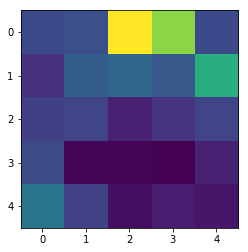

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x[0, 0, :, :])
plt.show()

In [29]:
x 

array([[[[  1.03599258e+02,   1.03817711e+02,   1.11818390e+02,
            1.09961578e+02,   1.03599258e+02],
         [  1.02725464e+02,   1.04363831e+02,   1.04773422e+02,
            1.04172691e+02,   1.07859009e+02],
         [  1.03216972e+02,   1.03435425e+02,   1.02206650e+02,
            1.02807381e+02,   1.03435425e+02],
         [  1.03653870e+02,   1.01414772e+02,   1.01414772e+02,
            1.01223633e+02,   1.02233955e+02],
         [  1.05346848e+02,   1.03298897e+02,   1.01633224e+02,
            1.02042816e+02,   1.01851669e+02]],

        [[  6.87840118e+01,   6.87840118e+01,   6.89751511e+01,
            6.89751511e+01,   6.87840118e+01],
         [  6.87840118e+01,   6.89751511e+01,   6.87840118e+01,
            6.89751511e+01,   6.87840118e+01],
         [  6.85382538e+01,   6.91389923e+01,   6.91389923e+01,
            6.87294006e+01,   6.91389923e+01],
         [  6.90570679e+01,   6.88386230e+01,   6.88386230e+01,
            6.90570679e+01,   6.88386230e+01],

In [ ]:
numpy.sk